[Model ](#id)


- Data processing are  presented on Jupyter to better intercat with. 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import mean_squared_error, auc, accuracy_score, confusion_matrix, mean_squared_error

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
!python --version

In [ ]:
sns.set(font_scale=1.5)
pd.options.display.max_rows =10
pd.options.display.max_columns = 500
pd.set_option.display_width=1000

df=pd.read_excel('data/GD6.xlsx', index_col=None, header=0)

In [4]:
df.tail()

CPR_NO                        NAME  \
24185  70304602       هزاع أحمد يوسف الكعبي   
24186  71007423     يوسف سعيد عمير السليمان   
24187  70402183     يوسف عبدالمنعم علي حسين   
24188  70803196   يوسف محمد عبدالله المناعي   
24189  70211361     يوسف مصطفى محمد عبدالله   

                                   ENAME  \
24185          HAZZA AHMED YUSUF ALKAABI   
24186      YOUSIF SAEED OMAIR ALSULAIMAN   
24187       YOUSIF ABDULMUNEM ALI HUSAIN   
24188   YOUSIF MOHAMED ABDULLA ALMANNAEI   
24189    YOUSIF MUSTAFA MOHAMMED ABDULLA   

                                             SCH_NM            PROV_NM  \
24185  مدرسة وادي السيل الابتدائية الاعدادية للبنين  المحافظة الجنوبية   
24186  مدرسة وادي السيل الابتدائية الاعدادية للبنين  المحافظة الجنوبية   
24187  مدرسة وادي السيل الابتدائية الاعدادية للبنين  المحافظة الجنوبية   
24188  مدرسة وادي السيل الابتدائية الاعدادية للبنين  المحافظة الجنوبية   
24189  مدرسة وادي السيل الابتدائية الاعدادية للبنين  المحافظة الجنوبية   

            SUBM Teacher_Gender  ACHIEVEMENTS1  ACHIEVEMENTS2  MIDTERM1  \
24185  الرياضيات         مدرسين           30.0           28.0      20.0   
24186  الرياضيات         مدرسين           30.0           25.0      17.0   
24187  الرياضيات         مدرسين           26.0           27.0      12.0   
24188  الرياضيات         مدرسين           28.0           28.0      18.0   
24189  الرياضيات         مدرسين           29.0           27.0      14.0   

       MIDTERM2  FINAL1  FINAL2  TOTAL1  TOTAL2  D_MARK  NAT_MARK        GPA  
24185      18.0    47.0    42.0    97.0      88      93      61.9  94.636364  
24186      15.0    17.0    14.5    64.0      55      60      44.5  85.181818  
24187      17.0    24.0    22.0    62.0      66      64      44.5  82.727273  
24188      18.0    37.0    23.5    83.0      70      77      46.3  89.181818  
24189      16.0    16.0    19.5    59.0      63      61      39.0  81.818182

In [5]:
df[df.GPA>85].count()/df.shape[0]

CPR_NO      0.788094
NAME        0.788094
ENAME       0.788094
SCH_NM      0.788094
PROV_NM     0.788094
              ...   
TOTAL1      0.787846
TOTAL2      0.788094
D_MARK      0.788094
NAT_MARK    0.788094
GPA         0.788094
Length: 18, dtype: float64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24190 entries, 0 to 24189
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CPR_NO          24190 non-null  int64  
 1   NAME            24190 non-null  object 
 2   ENAME           24190 non-null  object 
 3   SCH_NM          24190 non-null  object 
 4   PROV_NM         24190 non-null  object 
 5   SUBM            24190 non-null  object 
 6   Teacher_Gender  24190 non-null  object 
 7   ACHIEVEMENTS1   24172 non-null  float64
 8   ACHIEVEMENTS2   24190 non-null  float64
 9   MIDTERM1        24172 non-null  float64
 10  MIDTERM2        24190 non-null  float64
 11  FINAL1          24174 non-null  float64
 12  FINAL2          24190 non-null  float64
 13  TOTAL1          24174 non-null  float64
 14  TOTAL2          24190 non-null  int64  
 15  D_MARK          24190 non-null  int64  
 16  NAT_MARK        24190 non-null  float64
 17  GPA             24190 non-null 

In [7]:
df.keys()

Index(['CPR_NO', 'NAME', 'ENAME', 'SCH_NM', 'PROV_NM', 'SUBM',
       'Teacher_Gender', 'ACHIEVEMENTS1', 'ACHIEVEMENTS2', 'MIDTERM1',
       'MIDTERM2', 'FINAL1', 'FINAL2', 'TOTAL1', 'TOTAL2', 'D_MARK',
       'NAT_MARK', 'GPA'],
      dtype='object')

In [8]:
df.shape

(24190, 18)

In [9]:
df=df.drop(['NAME', 'ENAME'], axis=1)

In [10]:
df.dtypes

CPR_NO              int64
SCH_NM             object
PROV_NM            object
SUBM               object
Teacher_Gender     object
                   ...   
TOTAL1            float64
TOTAL2              int64
D_MARK              int64
NAT_MARK          float64
GPA               float64
Length: 16, dtype: object

In [11]:
subj=["العلوم","الرياضيات"]
df[df.SUBM.isin(subj)].head()

CPR_NO                 SCH_NM         PROV_NM    SUBM Teacher_Gender  \
0  70913390  المعهد الديني الجعفري  محافظة العاصمة  العلوم         مدرسين   
1  71105956  المعهد الديني الجعفري  محافظة العاصمة  العلوم         مدرسين   
2  70712190  المعهد الديني الجعفري  محافظة العاصمة  العلوم         مدرسين   
3  70207496  المعهد الديني الجعفري  محافظة العاصمة  العلوم         مدرسين   
4  70507953  المعهد الديني الجعفري  محافظة العاصمة  العلوم         مدرسين   

   ACHIEVEMENTS1  ACHIEVEMENTS2  MIDTERM1  MIDTERM2  FINAL1  FINAL2  TOTAL1  \
0           28.0           30.0      17.0      17.0    45.0    33.0    90.0   
1           27.0           29.0      14.0      16.0    41.5    37.0    83.0   
2           27.0           27.0      13.0      15.0    27.5    37.0    68.0   
3           26.0           24.5      15.0      12.0    44.0    32.5    85.0   
4           25.0           28.0      14.0      15.0    31.5    37.0    71.0   

   TOTAL2  D_MARK  NAT_MARK   GPA  
0      80      85      53.7  92.9  
1      82      83      49.7  89.5  
2      79      74      52.1  86.2  
3      69      77      52.9  89.9  
4      80      76      52.1  86.2

In [12]:
df.SUBM.unique()

array(['العلوم', 'الرياضيات'], dtype=object)

In [13]:
df.PROV_NM.unique()

array(['محافظة العاصمة', 'المحافظة الشمالية', 'المحافظة الجنوبية',
       'محافظة المحرق'], dtype=object)

In [14]:
df.PROV_NM = df["PROV_NM"].map({'المحافظة الجنوبية':'South', 'المحافظة الشمالية':'North',\
                                'محافظة العاصمة': 'Cap',  \
                                'محافظة المحرق':'Muharaq'})

In [15]:
df.SUBM = df["SUBM"].map({'العلوم':'Science',   
                          'الرياضيات':'Math'})

In [16]:
df.Teacher_Gender = df["Teacher_Gender"].map({'مدرسات':'F', 'مدرسين':'M'})

In [17]:
df.head()

CPR_NO                 SCH_NM PROV_NM     SUBM Teacher_Gender  \
0  70913390  المعهد الديني الجعفري     Cap  Science              M   
1  71105956  المعهد الديني الجعفري     Cap  Science              M   
2  70712190  المعهد الديني الجعفري     Cap  Science              M   
3  70207496  المعهد الديني الجعفري     Cap  Science              M   
4  70507953  المعهد الديني الجعفري     Cap  Science              M   

   ACHIEVEMENTS1  ACHIEVEMENTS2  MIDTERM1  MIDTERM2  FINAL1  FINAL2  TOTAL1  \
0           28.0           30.0      17.0      17.0    45.0    33.0    90.0   
1           27.0           29.0      14.0      16.0    41.5    37.0    83.0   
2           27.0           27.0      13.0      15.0    27.5    37.0    68.0   
3           26.0           24.5      15.0      12.0    44.0    32.5    85.0   
4           25.0           28.0      14.0      15.0    31.5    37.0    71.0   

   TOTAL2  D_MARK  NAT_MARK   GPA  
0      80      85      53.7  92.9  
1      82      83      49.7  89.5  
2      79      74      52.1  86.2  
3      69      77      52.9  89.9  
4      80      76      52.1  86.2

In [18]:
data_column_category = df.select_dtypes(exclude=[np.number]).columns

In [19]:
data_column_category

Index(['SCH_NM', 'PROV_NM', 'SUBM', 'Teacher_Gender'], dtype='object')

In [20]:
df.to_csv("data/GD_Part1_clean.csv")

In [21]:
# from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()

# for i in data_column_category:

#     df[i] = label_encoder.fit_transform(df[i])

# print("Label Encoded Data: ")

# df.head()

In [22]:
df.iloc[:,1:].describe().T

count       mean        std  min        25%        50%   75%  \
ACHIEVEMENTS1  24172.0  28.013205   2.516684  0.0  27.000000  29.000000  30.0   
ACHIEVEMENTS2  24190.0  28.226147   2.404484  0.0  27.000000  29.000000  30.0   
MIDTERM1       24172.0  16.396359   3.691991  0.0  14.500000  17.500000  19.0   
MIDTERM2       24190.0  16.233038   3.738233  0.0  14.000000  17.000000  19.0   
FINAL1         24174.0  37.585650  10.617870  0.0  31.000000  40.000000  46.0   
...                ...        ...        ...  ...        ...        ...   ...   
TOTAL1         24174.0  82.145321  15.120198  0.0  73.000000  86.000000  94.0   
TOTAL2         24190.0  80.090492  12.775070  0.0  72.000000  83.000000  90.0   
D_MARK         24190.0  81.366226  13.360015  0.0  73.000000  84.000000  92.0   
NAT_MARK       24190.0  51.163878  10.752687  0.0  44.200000  51.300000  58.3   
GPA            24190.0  89.781241   6.986924  0.0  86.090909  91.090909  95.0   

                      max  
ACHIEVEMENTS1   30.000000  
ACHIEVEMENTS2   30.000000  
MIDTERM1        20.000000  
MIDTERM2        20.000000  
FINAL1          94.000000  
...                   ...  
TOTAL1         100.000000  
TOTAL2         100.000000  
D_MARK         100.000000  
NAT_MARK        90.000000  
GPA             99.818182  

[11 rows x 8 columns]

In [23]:
df.keys()

Index(['CPR_NO', 'SCH_NM', 'PROV_NM', 'SUBM', 'Teacher_Gender',
       'ACHIEVEMENTS1', 'ACHIEVEMENTS2', 'MIDTERM1', 'MIDTERM2', 'FINAL1',
       'FINAL2', 'TOTAL1', 'TOTAL2', 'D_MARK', 'NAT_MARK', 'GPA'],
      dtype='object')

In [24]:
#sns.pairplot(df,hue = 'PROV_NM',diag_kind = "kde",kind = "scatter",palette = "husl")


In [25]:
df["PROV_NM"].value_counts()

North      8246
South      5936
Muharaq    5046
Cap        4962
Name: PROV_NM, dtype: int64

In [26]:
cols = ['PROV_NM',
       'ACHIEVEMENTS1', 'ACHIEVEMENTS2', 'MIDTERM1', 'MIDTERM2', 'FINAL1',
       'FINAL2', 'TOTAL1', 'TOTAL2', 'D_MARK', 'NAT_MARK', 'GPA']


## توزيع نتائج الامتحانات النهائية حسب المحافظات

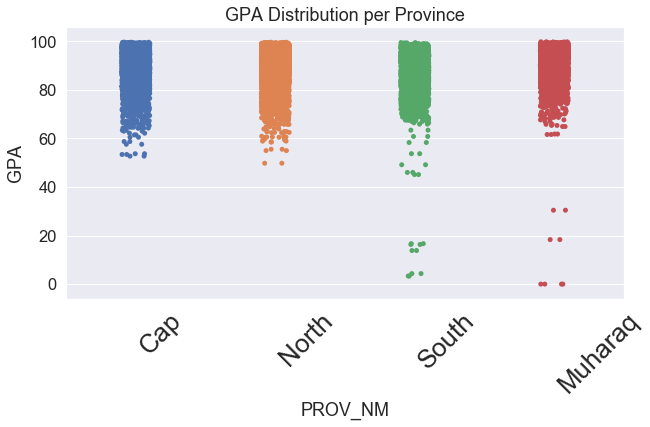

In [27]:

plt.figure(figsize=(10,5))
a= sns.stripplot(y = "GPA", x = "PROV_NM", data = df)
plt.xticks(
    rotation=45, 
    horizontalalignment='left',
    fontweight='light',
    fontsize='x-large'  
)
plt.title("GPA Distribution per Province")
plt.show()

In [28]:
df[df.CPR_NO==70913390].head()

CPR_NO                 SCH_NM PROV_NM     SUBM Teacher_Gender  \
0      70913390  المعهد الديني الجعفري     Cap  Science              M   
12095  70913390  المعهد الديني الجعفري     Cap     Math              M   

       ACHIEVEMENTS1  ACHIEVEMENTS2  MIDTERM1  MIDTERM2  FINAL1  FINAL2  \
0               28.0           30.0      17.0      17.0    45.0    33.0   
12095           30.0           28.0      18.0      16.0    41.5    38.5   

       TOTAL1  TOTAL2  D_MARK  NAT_MARK   GPA  
0        90.0      80      85      53.7  92.9  
12095    90.0      83      87      52.9  92.9

## توزيع تنائج الاختبارات الوطنية حسب المحافظات

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

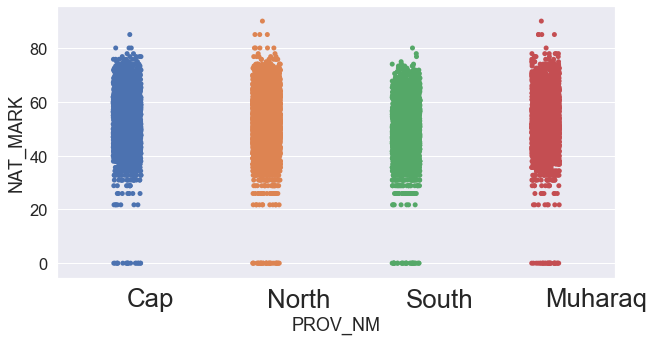

In [29]:

plt.figure(figsize=(10,5))
a= sns.stripplot(y = "NAT_MARK", x = "PROV_NM", data = df[df.SUBM=="Math"])
plt.xticks(
    horizontalalignment='left',
    fontweight='light',
    fontsize='x-large'  
)


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

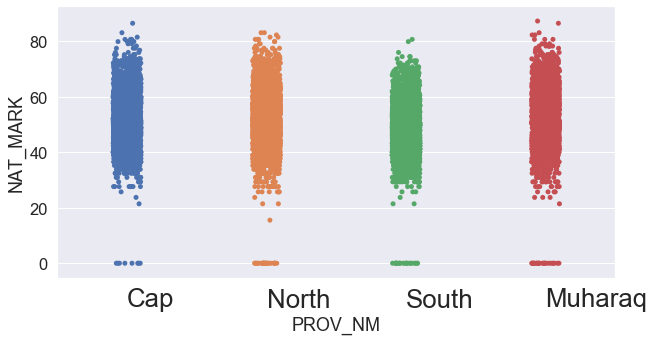

In [30]:

plt.figure(figsize=(10,5))
a= sns.stripplot(y = "NAT_MARK", x = "PROV_NM", data = df[df.SUBM=="Science"])
plt.xticks(
    horizontalalignment='left',
    fontweight='light',
    fontsize='x-large'  
)


## نماذج التوزيع الطبيعي لنتائج النهائية حسب المحافظات

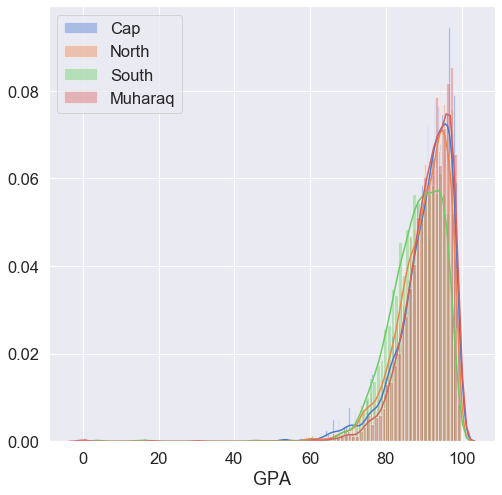

In [31]:
plt.figure(figsize=(8,8))
sns.set_palette("muted")
for i in df.PROV_NM.unique():
    sns.distplot(df.GPA[df.PROV_NM==i],         kde=1,label='{}'.format(i) , bins=100)
    plt.show

plt.legend(loc="upper left")

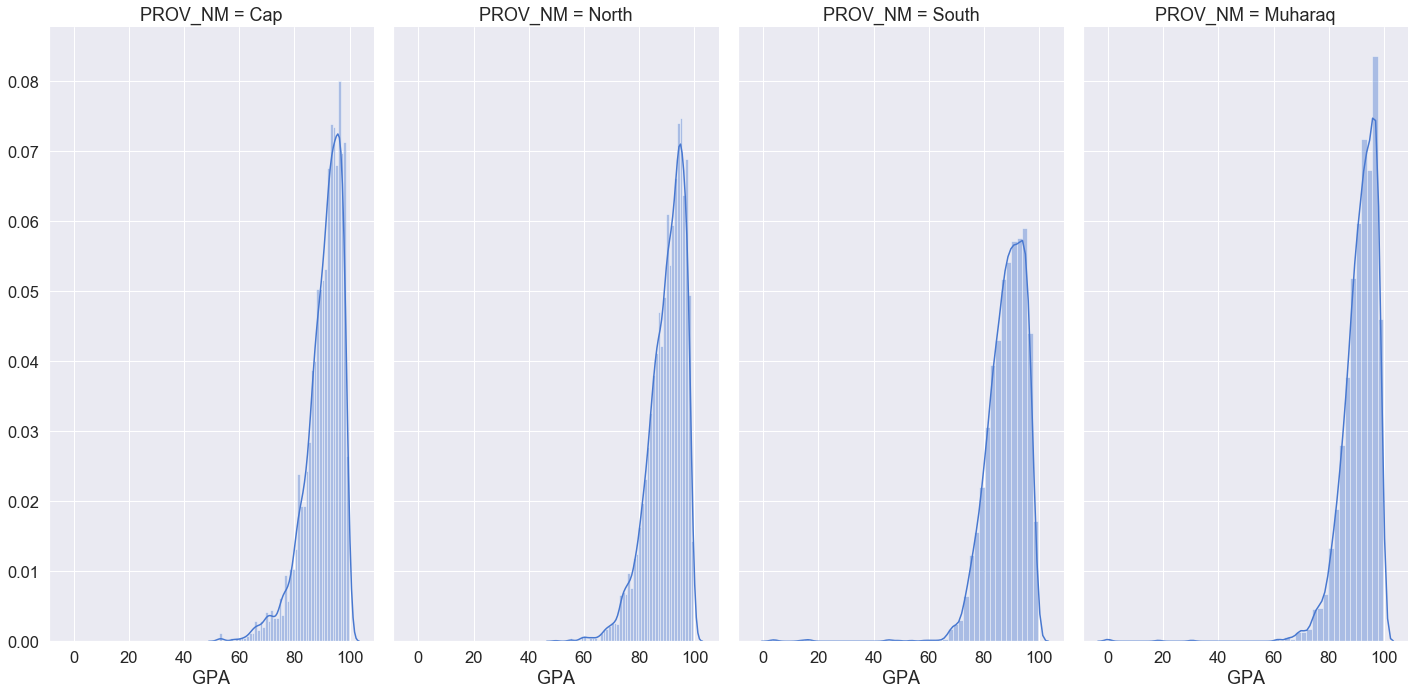

In [32]:
g=sns.FacetGrid(df, col="PROV_NM", aspect=.5, height=10)
g.map(sns.distplot,"GPA" )

In [33]:
print(f'GPA Student mean           {df.GPA.mean():2.2f} :      MEdian {df.GPA.median():2.2f}  :      STD: {df.GPA.std():2.2f}')
print(f'National EXam Student mean {df.NAT_MARK.mean():2.2f}:  MEdian {df.NAT_MARK.median():2.2f} :  STD :  {df.NAT_MARK.std():2.2f}')

GPA Student mean           89.78 :      MEdian 91.09  :      STD: 6.99
National EXam Student mean 51.16:  MEdian 51.30 :  STD :  10.75


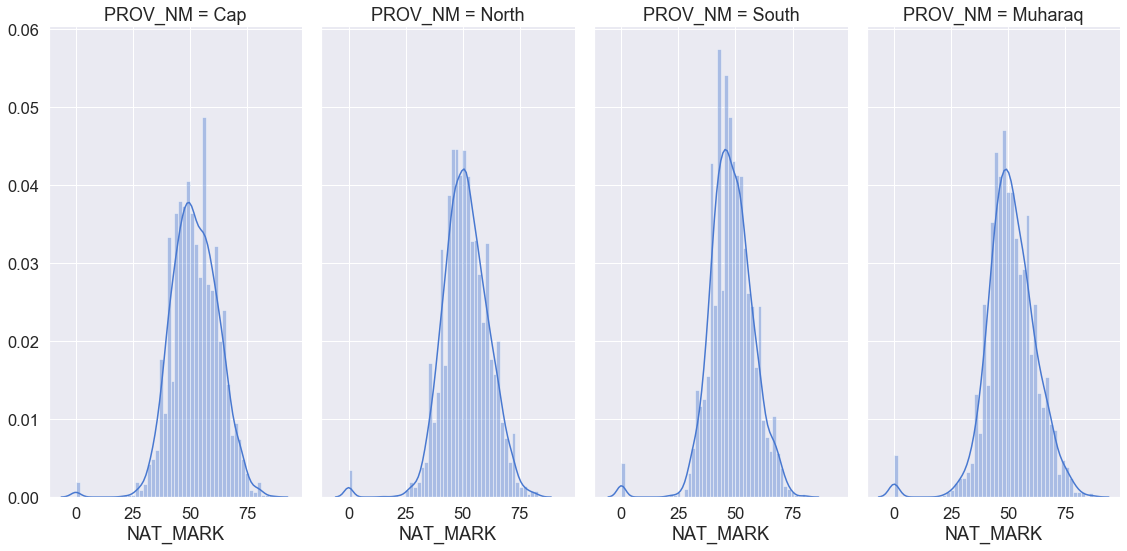

In [34]:
g=sns.FacetGrid(df[df.SUBM=="Science"], col="PROV_NM" , aspect=.5, height=8)
g.map(sns.distplot,"NAT_MARK", bins=50)


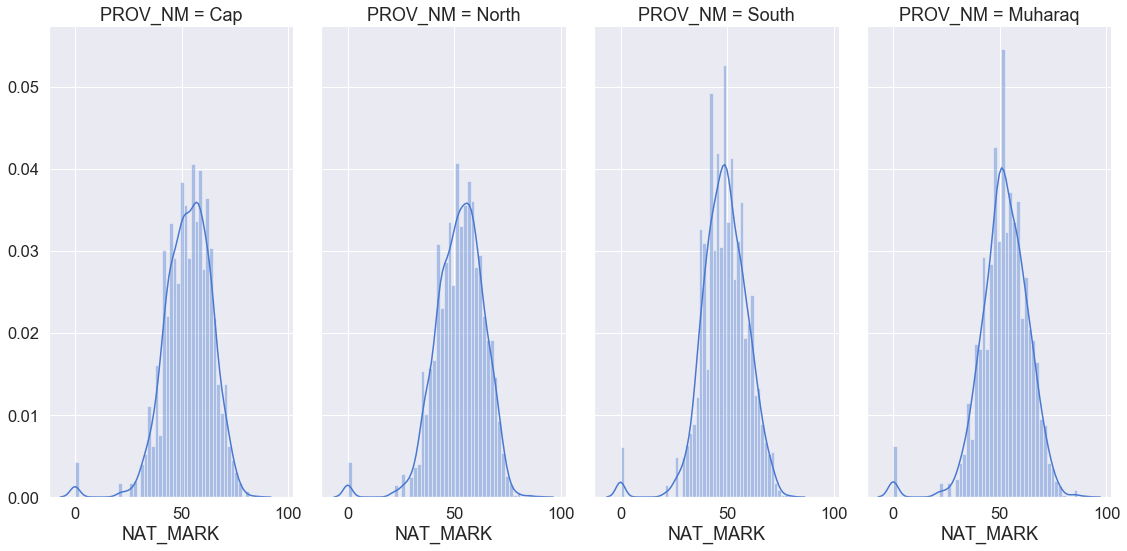

In [35]:
g=sns.FacetGrid(df[df.SUBM=="Math"], col="PROV_NM" , aspect=.5, height=8)
g.map(sns.distplot,"NAT_MARK", bins=50)


## توزيع الأصفار خلال الاختبارات الوطنية حسب المحافظات

NAT_MARK
PROV_NM          
Cap            26
Muharaq        52
North          56
South          50

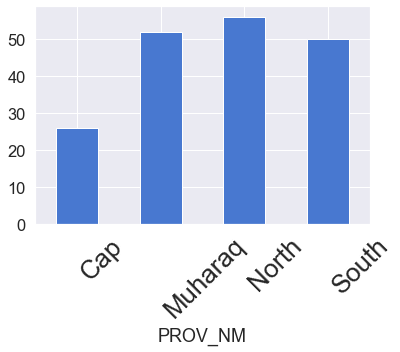

In [36]:
# Zeros distribution by Province
Zs=df[df.NAT_MARK==0].groupby(["PROV_NM"]).agg({"NAT_MARK":"count"})
# sns.stripplot(y = "NAT_MARK", x = Zs.index, data = df)
Zs.NAT_MARK.plot(kind="bar")
plt.xticks(
    rotation=45, 
    horizontalalignment='left',
    fontweight='light',
    fontsize='x-large'  
)
Zs

In [37]:
df.shape

(24190, 16)

## for i in df.PROV_NM.unique():
sns.distplot(df.D_MARK[df.PROV_NM==i],
                 kde=1,label='{}'.format(i))

plt.legend()

 plot 4. grpahs, each for A province.   draw average and the mean adn The mode .   observe their order and look if the mean is far less or more than the average.  
 if data was for a prduct to sale, we could say that those item are over or under priced
 

#  Tests for Normal Distribution
###  1. Statistical Normality Tests: D’Agostino’s $K^2 Test$ 



In [38]:
from scipy import stats
Gpa_test,GPA_P = stats.normaltest(df.GPA)
print(f'GPA Normal test result  (P-value): {GPA_P}')

Nat_test,Nat_P = stats.normaltest(df.NAT_MARK)
print(f'National Exam Normal test result  (P-value): {Nat_P}')



GPA Normal test result  (P-value): 0.0
National Exam Normal test result  (P-value): 0.0


- p value (0 )is less than our alpha (significance value  0.05), we can **reject the hypothesis that this sample data is normally distributed**

###  2. Statistical Normality Tests : Q-Q plot

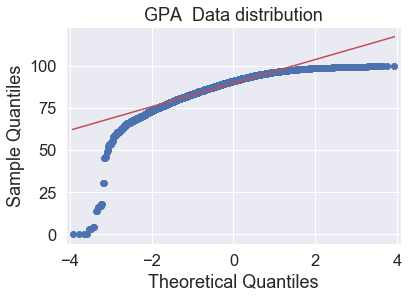

In [39]:
from statsmodels.graphics.gofplots import qqplot
qqplot(df.GPA, line='s')
plt.title(" GPA  Data distribution ")
plt.show()

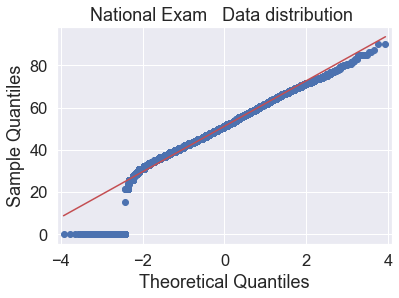

In [40]:
from statsmodels.graphics.gofplots import qqplot
qqplot(df.NAT_MARK, line='s')
plt.title("National Exam   Data distribution ")
plt.show()

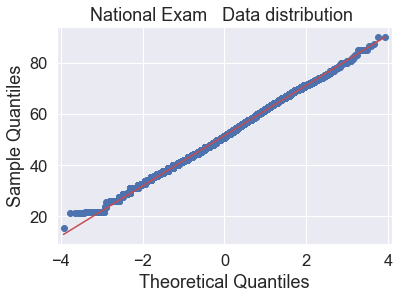

In [41]:
from statsmodels.graphics.gofplots import qqplot
qqplot(df[df.NAT_MARK>0].NAT_MARK, line='s')
plt.title("National Exam   Data distribution ")
plt.show()

## نماذج التوزيع الطبيعي لنتائج الاختبارات الوطنية حسب المحافظات

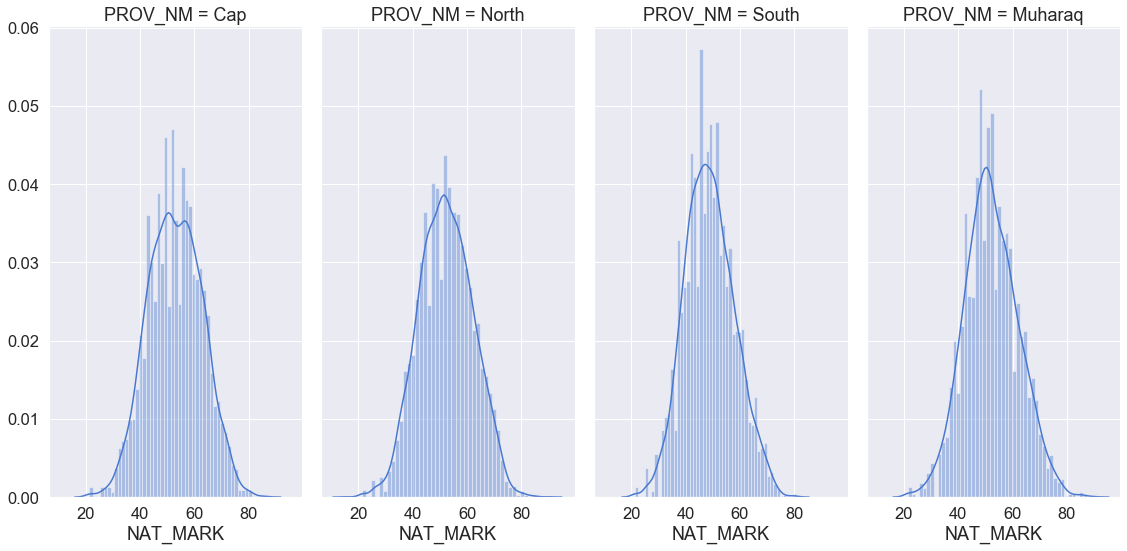

In [42]:
g=sns.FacetGrid(df[df.NAT_MARK>0], col="PROV_NM" , aspect=.5, height=8)
g.map(sns.distplot,"NAT_MARK", bins=50)

In [43]:
df.keys()

Index(['CPR_NO', 'SCH_NM', 'PROV_NM', 'SUBM', 'Teacher_Gender',
       'ACHIEVEMENTS1', 'ACHIEVEMENTS2', 'MIDTERM1', 'MIDTERM2', 'FINAL1',
       'FINAL2', 'TOTAL1', 'TOTAL2', 'D_MARK', 'NAT_MARK', 'GPA'],
      dtype='object')

###  3. Statistical Normality Tests - Shapiro 

In [44]:
from scipy.stats import shapiro
stat, p = shapiro(df.sample(frac=0.2,weights="GPA",   random_state=1).GPA)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.906, p=0.000


In [45]:

stat, p = shapiro(df[df.NAT_MARK>0].sample(n=5000,weights="NAT_MARK" , random_state=1).NAT_MARK)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.999, p=0.007


- p value (0 )is less than our alpha (significance value  0.05), we can **reject the hypothesis that this sample data is normally distributed**

###  4. Statistical Normality Tests – Anderson-Darling Test 

In [46]:
from scipy.stats import anderson
result = anderson(df.GPA)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 411.388
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)


In [47]:
from scipy.stats import anderson
result = anderson(df.NAT_MARK)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 47.214
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)


#### Run all Above 

#   نتائج الامتحانات النهائية في مادتي العلوم والرياضيات

 National Exam GPA  Median value : 91.09
 National Exam GPA  Median value : 89.78


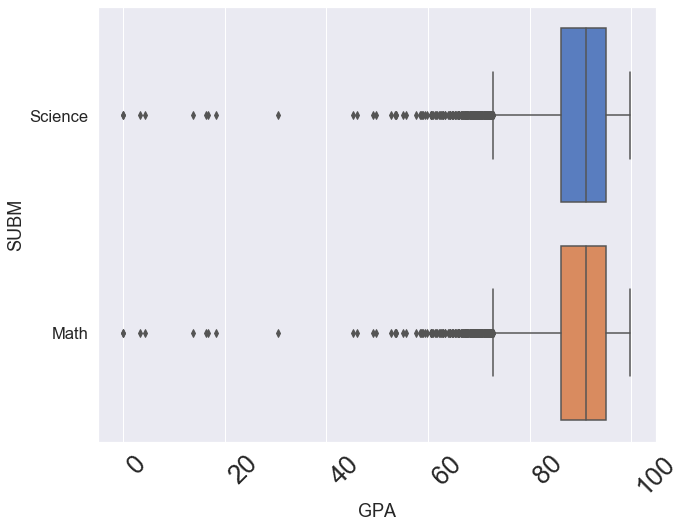

In [48]:
fig, ax=plt.subplots(figsize=(10,8))
sns.boxplot(df["GPA"], df.SUBM, data=df)
plt.xticks(
    rotation=45, 
    horizontalalignment='left',
    fontweight='light',
    fontsize='x-large'  
)
#plt.title( "  Student  GPA.  per Subject")
print(' National Exam GPA  Median value : {:2.2f}'.format(df.GPA.median()))
print(' National Exam GPA  Median value : {:2.2f}'.format(df.GPA.mean()))

 # نتائج الطلبة خلال اختبار الامتحانات الوطنية في مادتي العلوم والرياضيات

Median value : 51.30
Median value : 51.16


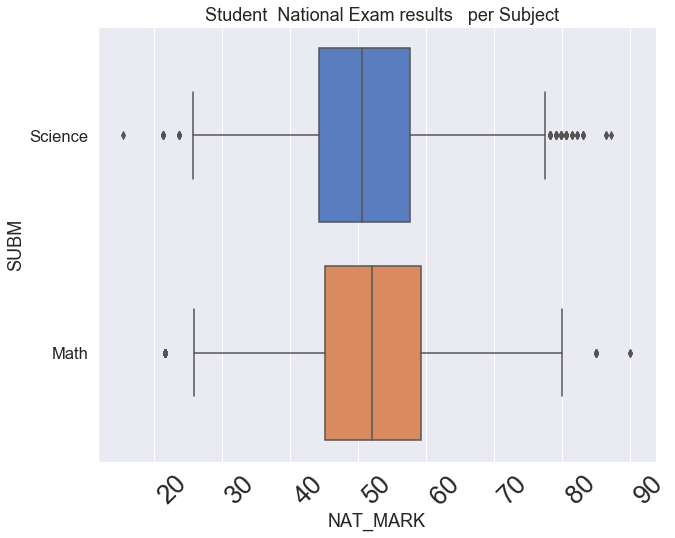

In [49]:

fig, ax=plt.subplots(figsize=(10,8))
sns.boxplot(df[df.NAT_MARK>0]["NAT_MARK"], df.SUBM, data=df)
plt.xticks(
    rotation=45, 
    horizontalalignment='left',
    fontweight='light',
    fontsize='x-large'  
)
plt.title( "  Student  National Exam results   per Subject")
print( "Median value : %2.2f"  % (df.NAT_MARK.median()))
print( "Median value : %2.2f"  % (df.NAT_MARK.mean()))


  #  نتائج الطلبة في أعمال الفصل الأول والثاني

Text(0.5, 1, 'Science')

<Figure size 720x576 with 0 Axes>

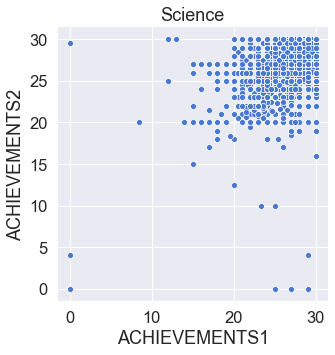

In [50]:
# tracking correlatin between both Achievements
plt.figure(figsize=(10,8))
sns.relplot(x="ACHIEVEMENTS1", y="ACHIEVEMENTS2",  data=df[df.SUBM=="Science"])
plt.title("Science")

Text(0.5, 1, 'Math')

<Figure size 720x576 with 0 Axes>

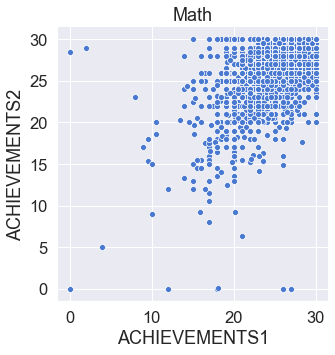

In [51]:
# tracking correlatin between both Achievements
plt.figure(figsize=(10,8))
sns.relplot(x="ACHIEVEMENTS1", y="ACHIEVEMENTS2",  data=df[df.SUBM=="Math"])
plt.title("Math")

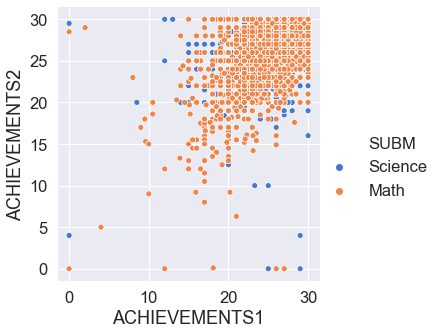

In [52]:
sns.relplot(x="ACHIEVEMENTS1", y="ACHIEVEMENTS2", data=df, hue="SUBM")
plt.show()

  ## مقارنة جندرية للمدرسين حسب نتائج الطلبة في أعمال الفصل الأول والثاني

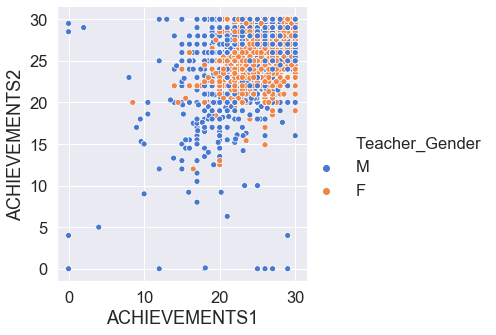

In [53]:
sns.relplot(x="ACHIEVEMENTS1", y="ACHIEVEMENTS2", data=df, hue="Teacher_Gender")
plt.show()

<Figure size 720x576 with 0 Axes>

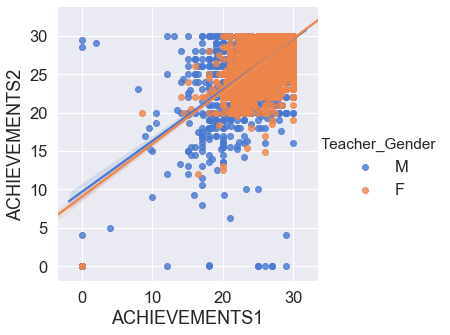

In [54]:
# sns.relplot(x="ACHIEVEMENTS1", y="ACHIEVEMENTS2", data=df, hue="Teacher_Gender")
plt.figure(figsize=(10,8))
sns.lmplot("ACHIEVEMENTS1", "ACHIEVEMENTS2", data=df, hue="Teacher_Gender")

##  تحصيل الطلاب في الامتحان الوطني ، بالمقارنة مع التحصيل النهائي

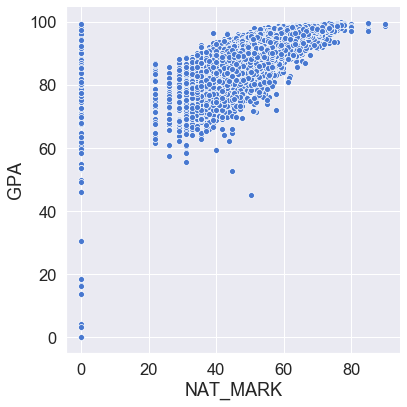

In [55]:
sns.relplot(x="NAT_MARK", y="GPA", data=df[df.SUBM=="Math"], aspect=1, height=6)

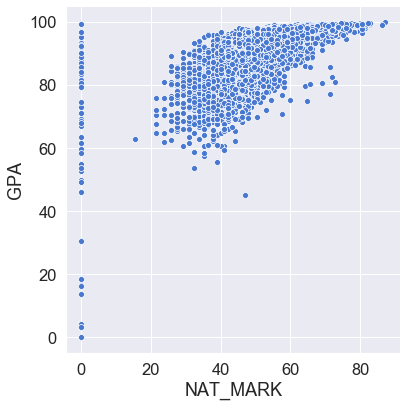

In [56]:
sns.relplot(x="NAT_MARK", y="GPA", data=df[df.SUBM=="Science"], aspect=1, height=6)


## توزيع تحصيل الطلاب ،الحاصلين على اقل من 50٪ في الامتحان الوطني ،  خلال الدور الثاني

- Notice those Student with 0 @ NAT_MARK

## توزيع تحصيل الطلاب ،الحاصلين على اقل من 50٪ في الامتحان الوطني ،  خلال الدور الثاني

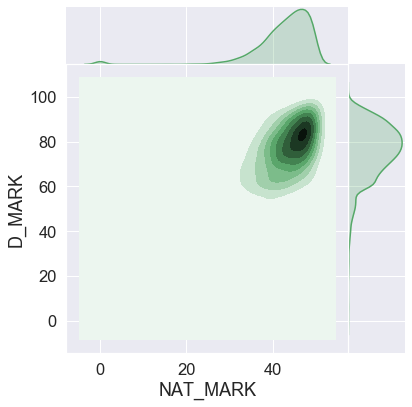

In [57]:
# big proportion of sll thos who had less than 50% in National Exam got around 80% in  دور ثاني
sns.jointplot("NAT_MARK","D_MARK", space=0, color="g",
              kind="kde", data=df[(df["NAT_MARK"]<50)& (df.SUBM=="Science")])

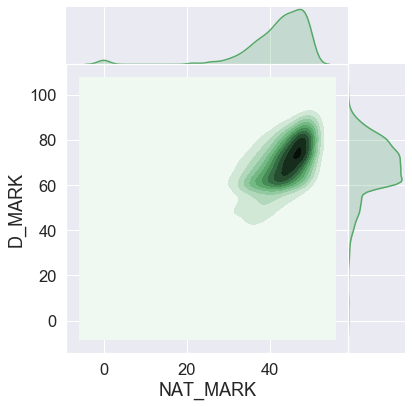

In [58]:
# big proportion of sll thos who had less than 50% in National Exam got around 80% in  دور ثاني
sns.jointplot("NAT_MARK","D_MARK", space=0, color="g",
              kind="kde", data=df[(df["NAT_MARK"]<50)& (df.SUBM=="Math")])

## معدّل الطلاب ،الحاصلين على اقل من 50٪ في الامتحانات الوطني ، خلال الدور الثاني

In [59]:
print(f'{ df[(df["NAT_MARK"]<50)& (df.SUBM=="Math")].NAT_MARK.mean():2.2f} معدّل الطلاب الحاصلين على اقل من 50٪ في الامتحانات الوطني '  )


print(f'{df[(df["NAT_MARK"]<50)& (df.SUBM=="Math")].D_MARK.mean():2.2f}  معدّل الطلاب في مادة الرياضيات ،الحاصلين على اقل من 50٪ في الامتحان الوطني ، خلال الدور الثاني')
      
      
print(f'{df[(df["NAT_MARK"]<50)& (df.SUBM=="Science")].NAT_MARK.mean():2.2f}  معدّل الطلاب في مادة العلوم،الحاصلين على اقل من 50٪ في الامتحان الوطني ، خلال الدور الثاني')
print(f'{df[(df["NAT_MARK"]<50)& (df.SUBM=="Science")].D_MARK.mean():2.2f}      معدّل الطلاب في مادة العلوم،الحاصلين على اقل من 50٪ في الامتحان الوطني ، خلال الدور الثاني')

41.82 معدّل الطلاب الحاصلين على اقل من 50٪ في الامتحانات الوطني 
68.11  معدّل الطلاب في مادة الرياضيات ،الحاصلين على اقل من 50٪ في الامتحان الوطني ، خلال الدور الثاني
42.65  معدّل الطلاب في مادة العلوم،الحاصلين على اقل من 50٪ في الامتحان الوطني ، خلال الدور الثاني
75.52      معدّل الطلاب في مادة العلوم،الحاصلين على اقل من 50٪ في الامتحان الوطني ، خلال الدور الثاني


## معدّل الطلاب ،الحاصلين على اقل من 50٪ في الامتحانات الوطني ، في نهائي الفصل الثاني

In [60]:
print(f'{ df[df["NAT_MARK"]<50].NAT_MARK.mean():2.2f} معدّل الطلاب الحاصلين على اقل من 50٪ في الامتحانات الوطني '  )
print(f'{ df[df["NAT_MARK"]<50].TOTAL2.mean():2.2f}    معدّل الطلاب ،الحاصلين على اقل من 50٪ في الامتحانات الوطني ، في نهائي الفصل الثاني' )
      

42.26 معدّل الطلاب الحاصلين على اقل من 50٪ في الامتحانات الوطني 
71.45    معدّل الطلاب ،الحاصلين على اقل من 50٪ في الامتحانات الوطني ، في نهائي الفصل الثاني


## توزيع الطلاب ،الحاصلين على  0 في الامتحانات الوطني ، على المحافطات

In [61]:
# à fixer pour extraire tous ceux qui ont eu 0 D_mark et NAT_MARK
df.query("NAT_MARK==0").groupby(["PROV_NM"]).agg({"PROV_NM":"size"})

PROV_NM
PROV_NM         
Cap           26
Muharaq       52
North         56
South         50

In [62]:
df[df.NAT_MARK==0].NAT_MARK.value_counts()

0.0    184
Name: NAT_MARK, dtype: int64

 ## مقارنة جندرية للمدرسين حسب نتائج الطلبة في مادتي العلوم والرياضيات
 ### الامتحانات الوطنية

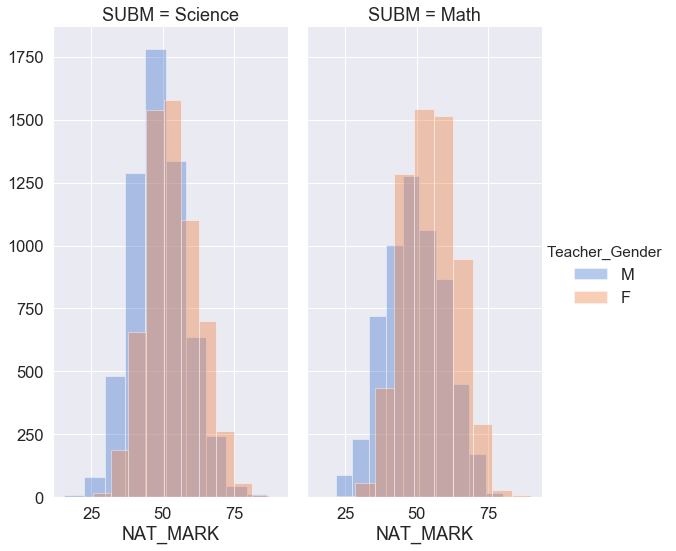

In [63]:
g=sns.FacetGrid(df[df.NAT_MARK>0], col="SUBM", hue="Teacher_Gender", height=8, aspect=.5)
g.map(sns.distplot, "NAT_MARK", bins=10, kde=0)
g.add_legend()
plt.show()

###  التحصيل النهائي

/Users/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


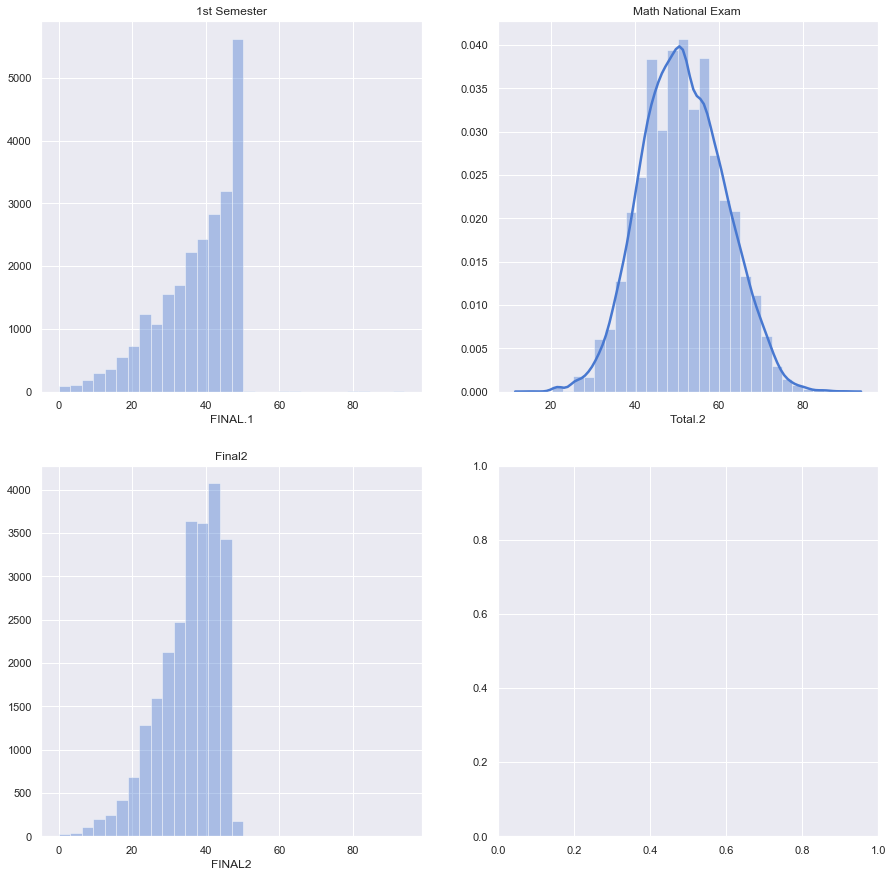

In [64]:
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})
fig, ax=plt.subplots( 2, 2, figsize=(15,15), sharey=False, )
ax[0,0]=sns.distplot( df['FINAL1'],kde=0, bins=30,  ax=ax[0,0])
ax[0,0].set(title="1st Semester", xlabel="FINAL.1")
# ax[0,0].legend(loc="upper left", title="2nd Semester", title_fontsize="x-large")
ax[1,0]=sns.distplot( df.FINAL2, bins=30, ax=ax[1,0], kde=0)
ax[1,0].set(title="Final2", xlabel="FINAL2", ylabel="")
# ax[1,0].legend(loc="upper right", title="National Exam", title_fontsize="x-large")

ax[0,1]=sns.distplot(df[df.NAT_MARK>0].NAT_MARK, bins=30,  ax=ax[0,1])
ax[0,1].set(title="Math National Exam ", xlabel="Total.2", )

plt.show()

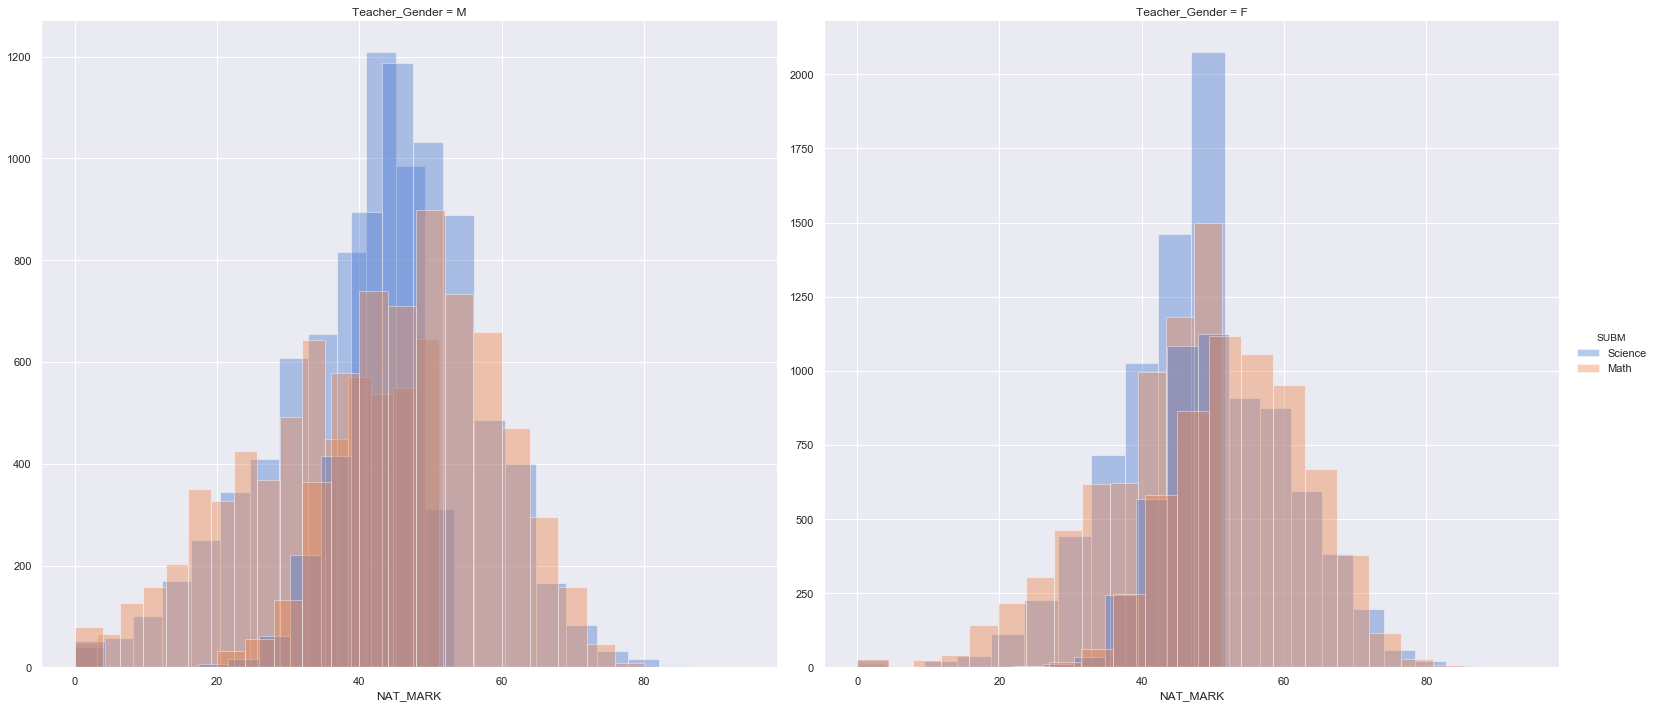

In [65]:
g=sns.FacetGrid(df, col="Teacher_Gender", hue="SUBM",  height=10, aspect=1.1, sharey=False)
g.map(sns.distplot, "FINAL1", bins=20, kde=False)
g.map(sns.distplot, "NAT_MARK", bins=20, kde=False)


g.add_legend()
plt.show()

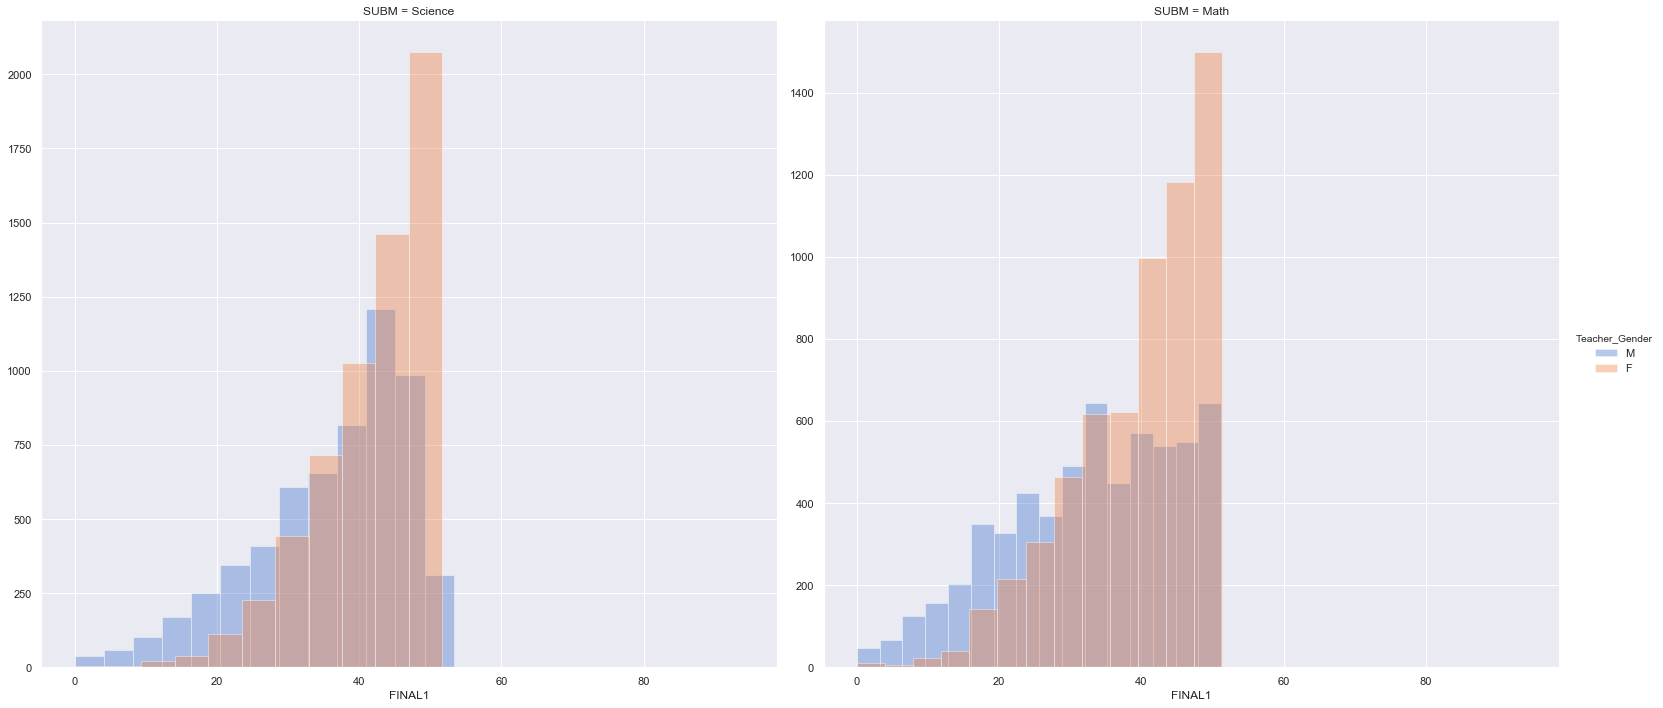

In [66]:
g=sns.FacetGrid(df, col="SUBM",  hue="Teacher_Gender",  height=10, aspect=1.1, sharey=False)
g.map(sns.distplot, "FINAL1", bins=20, kde=False)
g.add_legend()
plt.show()

## مقارنة جندرية للمدرسين حسب نتائج الطلبة في نهائيي الفصلين الأول والثاني في مادتي العلوم والرياضيات

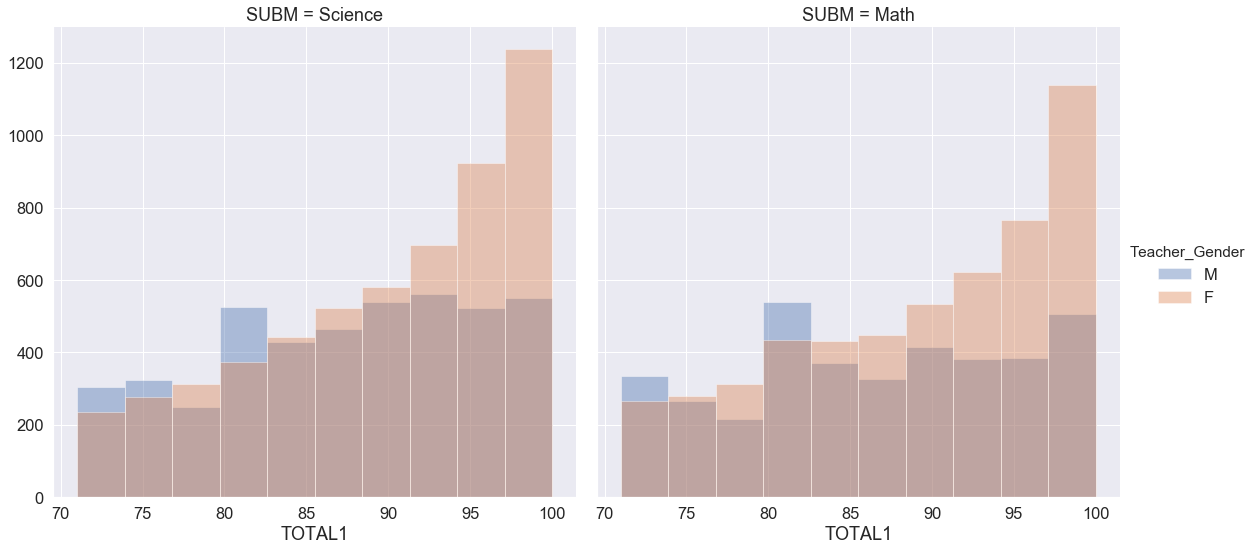

In [67]:
#. range.  80-100, kde 0 or 1
sns.set(font_scale=1.5)
g=sns.FacetGrid(df[df["TOTAL1"]>70], col="SUBM",  hue="Teacher_Gender", aspect=1,  height=8)
g.map(sns.distplot, "TOTAL1", bins=10, kde=0)
g.add_legend()
plt.show()

In [68]:
df.groupby("PROV_NM").Teacher_Gender.value_counts()

PROV_NM  Teacher_Gender
Cap      F                 2858
         M                 2104
Muharaq  F                 2624
         M                 2422
North    F                 4124
         M                 4122
South    M                 3270
         F                 2666
Name: Teacher_Gender, dtype: int64

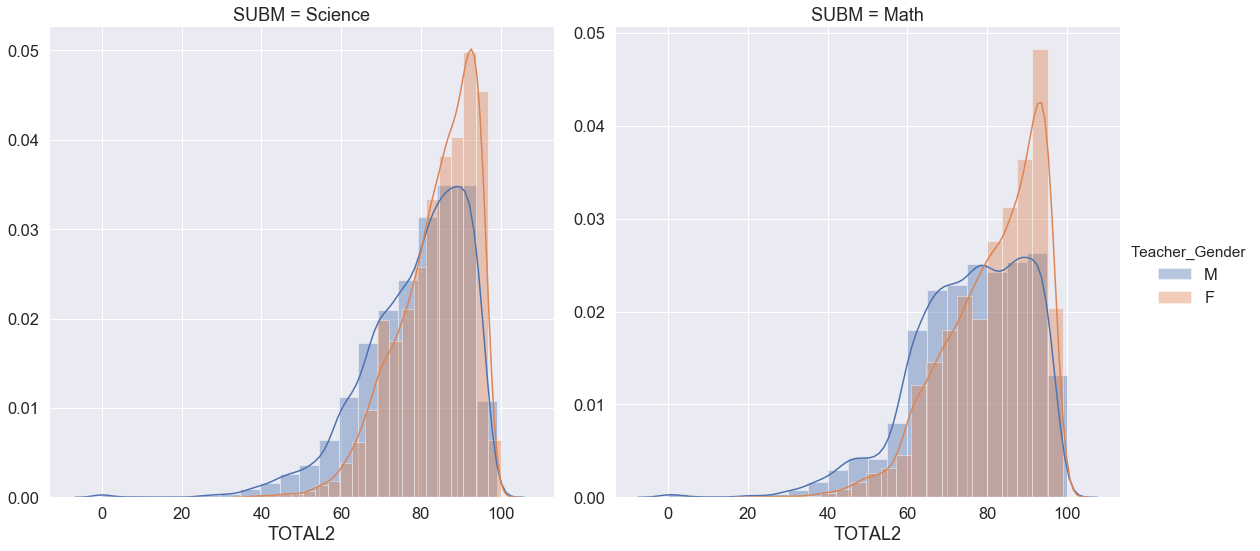

In [69]:
sns.set(font_scale=1.5)
g=sns.FacetGrid(df, col="SUBM", hue="Teacher_Gender", aspect=1,  height=8, sharey=False )
g.map(sns.distplot, "TOTAL2", bins=20, kde=1)
g.add_legend()
plt.show()

##   مقارنة نتائج الطلبة في الفصل الأول بنتائج الاختبارات الوطنية

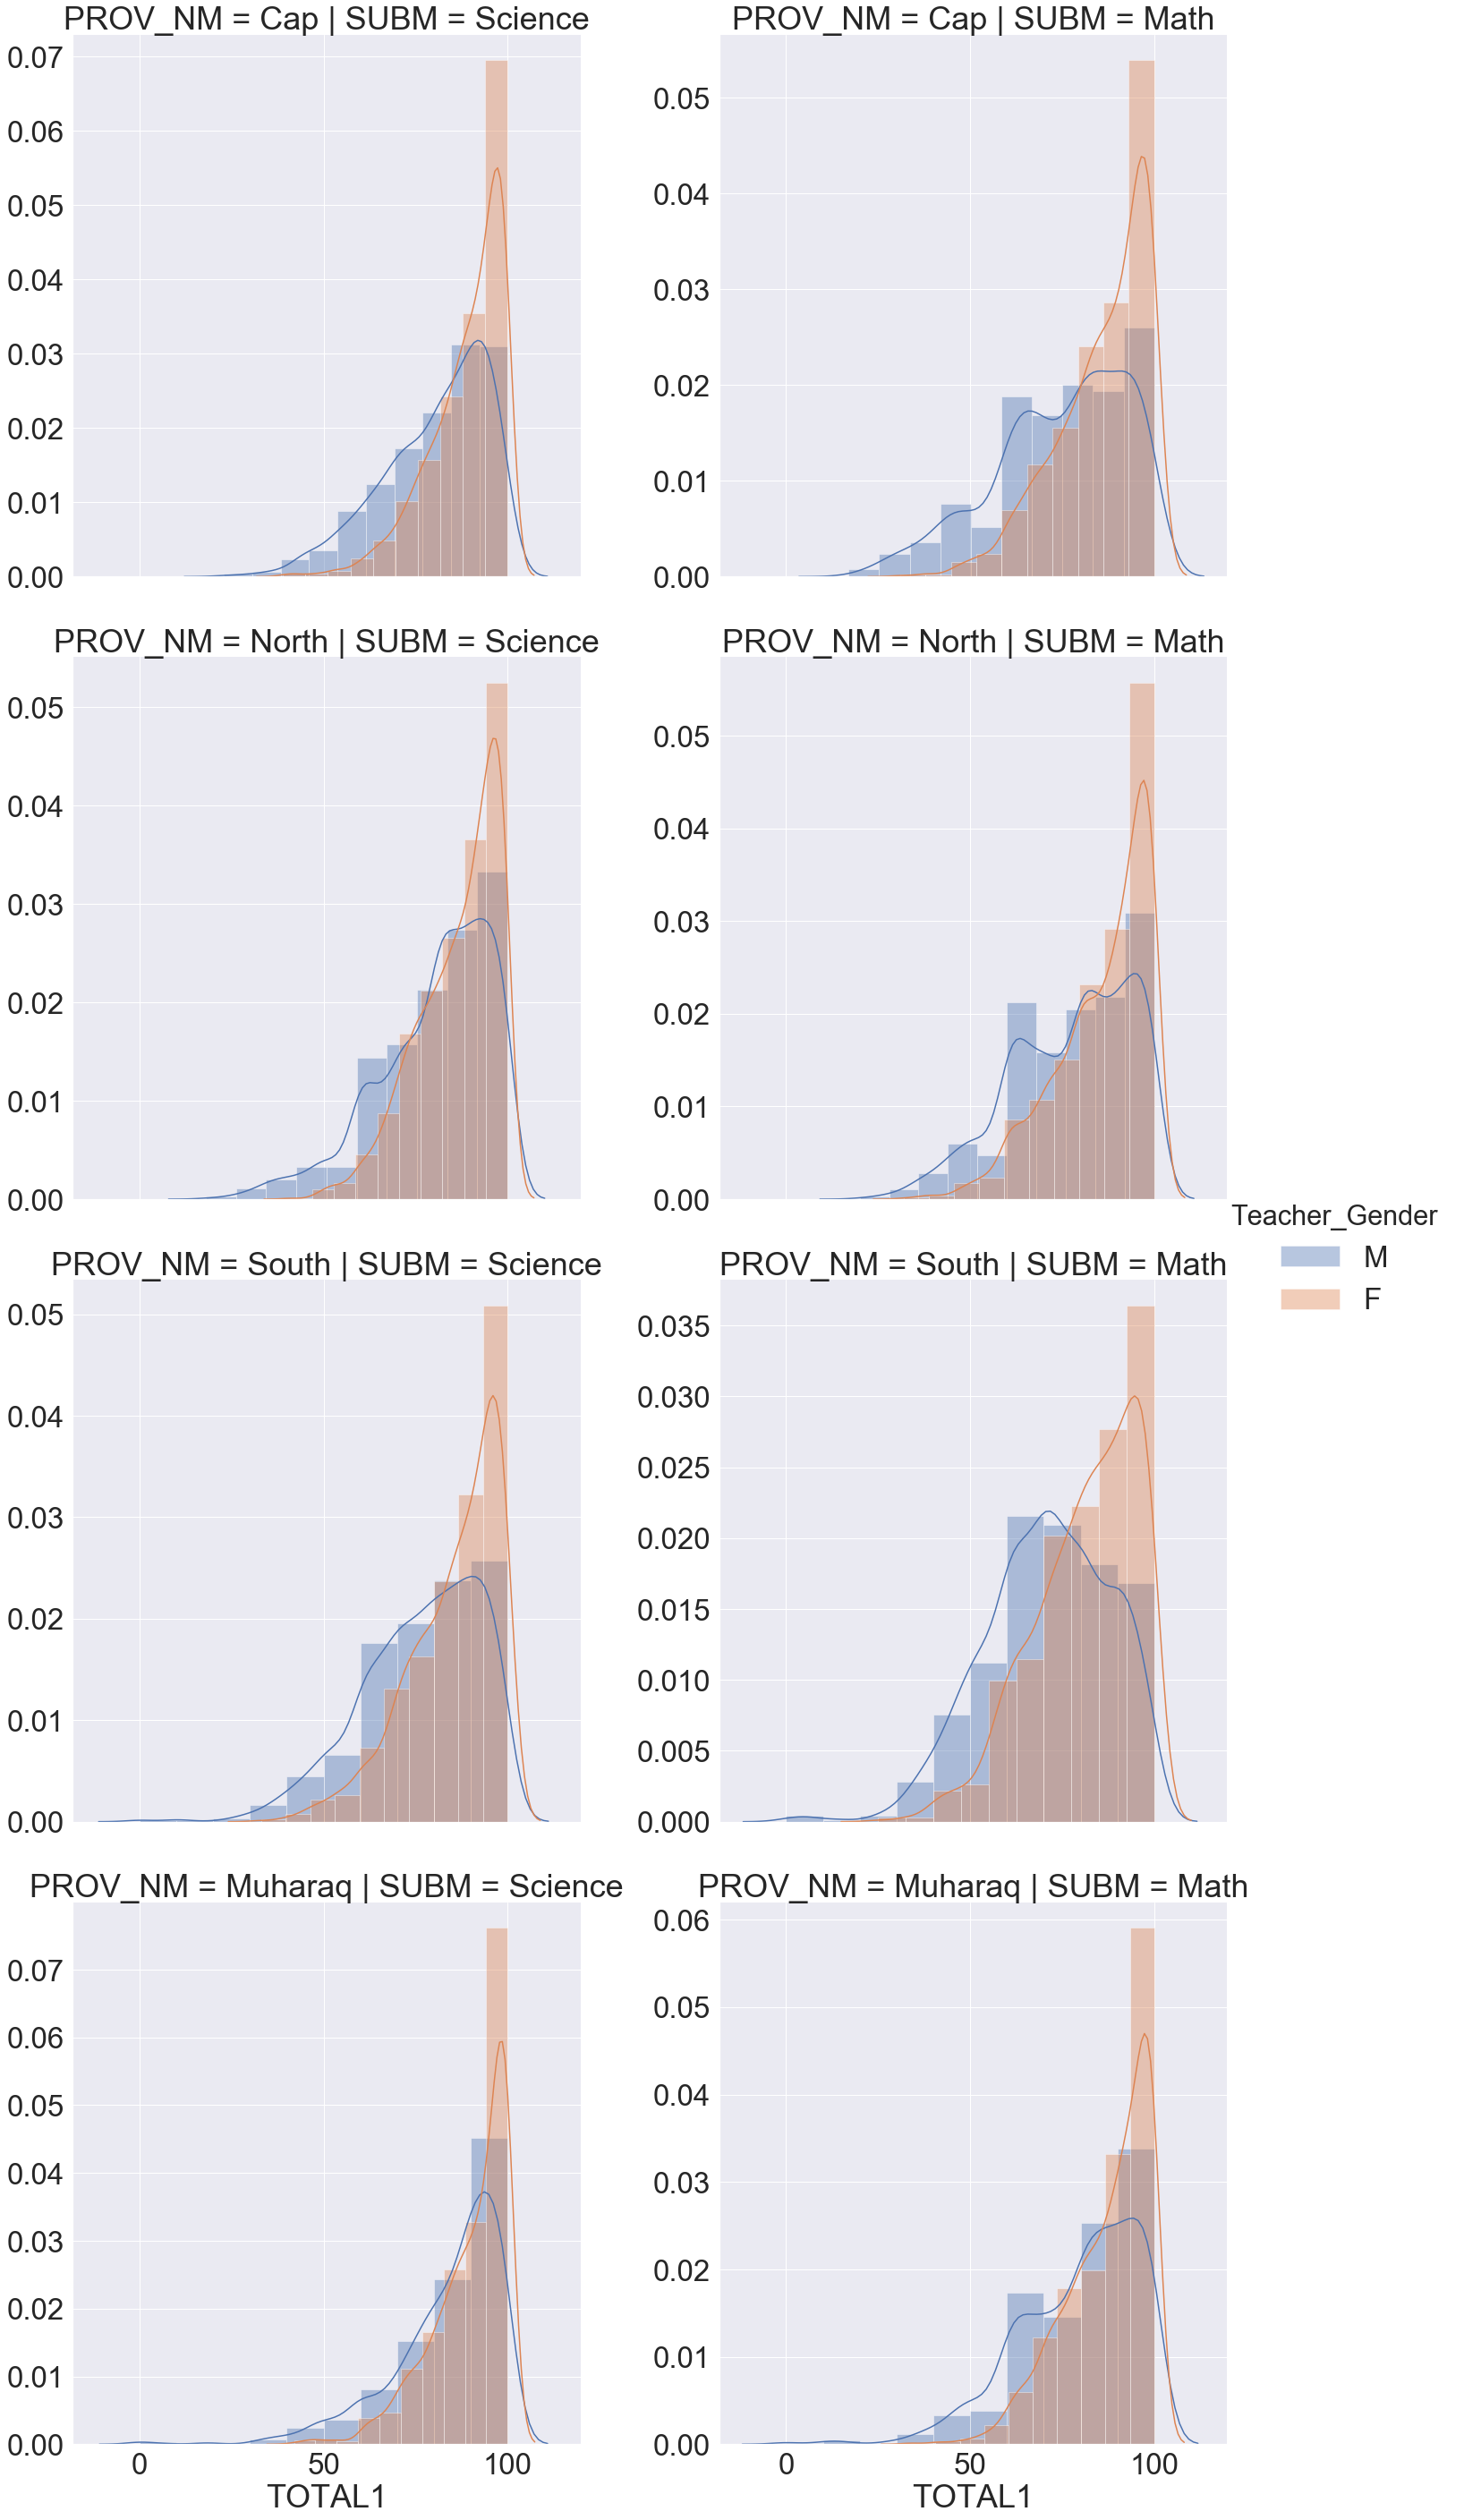

In [70]:
# Students' final results in ligh of Nast exam by Province /. row="Prov_nm" 
sns.set(font_scale=3)
#with sns.plotting_context(rc={"legend.fontsize":26}):
g=sns.FacetGrid(df, col="SUBM", hue="Teacher_Gender", row="PROV_NM" ,aspect=1,  height=10 , sharey=False)
g.map(sns.distplot, "TOTAL1", bins=10, kde=1) #, facecolor=(0, 0, 0, 0),linewidth=5, edgecolor=sns.color_palette("dark", 3))
g.add_legend()
plt.show()

###     التخلص من النتائج الصفرية في الامتحانات الوطنية

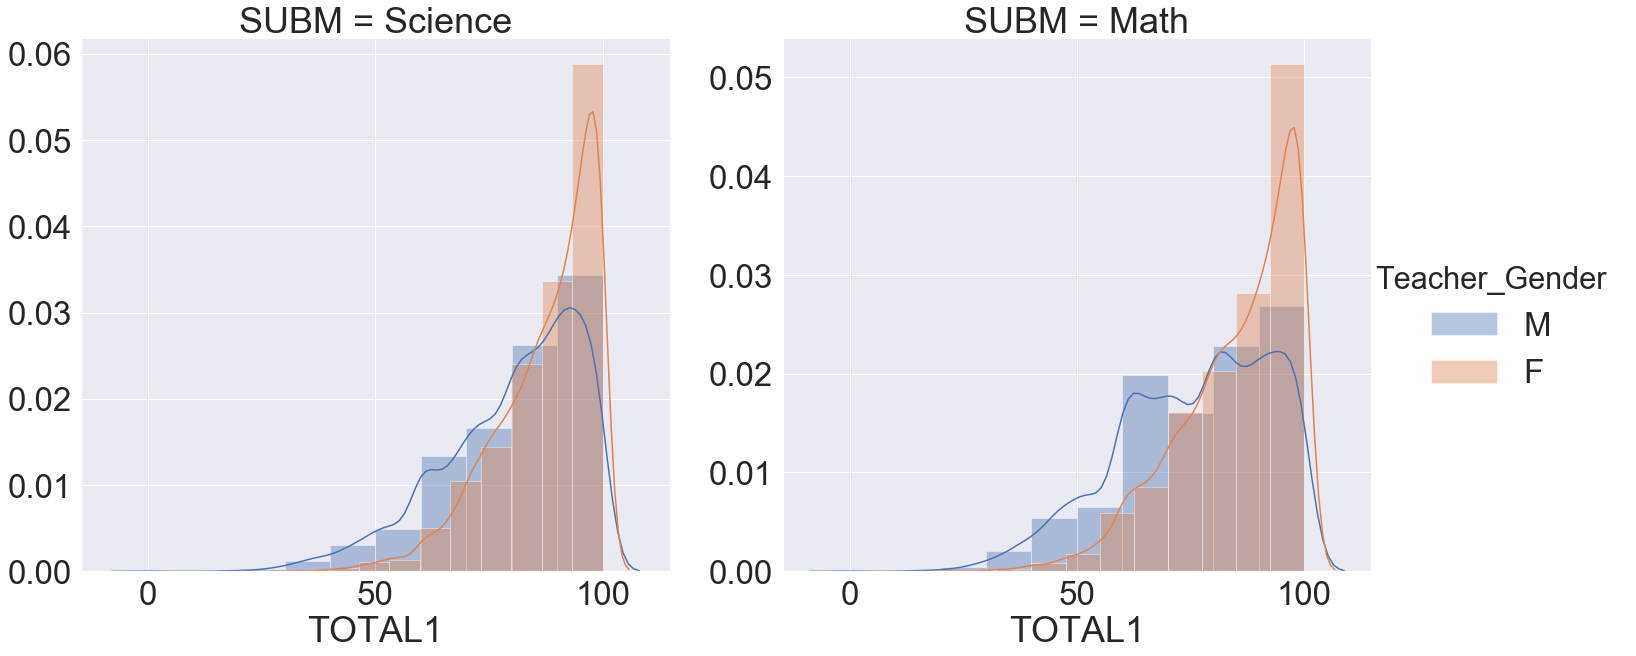

In [71]:
#.  df[df.NAT_MARK>0
sns.set(font_scale=3)
#with sns.plotting_context(rc={"legend.fontsize":26}):
g=sns.FacetGrid(df[df.NAT_MARK>0], col="SUBM", hue="Teacher_Gender", aspect=1,  height=10 , sharey=False)
g.map(sns.distplot, "TOTAL1", bins=10, kde=1) #, facecolor=(0, 0, 0, 0),linewidth=5, edgecolor=sns.color_palette("dark", 3))
g.add_legend()
plt.show()


###  الطلبة الحاصلين على نتائج أكثر من 60 في الاختبارات الوطنية  

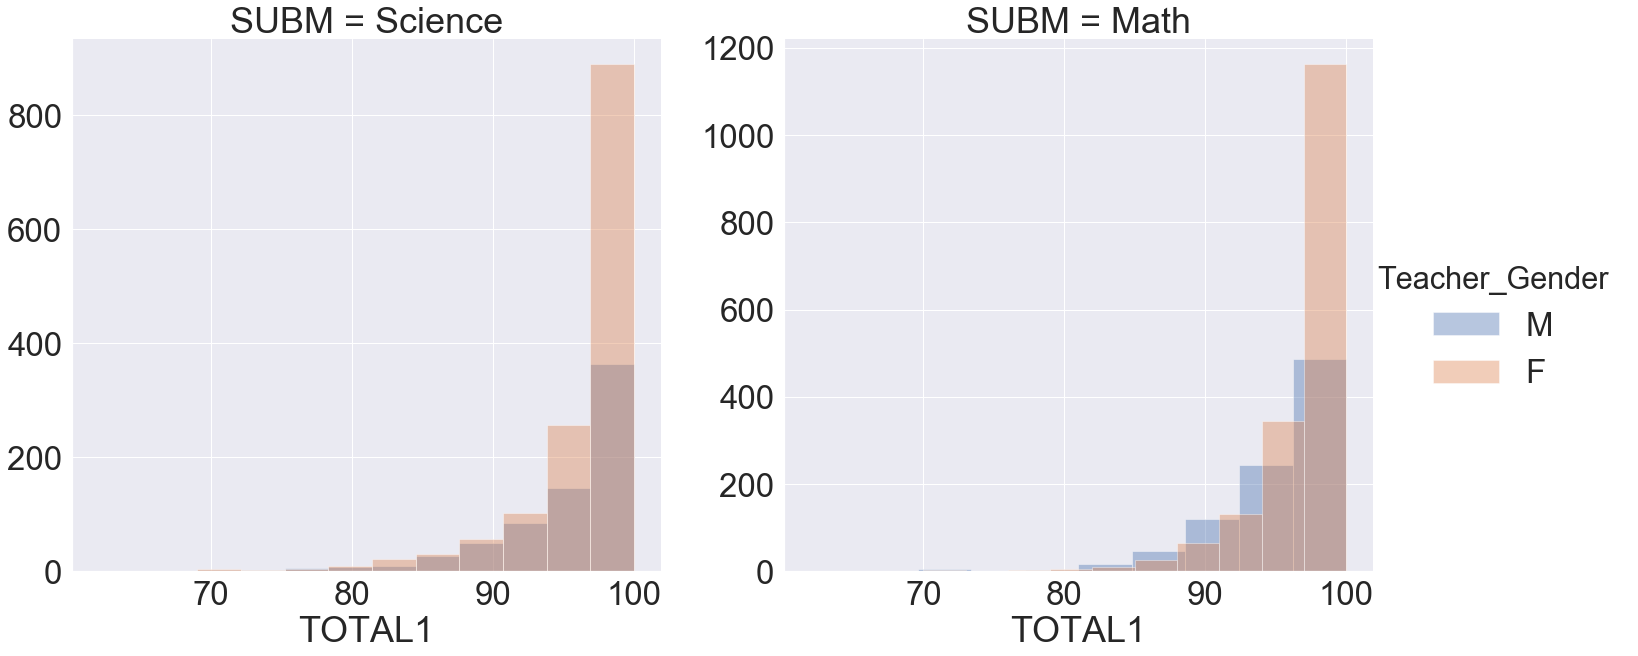

In [96]:
#.  df[df.NAT_MARK>70]
sns.set(font_scale=3)
#with sns.plotting_context(rc={"legend.fontsize":26}):
g=sns.FacetGrid(df[df.NAT_MARK>60], col="SUBM", hue="Teacher_Gender", aspect=1,  height=10 , sharey=False)
g.map(sns.distplot, "TOTAL1", bins=10, kde=0) #, facecolor=(0, 0, 0, 0),linewidth=5, edgecolor=sns.color_palette("dark", 3))
g.add_legend()
plt.show()

In [73]:

10 * np.random.rand(1)

array([6.15886308])

In [79]:
%precision 3
df[df.NAT_MARK>60].groupby("Teacher_Gender").TOTAL1.agg(["min", "max", "mean", "std", "count"])

min    max    mean    std  count
Teacher_Gender                                   
F               69.0  100.0  96.683  4.000   3128
M               62.0  100.0  95.379  4.923   1620

In [77]:
pd.set_option('precision', 3)

In [78]:
%precision 3
df[df.NAT_MARK>60].groupby("SUBM").FINAL1.agg(["min", "max", "mean", "std", "count"])

min   max    mean    std  count
SUBM                                     
Math     25.0  50.0  47.266  3.191   2670
Science  24.0  50.0  47.027  3.556   2078

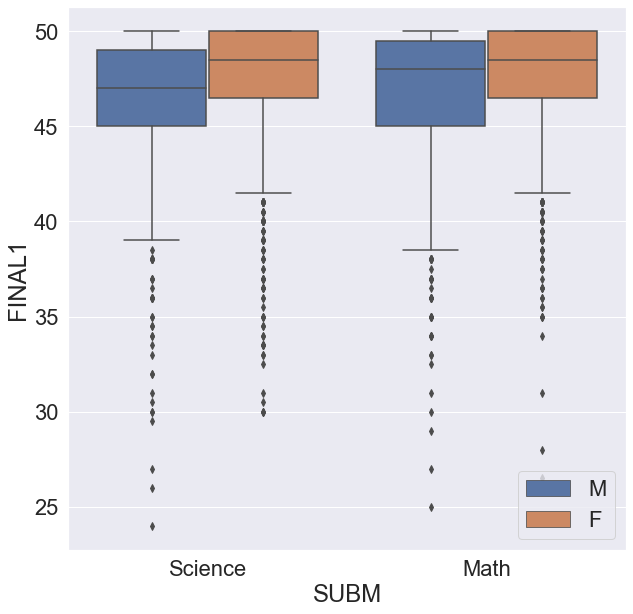

In [102]:

plt.figure(figsize=(10,10))
sns.set(font_scale=2)
sns.boxplot( x="SUBM", y=df.FINAL1, data=df[df.NAT_MARK>60], hue="Teacher_Gender")
plt.legend(loc="lower right")
plt.show()

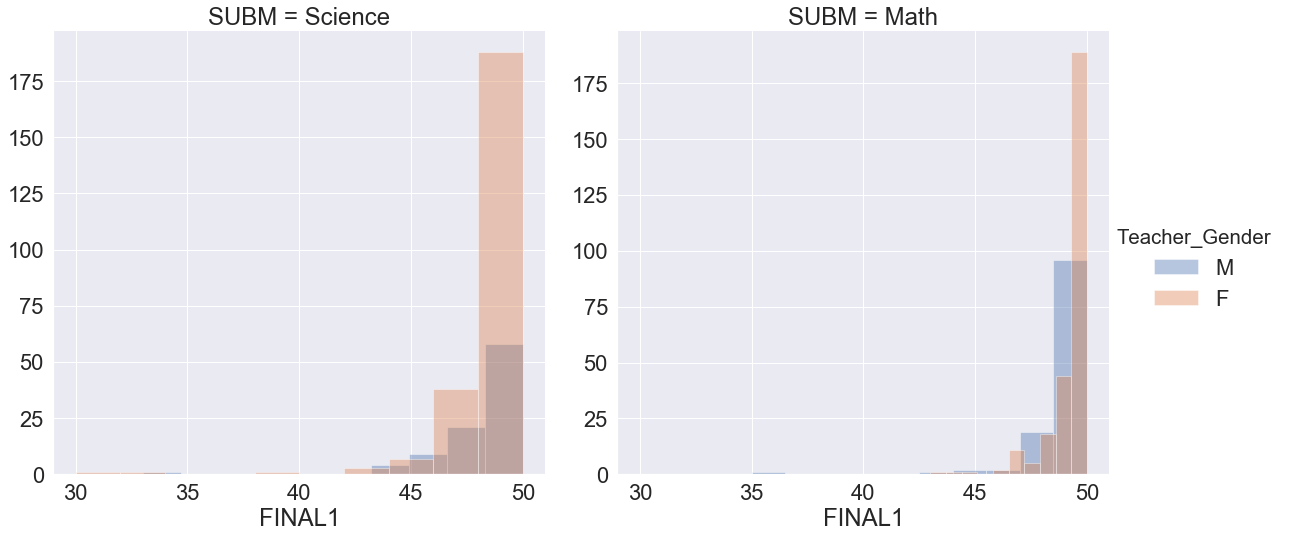

In [111]:
sns.set(font_scale=2)

g=sns.FacetGrid(df[df.NAT_MARK>70], col="SUBM", hue="Teacher_Gender", aspect=1,  height=8 , sharey=False)
g.map(sns.distplot, "FINAL1", bins=10, kde=0) #, facecolor=(0, 0, 0, 0),linewidth=5, edgecolor=sns.color_palette("dark", 3))
g.add_legend()
plt.show()

In [112]:
df[df.NAT_MARK>60].groupby("Teacher_Gender").TOTAL1.agg(["mean", "max","min","median", "std", "count"])

mean    max   min  median    std  count
Teacher_Gender                                           
F               96.683  100.0  69.0    98.0  4.000   3128
M               95.379  100.0  62.0    97.0  4.923   1620

In [113]:
df.shape

(24190, 16)

## مقارنة نتائج الطلبة في الفصل الثاني في ضوء نتائج الاختبارات الوطنية

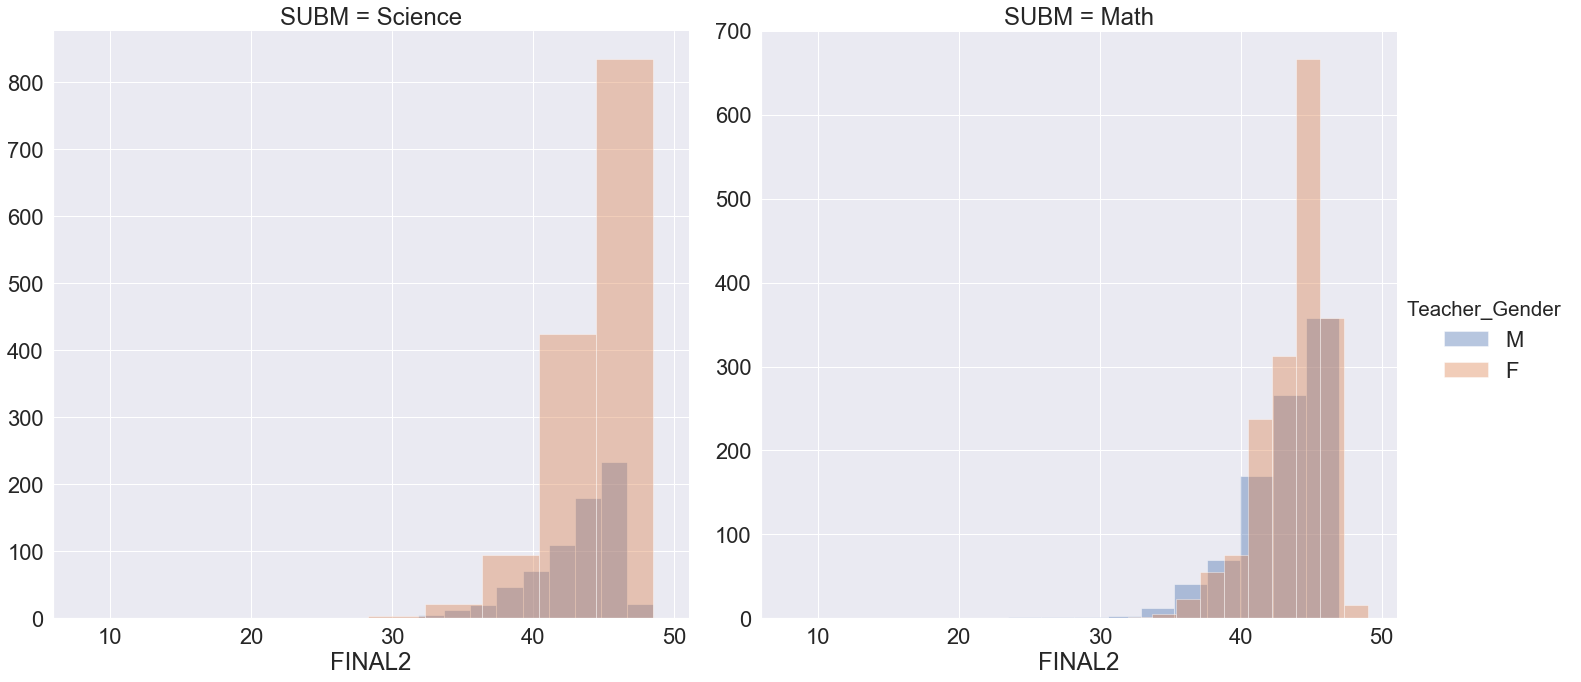

In [116]:
#.  df[df.NAT_MARK   70
sns.set(font_scale=2)
#with sns.plotting_context(rc={"legend.fontsize":26}):
g=sns.FacetGrid(df[df.NAT_MARK>60], col="SUBM", hue="Teacher_Gender", aspect=1,  height=10 , sharey=False)
g.map(sns.distplot, "FINAL2", bins=10, kde=0) #, facecolor=(0, 0, 0, 0),linewidth=5, edgecolor=sns.color_palette("dark", 3))
g.add_legend()
plt.show()


In [117]:
df[df.NAT_MARK>60].groupby("SUBM").FINAL2.agg(["mean", "max","min","std", "count"])

mean   max   min    std  count
SUBM                                     
Math     43.572  49.0  23.5  2.676   2671
Science  43.694  48.5   8.0  2.835   2079

In [118]:
SMALL_SIZE = 10
MEDIUM_SIZE = 14
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)         
plt.rc('axes', titlesize=SMALL_SIZE)    
plt.rc('axes', labelsize=BIGGER_SIZE)   
plt.rc('xtick', labelsize=MEDIUM_SIZE)  
plt.rc('ytick', labelsize=MEDIUM_SIZE)  
plt.rc('legend', fontsize=SMALL_SIZE)   
plt.rc('figure', titlesize=BIGGER_SIZE) 

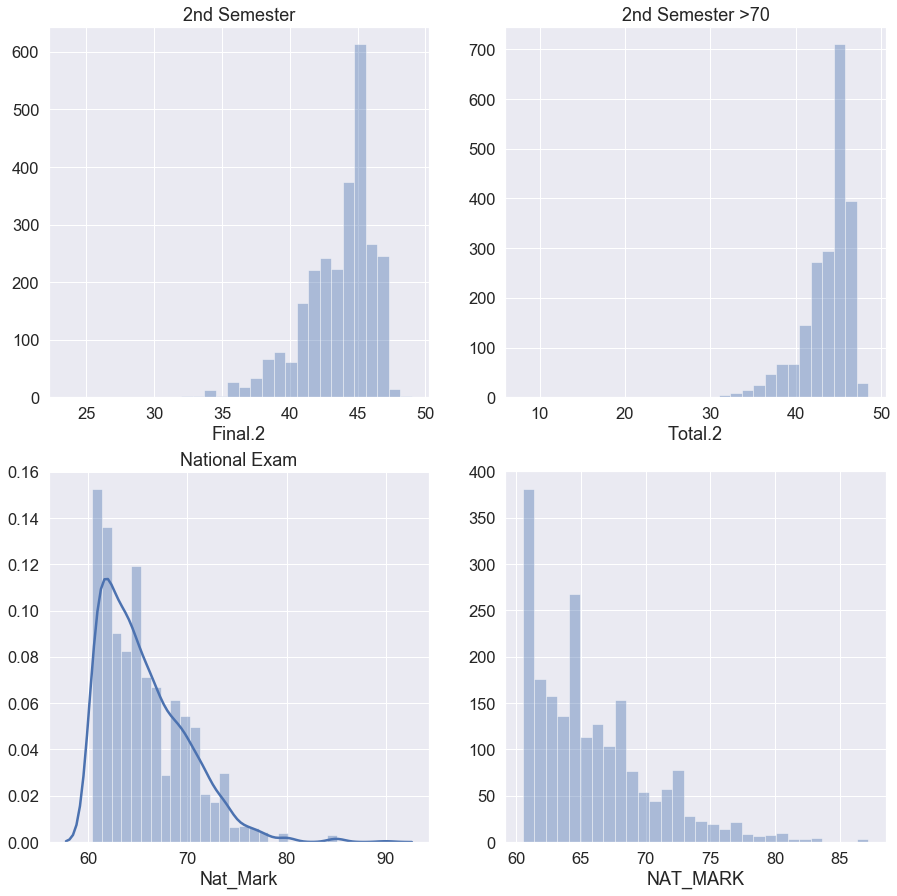

In [119]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
fig, ax=plt.subplots( 2, 2, figsize=(15,15), sharey=False, )

ax[0,0]=sns.distplot( df[(df.NAT_MARK>60) & (df.SUBM=="Math")].FINAL2,kde=0, bins=30,  ax=ax[0,0]     )


ax[0,0].set(title="2nd Semester", xlabel="Final.2")
# ax[0,0].legend(loc="upper left", title="2nd Semester", title_fontsize="x-large")


ax[1,0]=sns.distplot( df[(df.NAT_MARK>60) & (df.SUBM=="Math")].NAT_MARK, bins=30, ax=ax[1,0])



ax[1,0].set(title="National Exam", xlabel="Nat_Mark", ylabel="")
# ax[1,0].legend(loc="upper right", title="National Exam", title_fontsize="x-large")

ax[0,0]=sns.distplot( df[(df.NAT_MARK>60) & (df.SUBM=="Science")].FINAL2,kde=0, bins=30,  ax=ax[0,1]     )

ax[0,1].set(title="2nd Semester >70", xlabel="Total.2", )
# ax[0,1].legend(loc="upper left", title="2nd Semester", title_fontsize="x-large")
ax[1,1]=sns.distplot( df[(df.NAT_MARK>60) & (df.SUBM=="Science")].NAT_MARK,kde=0,  bins=30, ax=ax[1,1])
# ax[1,0].set(title="National Exam", xlabel="Nat_Mark", ylabel="")
# ax[1,1].legend(loc="upper right", title="National Exam >70", title_fontsize="x-large")
plt.show()

# احصائيات عن الطلبة الحاصلين على صفر في الامتحانات الوطنية

In [120]:
df[df.NAT_MARK==0].groupby(["Teacher_Gender"]).size()

Teacher_Gender
F     54
M    130
dtype: int64

In [121]:
df[df.NAT_MARK==0].groupby([ "PROV_NM"]).size()

PROV_NM
Cap        26
Muharaq    52
North      56
South      50
dtype: int64

In [122]:
df[df.NAT_MARK==0].groupby(["Teacher_Gender", "PROV_NM"]).size()

Teacher_Gender  PROV_NM
F               Cap         9
                Muharaq    20
                North      13
                South      12
M               Cap        17
                Muharaq    32
                North      43
                South      38
dtype: int64

In [123]:
df[(df.NAT_MARK==0) & (df.TOTAL2>70)].groupby("Teacher_Gender").size()

Teacher_Gender
F    32
M    27
dtype: int64

In [124]:
df[(df.NAT_MARK==0) & (df.TOTAL1>70)].groupby("Teacher_Gender").size()

Teacher_Gender
F    43
M    30
dtype: int64

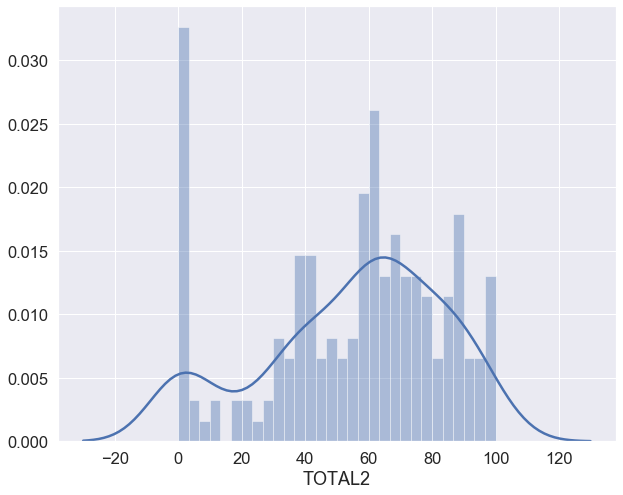

In [125]:
plt.figure(figsize=(10,8))
sns.distplot( df[df.NAT_MARK==0]['TOTAL2'],kde=1, bins=30)
# plt.legend(loc="upper right", title="Null Marks repartition ")

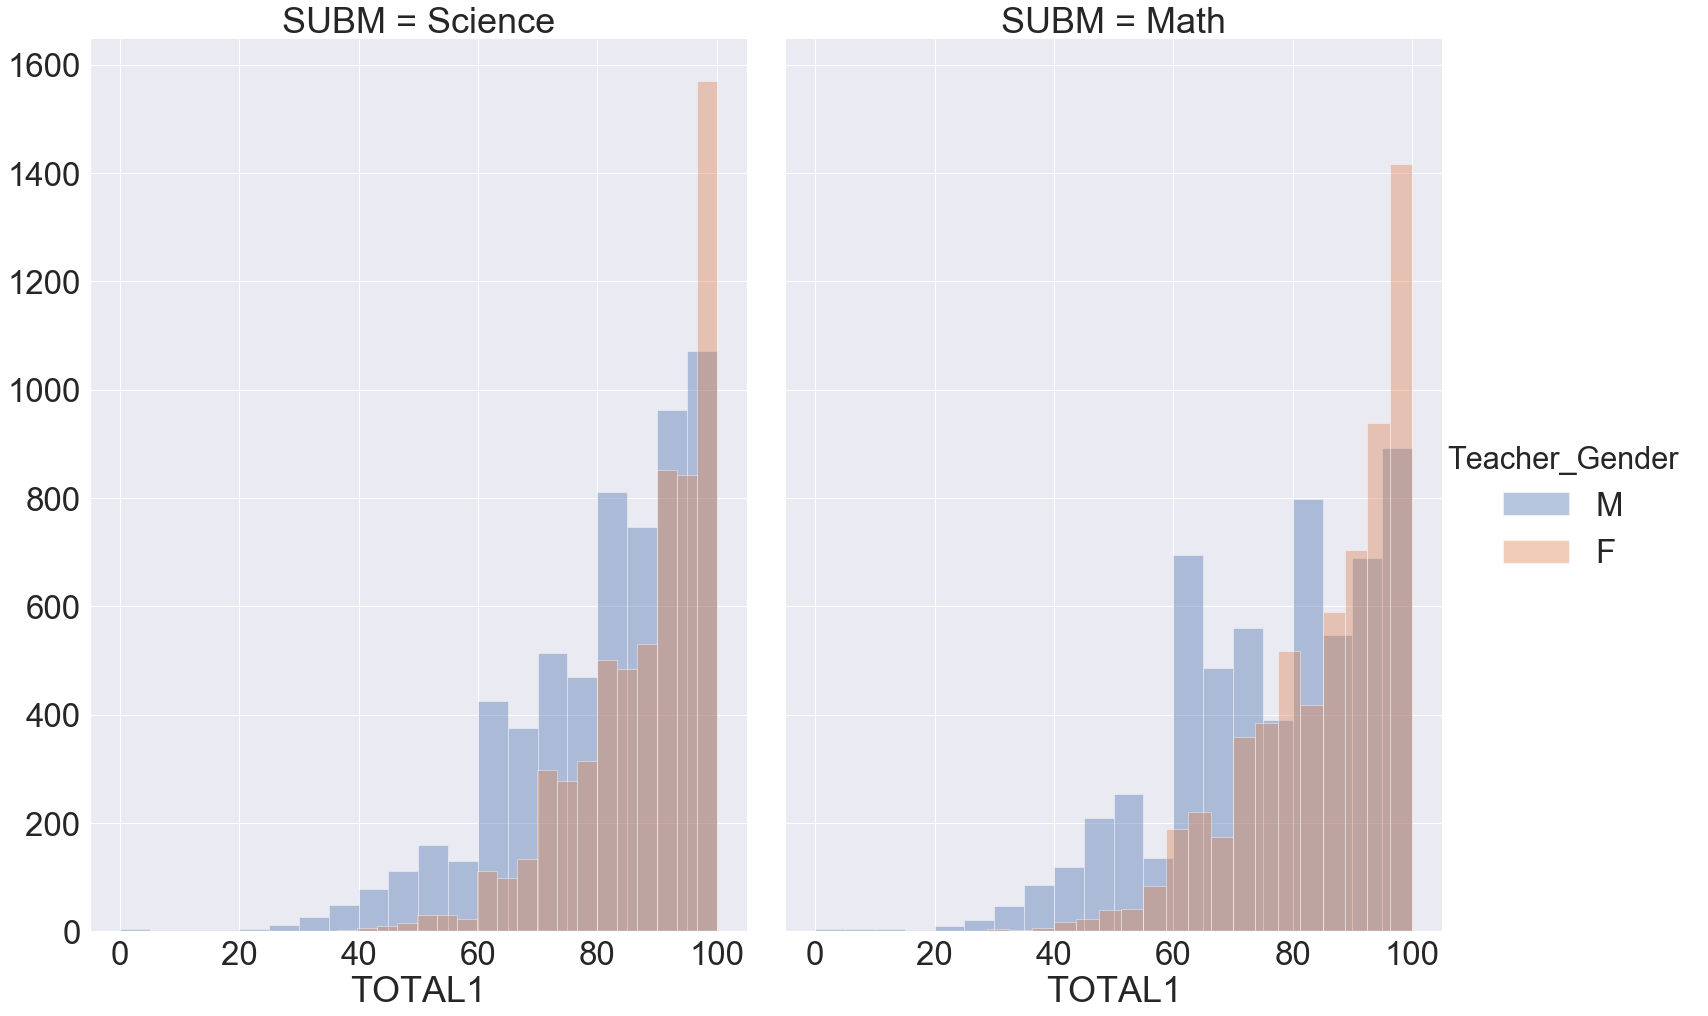

In [126]:
sns.set(font_scale=3)
g=sns.FacetGrid(df, col="SUBM", hue="Teacher_Gender", aspect=.7, height=15)
g.map(sns.distplot, "TOTAL1", bins=20, kde=0)
g.add_legend()

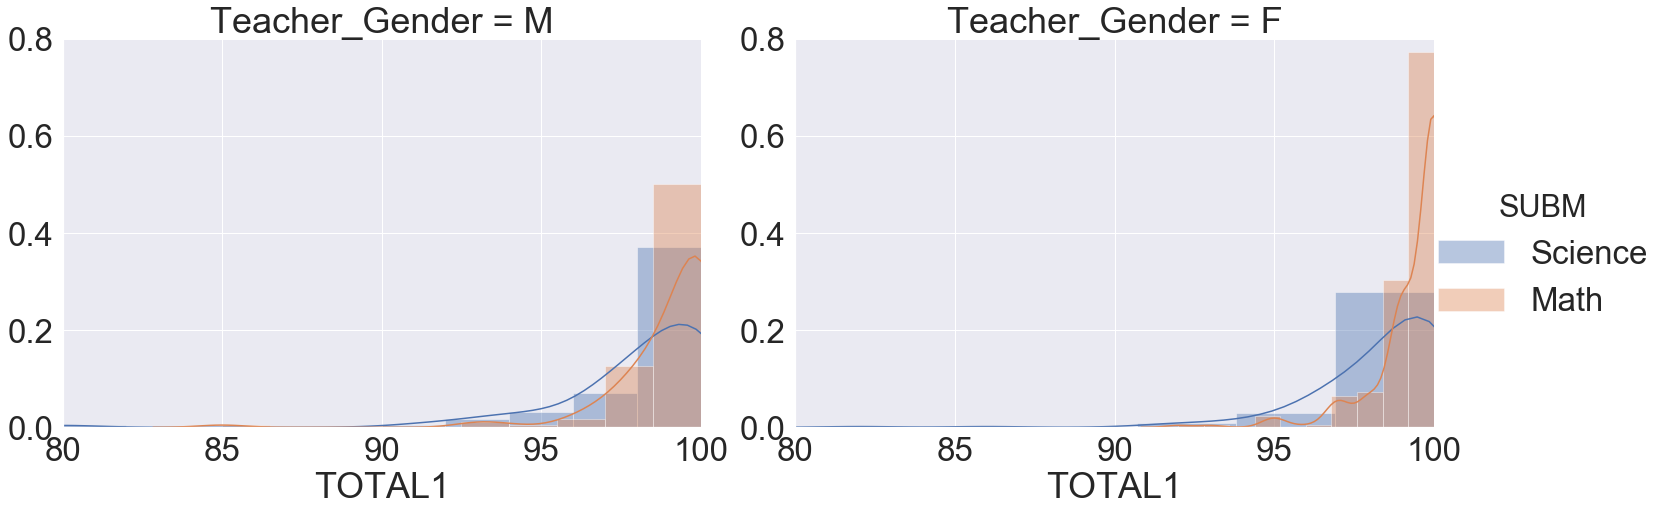

In [127]:
g=sns.FacetGrid(df[df.NAT_MARK>70], hue="SUBM", col="Teacher_Gender", aspect=1.3,  height=8, sharey=False)
g.map(sns.distplot, "TOTAL1", bins=10)
g.set(xlim=(80, 100), ylim=(0, 0.8))
g.add_legend()
plt.show()
# bigger variance in math subjects

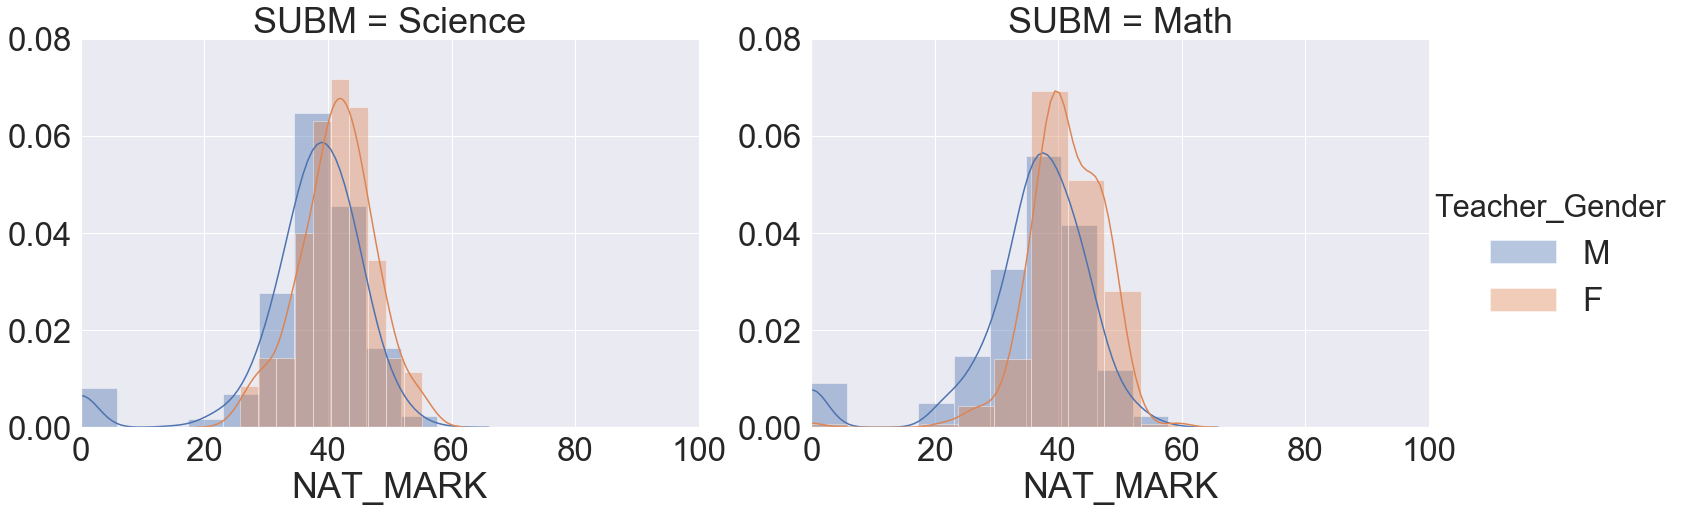

In [128]:
g=sns.FacetGrid(df[df.TOTAL1<60], hue="Teacher_Gender", col="SUBM" , aspect=1.3,  height=8, sharey=False)
g.map(sns.distplot, "NAT_MARK", bins=10)
g.set(xlim=(0, 100), ylim=(0, 0.08))
g.add_legend()
plt.show()
# bigger variance in math subjects

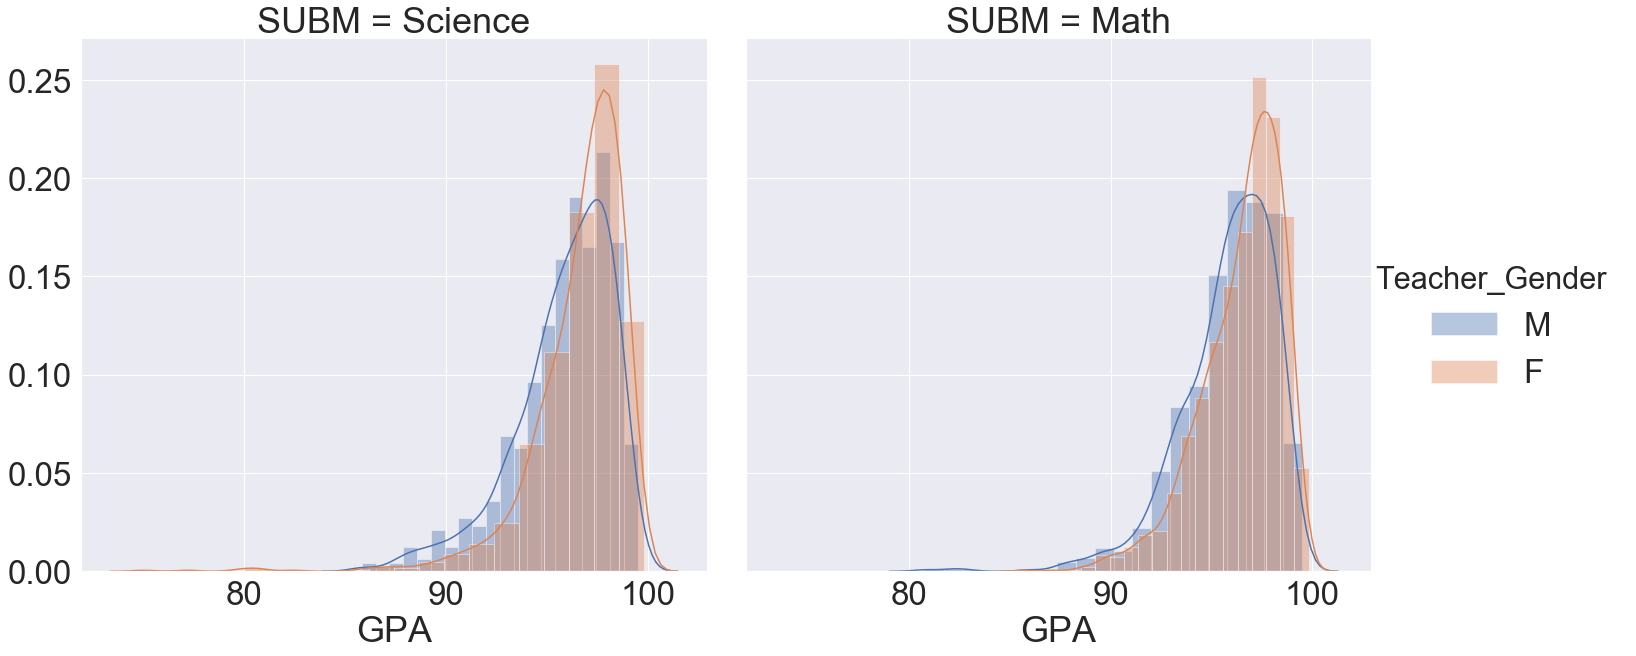

In [129]:
g=sns.FacetGrid(df[df.NAT_MARK>60], col="SUBM", hue="Teacher_Gender", aspect=1,  height=10)
g.map(sns.distplot, "GPA", bins=20)
g.add_legend()

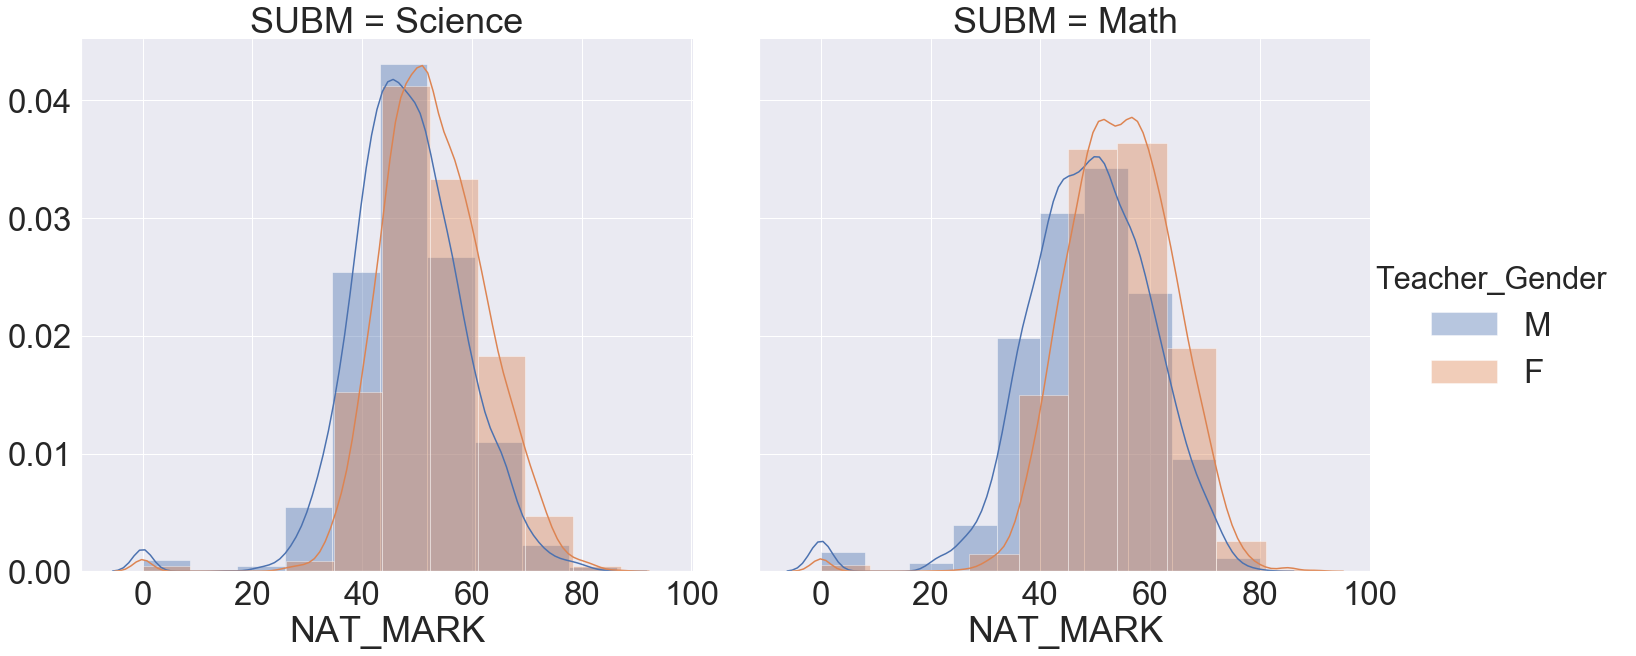

In [130]:
g=sns.FacetGrid(df, col="SUBM", hue="Teacher_Gender", aspect=1,  height=10)
g.map(sns.distplot, "NAT_MARK", bins=10)
g.add_legend()

In [131]:
df.PROV_NM.value_counts().index

Index(['North', 'South', 'Muharaq', 'Cap'], dtype='object')

In [132]:
df[df.GPA>75].SUBM.count()

23406

#  توزيع  نتائج الاختبارات الوطنية في ضوء النتائج النهائية 

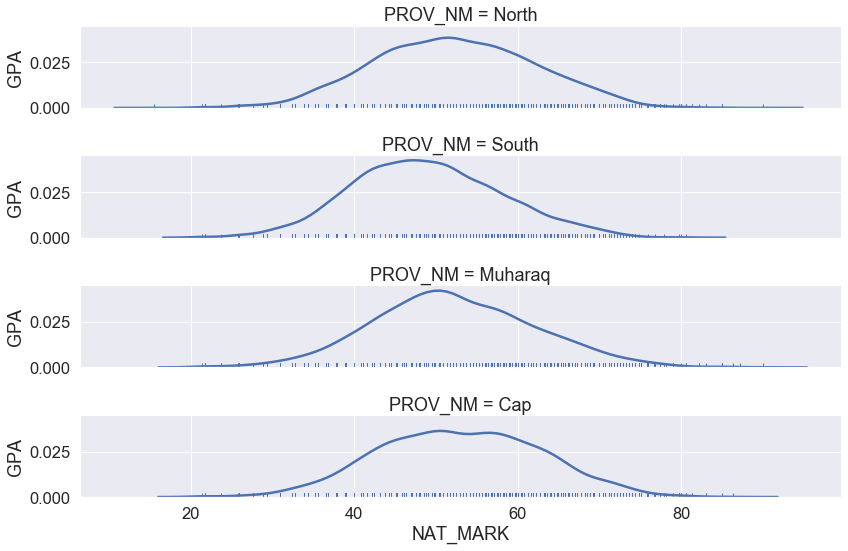

In [133]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
province=df.PROV_NM.value_counts().index
g=sns.FacetGrid(df[df.NAT_MARK>0], row="PROV_NM",row_order=province,  height=2,  aspect=6)
g.map(sns.distplot, "NAT_MARK", "GPA", hist=False, rug=True, kde=1)
# A revoire ugent

##  توزيع  نتائج نهائي الفصل الأول في ضوء نهائي الفصل الثاني 

In [134]:
df.to_csv("GD_Part2_clean.csv")

In [17]:
df=pd.read_csv("data/GD_Part2_clean.csv")

/Users/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


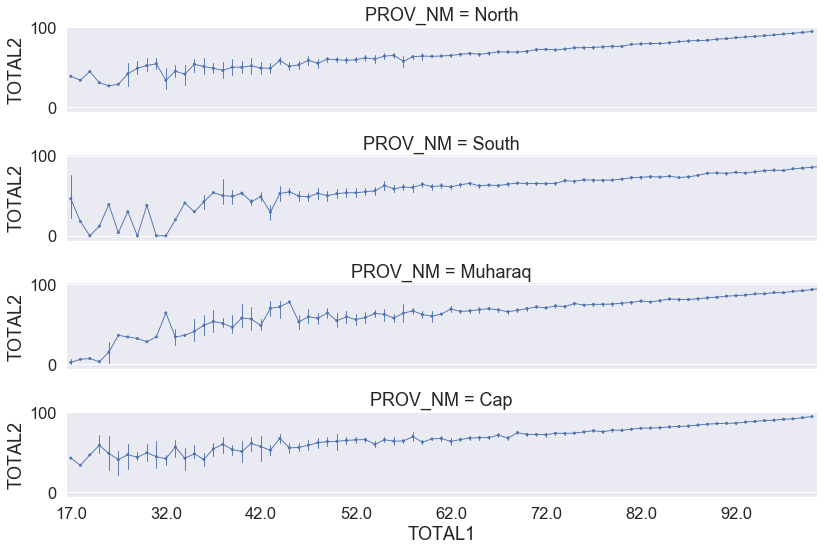

In [136]:

sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": .5})


province=df.PROV_NM.value_counts().index
g=sns.FacetGrid(df, row="PROV_NM",row_order=province,  height=2,  aspect=6)
g.map(sns.pointplot, "TOTAL1", "TOTAL2", hist=False, rug=True)
locs, labels=plt.xticks()
g.set(xticks=locs[0::10], xticklabels=labels[0::10])
plt.show()

## جدول الارتباطات فيما بين المتغيرات

أهمية الفصل الأول

In [137]:
df=df.drop("Unnamed: 0", axis=1)

In [138]:
# sns.heatmap(df[['ACHIEVEMENTS1', 'ACHIEVEMENTS2', 'MIDTERM1', 'MIDTERM2', 'FINAL1',
#        'FINAL2', 'TOTAL1', 'TOTAL2', 'D_MARK', 'NAT_MARK']], 
#             xticklabels=df.columns,
#             yticklabels=df.columns,
#             cmap='RdBu_r',
#             annot=True,
#             linewidth=0.5)

In [139]:
from sklearn.feature_selection import RFE, RFECV


In [12]:
df[['ACHIEVEMENTS1', 'ACHIEVEMENTS2', 'MIDTERM1', 'MIDTERM2', 'FINAL1',
       'FINAL2', 'TOTAL1', 'TOTAL2', 'D_MARK', 'NAT_MARK']].corr(method ='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'))
# kendall
# The importance of  Fst Term Result,    اهمية نتيجة الفصل الأول  
# Early diagnosis of Student's learning path at the end of the 1st semester 

In [141]:
df[['ACHIEVEMENTS1', 'ACHIEVEMENTS2', 'MIDTERM1', 'MIDTERM2', 'FINAL1',
       'FINAL2', 'TOTAL1', 'NAT_MARK']].corr()['NAT_MARK']

ACHIEVEMENTS1    0.511
ACHIEVEMENTS2    0.501
MIDTERM1         0.623
MIDTERM2         0.608
FINAL1           0.656
FINAL2           0.693
TOTAL1           0.699
NAT_MARK         1.000
Name: NAT_MARK, dtype: float64

/Users/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


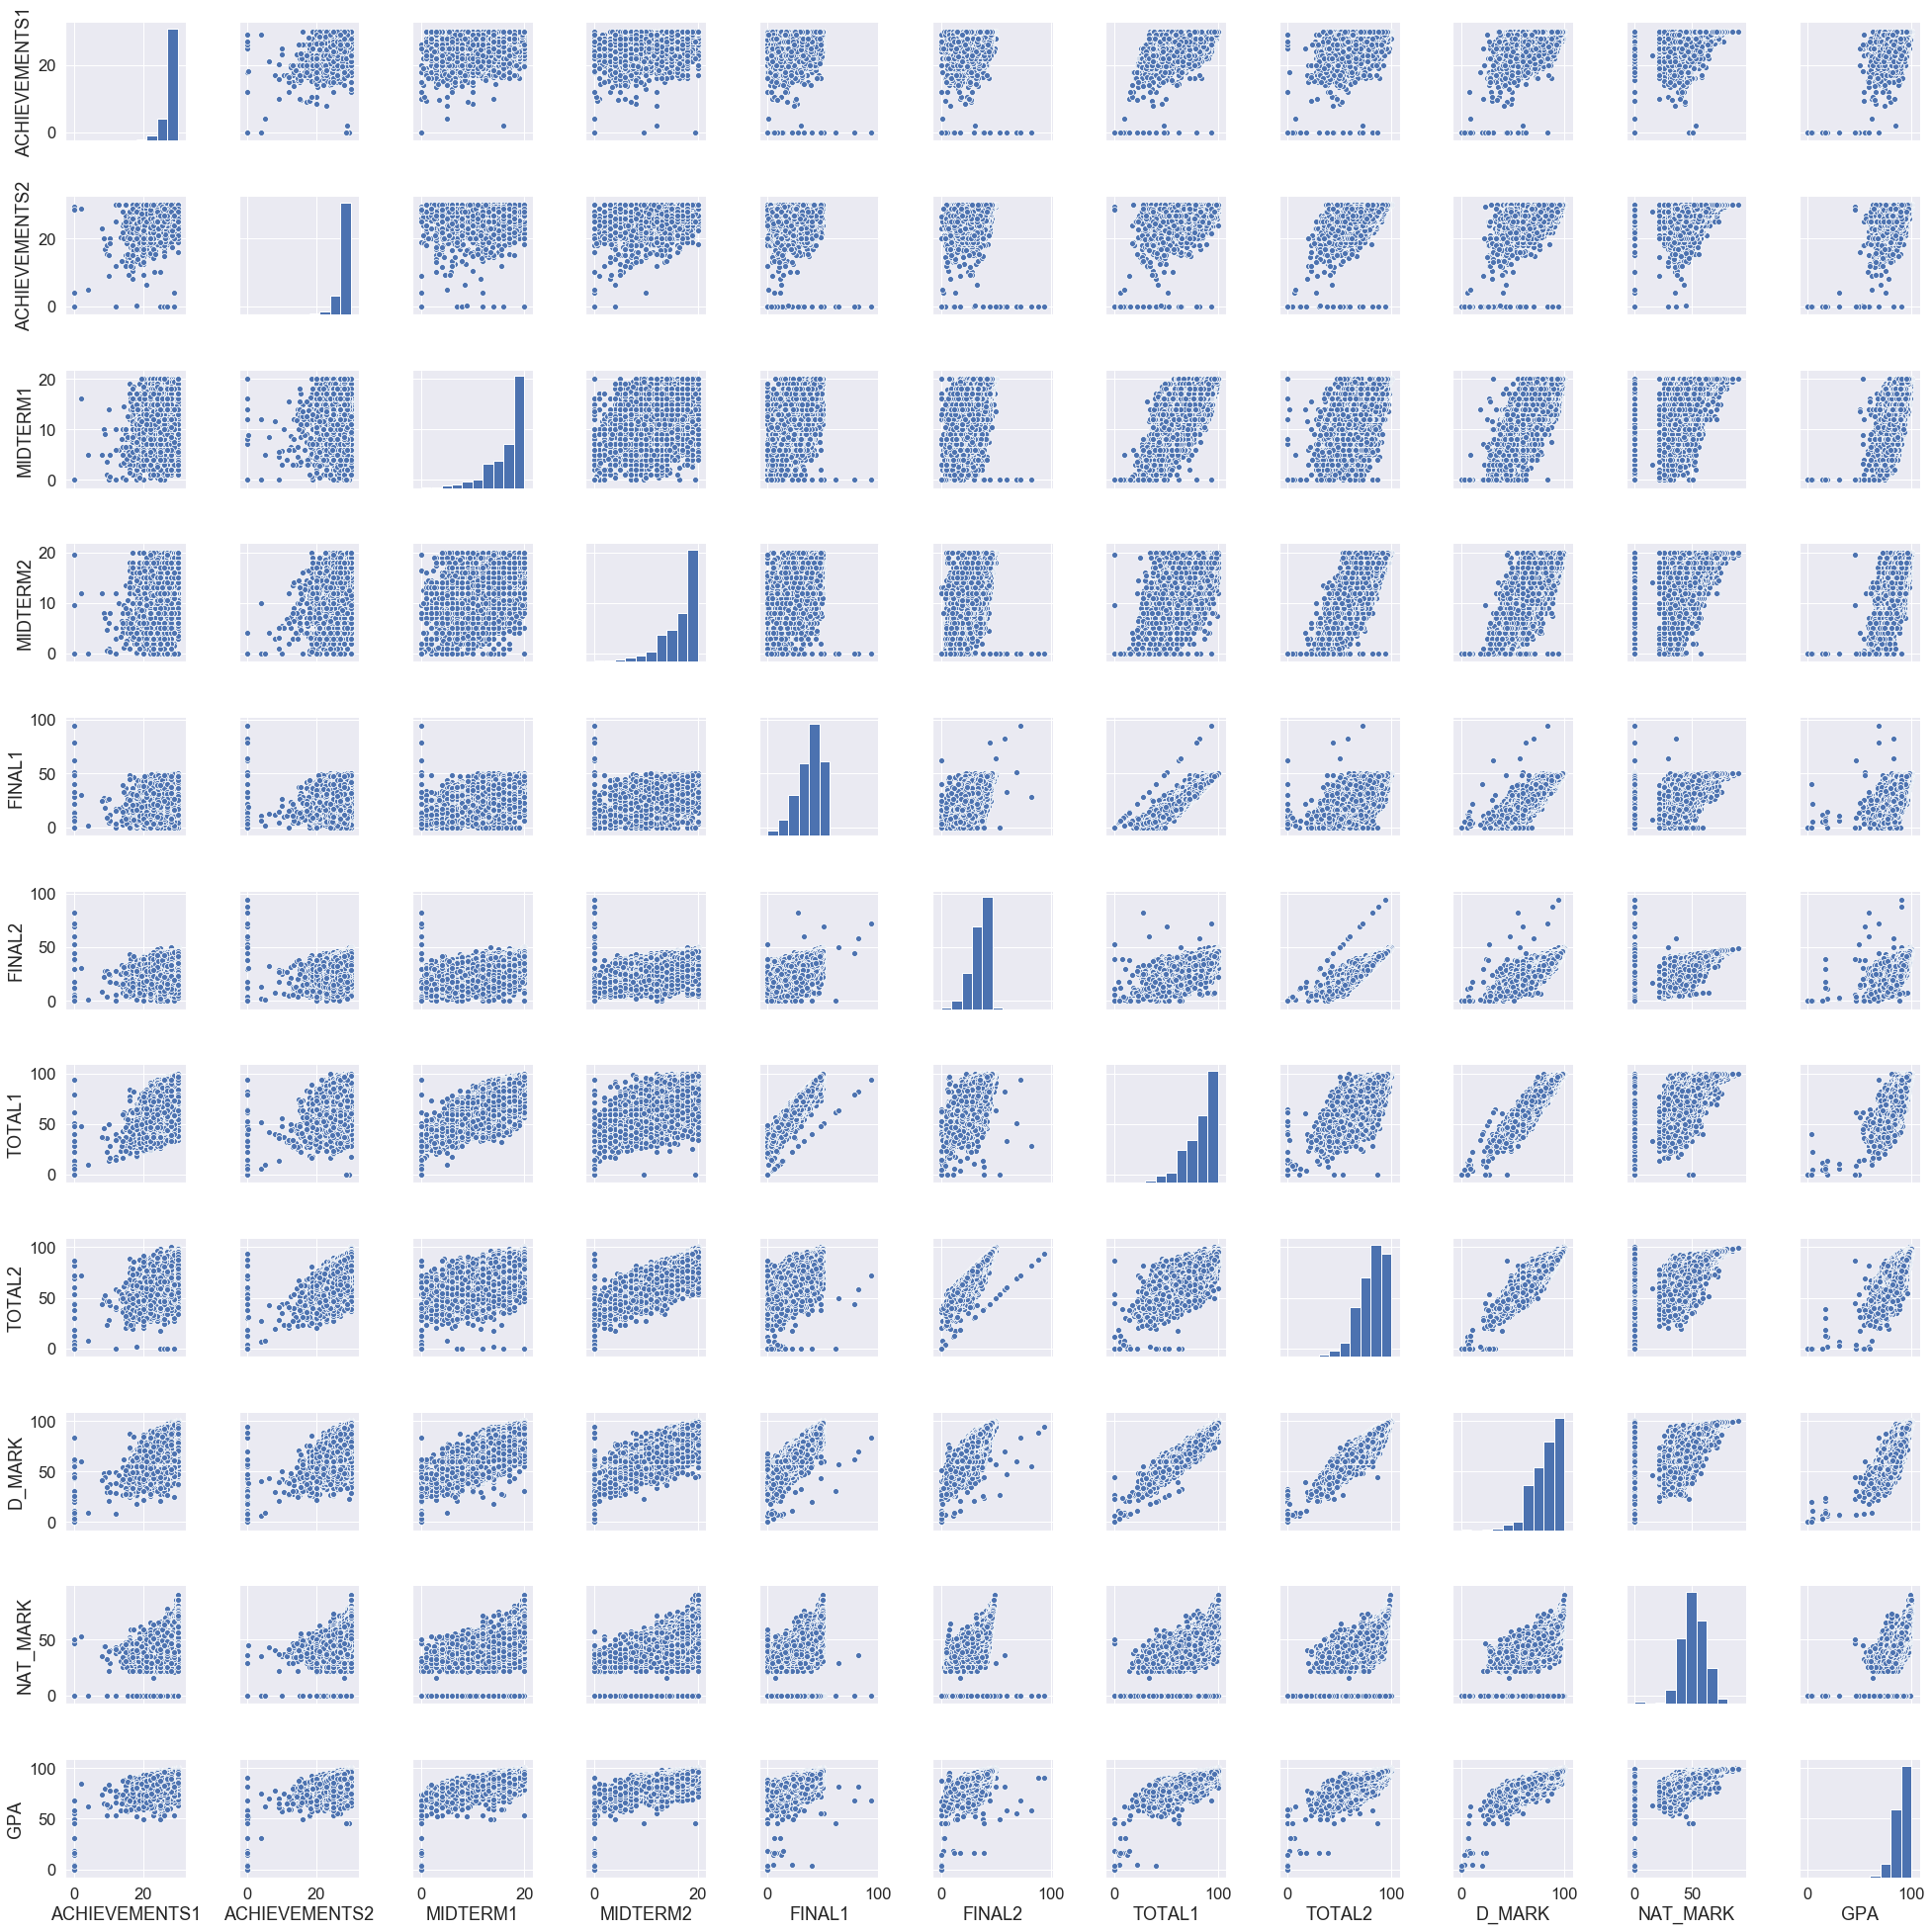

In [142]:
# sns.pairplot(df, vars=['ACHIEVEMENTS1', 'ACHIEVEMENTS2', 'MIDTERM1', 'MIDTERM2', 'FINAL1',
#        'FINAL2', 'TOTAL1', 'TOTAL2', 'D_MARK', 'NAT_MARK', 'GPA'])
# plt.show()

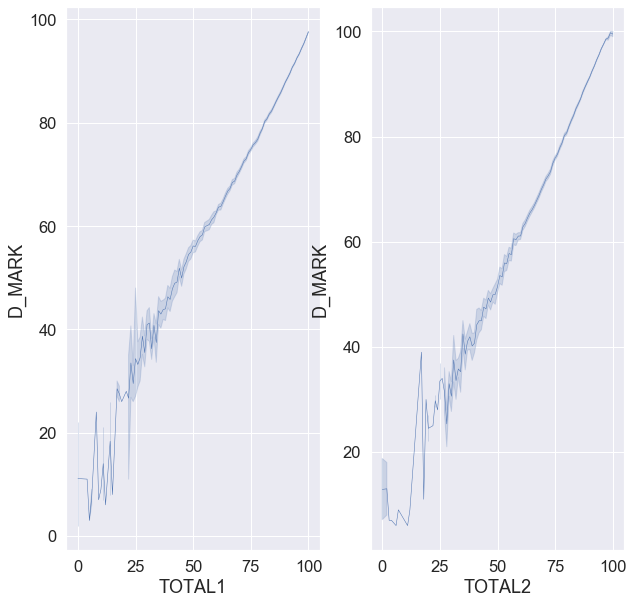

In [143]:
fig, ax=plt.subplots( 1, 2, figsize=(10,10), sharey=False)
ax[0]=sns.lineplot(x="TOTAL1", y="D_MARK", data=df[df.D_MARK.notnull()], ax=ax[0])
ax[1]=sns.lineplot(x="TOTAL2", y="D_MARK", data=df[df.D_MARK.notnull()], ax=ax[1])
locs, labels=plt.xticks()
# ax[0].set(xticks=locs[0::10], xticklabels=labels[0::10])
# ax[1].set(xticks=locs[0::10], xticklabels=labels[0::10])

plt.show()

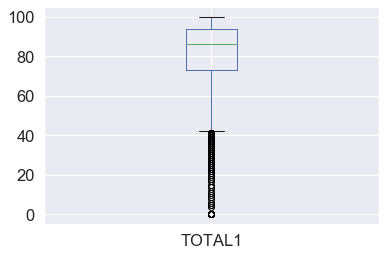

In [144]:
df.TOTAL1.plot(kind="box")
# how dispkay quartiles to put the threshod for outliers

In [145]:
df.SUBM.unique()

array(['Science', 'Math'], dtype=object)

In [146]:
# g=sns.FacetGrid(df[df.NAT_MARK>0], hue="PROV_NM",palette="Set1",  height=5,  hue_kws={"marker":["^", "v"]})
# g.map(plt.scatter, "NAT_MARK", "GPA", s=50, edgecolor="white")
# g.add_legend();

In [147]:
df["ACHIEVEMENTS1"].isnull().sum()

df.isnull().sum()

CPR_NO             0
SCH_NM             0
PROV_NM            0
SUBM               0
Teacher_Gender     0
                  ..
TOTAL1            16
TOTAL2             0
D_MARK             0
NAT_MARK           0
GPA                0
Length: 16, dtype: int64

In [148]:

for i in df.columns:
    sum(pd.isnull(df[i]))

In [149]:
 %%timeit
 df.isnull().any().any()

6.36 ms ± 178 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [150]:
df.shape

(24190, 16)

In [16]:
df.head()

Unnamed: 0    CPR_NO                 SCH_NM PROV_NM     SUBM  \
0           0  70913390  المعهد الديني الجعفري     Cap  Science   
1           1  71105956  المعهد الديني الجعفري     Cap  Science   
2           2  70712190  المعهد الديني الجعفري     Cap  Science   
3           3  70207496  المعهد الديني الجعفري     Cap  Science   
4           4  70507953  المعهد الديني الجعفري     Cap  Science   

  Teacher_Gender  ACHIEVEMENTS1  ACHIEVEMENTS2  MIDTERM1  MIDTERM2  FINAL1  \
0              M           28.0           30.0      17.0      17.0    45.0   
1              M           27.0           29.0      14.0      16.0    41.5   
2              M           27.0           27.0      13.0      15.0    27.5   
3              M           26.0           24.5      15.0      12.0    44.0   
4              M           25.0           28.0      14.0      15.0    31.5   

   FINAL2  TOTAL1  TOTAL2  D_MARK  NAT_MARK   GPA  
0    33.0    90.0      80      85      53.7  92.9  
1    37.0    83.0      82      83      49.7  89.5  
2    37.0    68.0      79      74      52.1  86.2  
3    32.5    85.0      69      77      52.9  89.9  
4    37.0    71.0      80      76      52.1  86.2

In [15]:
df.isnull().sum(axis=0)

Unnamed: 0         0
CPR_NO             0
SCH_NM             0
PROV_NM            0
SUBM               0
Teacher_Gender     0
ACHIEVEMENTS1     18
ACHIEVEMENTS2      0
MIDTERM1          18
MIDTERM2           0
FINAL1            16
FINAL2             0
TOTAL1            16
TOTAL2             0
D_MARK             0
NAT_MARK           0
GPA                0
dtype: int64

In [153]:
df=df.dropna()

df[df.isnull().any(axis=1)]

df.isnull().sum(axis=0)

df.GPA.isnull().sum()

0

In [154]:
df.PROV_NM.unique()

array(['Cap', 'North', 'South', 'Muharaq'], dtype=object)

In [155]:
# التقويم  حسب الفصول

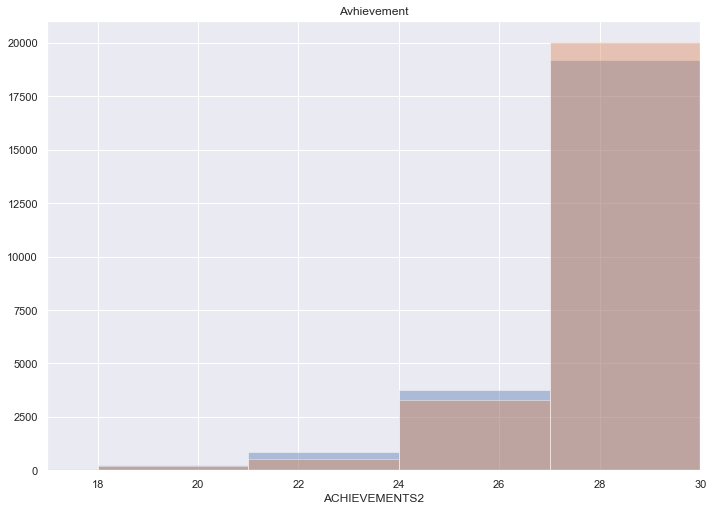

In [156]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df["ACHIEVEMENTS1"], bins=10, kde=0)
sns.distplot(df["ACHIEVEMENTS2"],  bins=10, kde=0)
plt.title("Avhievement")
plt.xlim(17, 30)
plt.show()
# it looks like a copy and Paste game.  . نظرة على حالة ثابتة. سنوات تنسخ بعضها
# change bins from 20 to 50 to even more and lok at the trend which is wierdrly copied

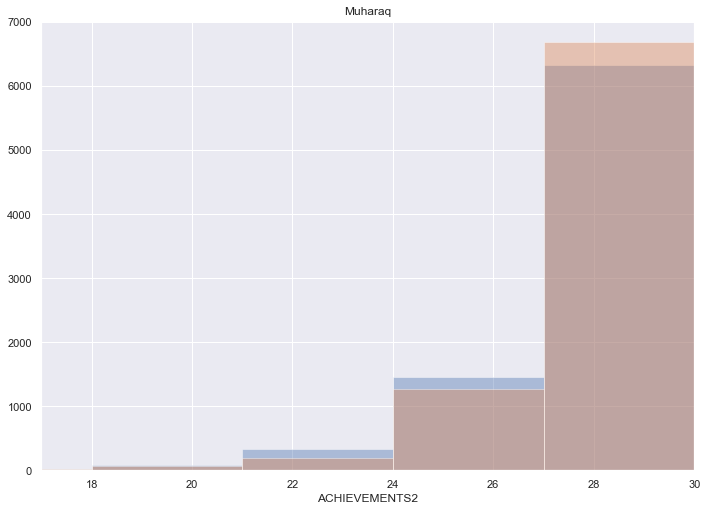

In [157]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df[df.PROV_NM=="North"]["ACHIEVEMENTS1"], bins=10, kde=0)
sns.distplot(df[df.PROV_NM=="North"]["ACHIEVEMENTS2"],  bins=10, kde=0)
plt.title("Muharaq")
plt.xlim(17,30)
plt.show()
# PLot by Province

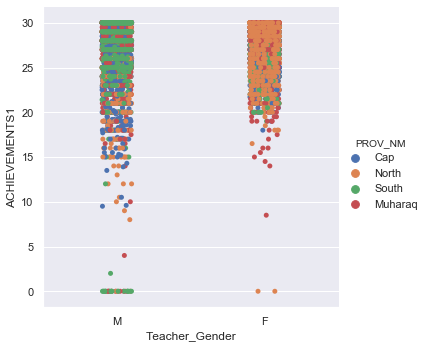

In [158]:
# sns.set(rc={'figure.figsize':(20,12)})  #  to move to   Gender graphs
sns.catplot('Teacher_Gender', 'ACHIEVEMENTS1' , hue="PROV_NM" , data=df)
plt.show()
# it looks like a copy and Paste game. 
# change bins from 20 to 50 to even more and lok at the trend which is wierdrly copied

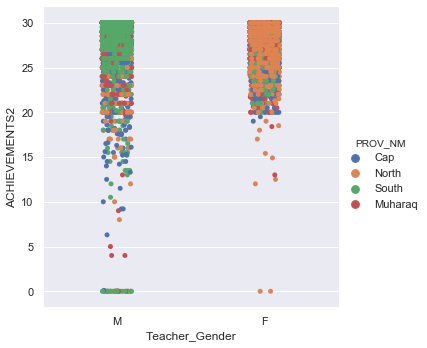

In [159]:

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.catplot('Teacher_Gender', 'ACHIEVEMENTS2' , hue="PROV_NM" , data=df)
plt.show()
# it looks like a copy and Paste game. 
# change bins from 20 to 50 to even more and lok at the trend which is wierdrly copied

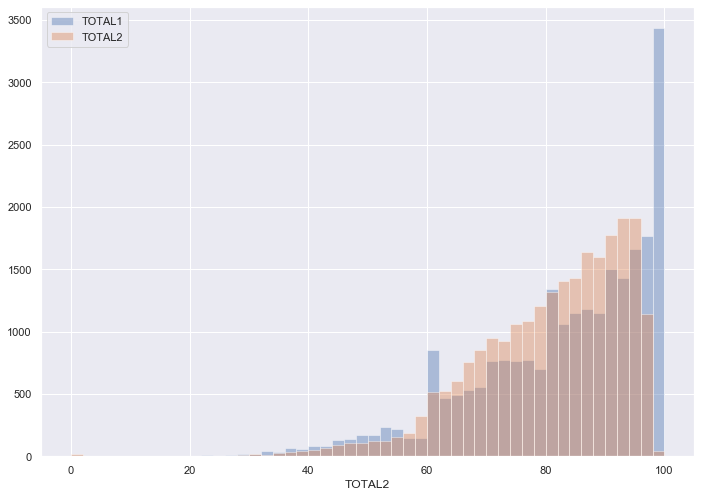

In [160]:
sns.distplot(df["TOTAL1"], kde=False, bins=50, label="TOTAL1")
sns.distplot(df["TOTAL2"], kde=False, bins=50, label="TOTAL2")
plt.legend()
plt.show()

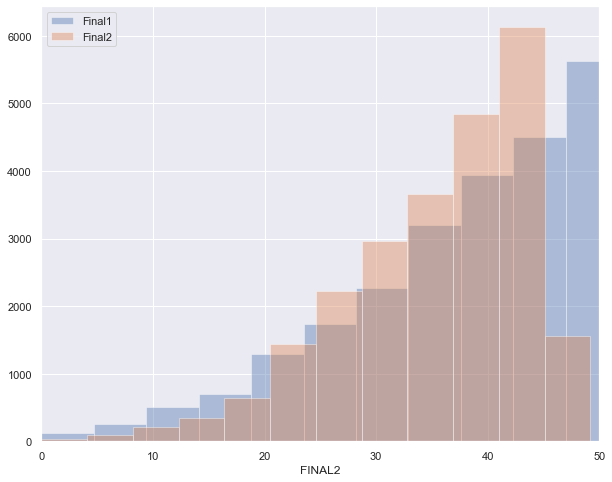

In [161]:
plt.figure(figsize=(10,8))
sns.distplot(df["FINAL1"], kde=False, bins=20, label="Final1")
sns.distplot(df["FINAL2"], kde=False, bins=20, label="Final2")
plt.xlim(0, 50)
plt.legend()
plt.show()

In [162]:
df.keys()

Index(['CPR_NO', 'SCH_NM', 'PROV_NM', 'SUBM', 'Teacher_Gender',
       'ACHIEVEMENTS1', 'ACHIEVEMENTS2', 'MIDTERM1', 'MIDTERM2', 'FINAL1',
       'FINAL2', 'TOTAL1', 'TOTAL2', 'D_MARK', 'NAT_MARK', 'GPA'],
      dtype='object')

<Figure size 720x576 with 0 Axes>

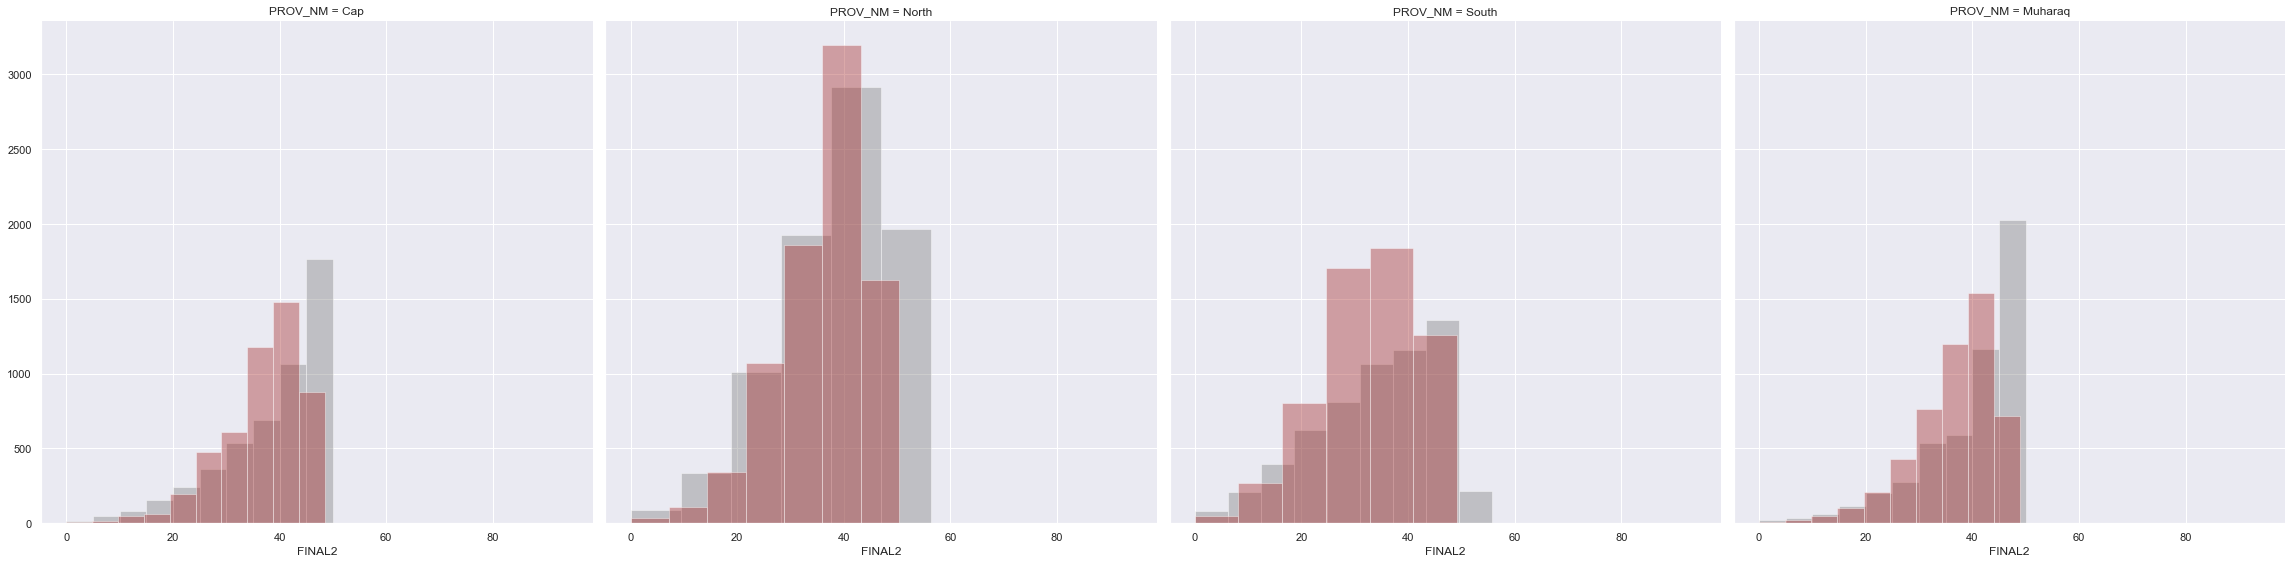

In [163]:
plt.figure(figsize=(10,8))
# sns.distplot(df["MIDTERM1"], bins=20, label="Final1", kde=0)
# sns.distplot(df["MIDTERM2"], bins=20, label="Final2", kde=0)
g=sns.FacetGrid(df, col="PROV_NM", height=8, aspect=1)
g.map(sns.distplot, "FINAL1"  ,bins=10,  kde=0, color="grey")
g.map(sns.distplot, "FINAL2", bins=10, kde=0, color="brown")
plt.show()

In [164]:
df.groupby("PROV_NM").FINAL1.agg(["mean", "std", "median", "max"])


mean     std  median   max
PROV_NM                              
Cap      38.603  10.085    41.0  50.0
Muharaq  39.799   9.740    42.5  50.0
North    38.110  10.086    40.5  94.0
South    34.109  11.603    36.0  62.0

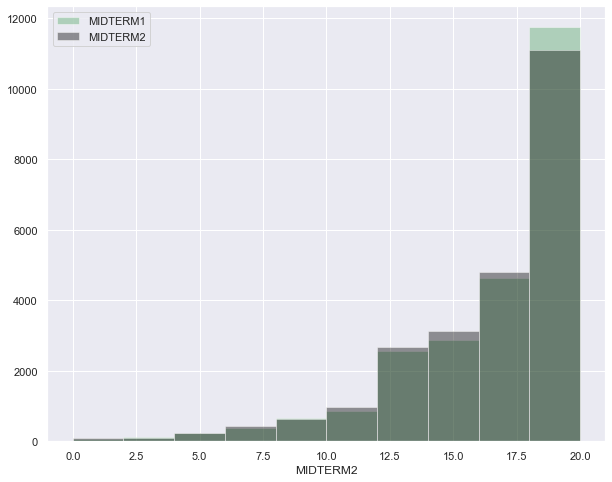

In [165]:
fig, ax=plt.subplots(figsize=(10,8))
ax=sns.distplot(df["MIDTERM1"], kde=False, bins=10 , label="MIDTERM1", ax=ax, color="g")
ax= sns.distplot(df["MIDTERM2"], kde=False, bins=10,  label="MIDTERM2", ax=ax, color="black")
plt.legend()
plt.show()

In [166]:
df.SUBM.count()

24172

In [167]:
df.groupby('SUBM').size()

SUBM
Math       12086
Science    12086
dtype: int64

In [168]:
df.groupby(["SUBM", "Teacher_Gender"]).size()

SUBM     Teacher_Gender
Math     F                 6130
         M                 5956
Science  F                 6130
         M                 5956
dtype: int64

In [169]:
bins = [0, 60, 70, 80, 90, 100]
df[df.SUBM=="Math"].groupby(
pd.cut( 
    df[df.SUBM=="Math"].FINAL1.apply( lambda x: 100*x/50), bins
    )
).size()

FINAL1
(0, 60]      3410
(60, 70]     1510
(70, 80]     1832
(80, 90]     2121
(90, 100]    3187
dtype: int64

In [170]:
df.SUBM.unique()

array(['Science', 'Math'], dtype=object)

In [171]:
bins = [0, 60, 70, 80, 90, 100]
df[df["SUBM"]=="Math"].groupby(pd.cut(df[df.SUBM=="Math"].NAT_MARK, bins)).size().array

<PandasArray>
[9310, 2277, 383, 10, 0]
Length: 5, dtype: int64

In [172]:
bins = [0, 60, 70, 80, 90, 100]

d=df[df.SUBM=="Science"].groupby(
pd.cut( 
    df[df.SUBM=="Science"]["FINAL1"], bins
    )
).size()
pd.DataFrame({"interval":d.index, "FINAL1":d.array, 
    "NAT_Science":df[df.SUBM=="Science"].groupby(pd.cut( 
    df[df.SUBM=="Science"]["NAT_MARK"], bins
    )
).size().array})

interval  FINAL1  NAT_Science
0    (0, 60]   12063         9932
1   (60, 70]       1         1746
2   (70, 80]       0          309
3   (80, 90]       0           23
4  (90, 100]       1            0

In [173]:
bins = [0, 60, 70, 80, 90, 100]

d=df[df.SUBM=="Science"].groupby(
pd.cut( 
    df[df.SUBM=="Science"]["FINAL1"].apply( lambda x: 100*x/50), bins
    )
).size()
pd.DataFrame({"interval":d.index, "FINAL1":d.array, 
    "NAT_Science":df[df.SUBM=="Science"].groupby(pd.cut( 
    df[df.SUBM=="Science"]["NAT_MARK"], bins
    )
).size().array})

interval  FINAL1  NAT_Science
0    (0, 60]    2207         9932
1   (60, 70]    1377         1746
2   (70, 80]    1880          309
3   (80, 90]    2720           23
4  (90, 100]    3878            0

#### R.E.AB

# مقارنة نتائج السنة الدراسية بنتائج الامتحان الوطني  حسب مجموعات 

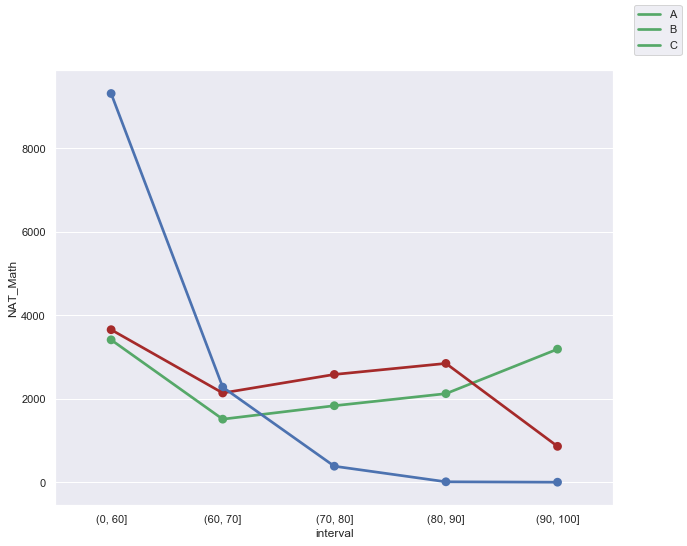

interval  NAT_Math  Final1_M  Final2_M
0    (0, 60]      9310      3410      3653
1   (60, 70]      2277      1510      2137
2   (70, 80]       383      1832      2581
3   (80, 90]        10      2121      2845
4  (90, 100]         0      3187       859

In [182]:
bins = [0, 60, 70, 80, 90, 100]

d=df[df.SUBM=="Math"].groupby(
pd.cut( 
    df[df.SUBM=="Math"]["NAT_MARK"], bins
    )
).size()

d=pd.DataFrame({"interval":d.index, "NAT_Math":d.array, 
    "Final1_M":df[df.SUBM=="Math"].groupby(
        pd.cut(
             df[df.SUBM=="Math"].FINAL1.apply( lambda x: 100*x/50), bins              )
).size().array,
             
             
             "Final2_M":df[df.SUBM=="Math"].groupby(pd.cut( 
    df[df.SUBM=="Math"].FINAL2.apply( lambda x: 100*x/50), bins
    )
).size().array})
fig, ax=plt.subplots(figsize=(10,8))
sns.pointplot("interval", "Final1_M",     data=d ,color="g" , labels="A" )
sns.pointplot("interval", "Final2_M",     data=d ,color="brown"   )
sns.pointplot("interval","NAT_Math" ,data=d  ,color="b" )
fig.legend(labels=["A", "B", "C"])
plt.show()
d.head()

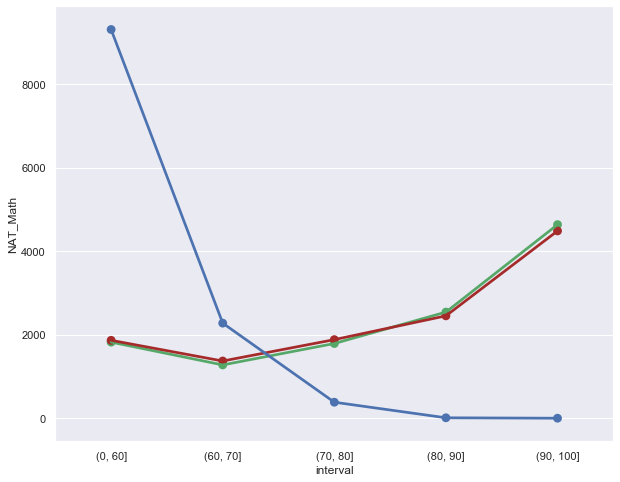

interval  NAT_Math  Final1_M  Final2_M
0    (0, 60]      9310      1822      1866
1   (60, 70]      2277      1276      1370
2   (70, 80]       383      1789      1882
3   (80, 90]        10      2542      2452
4  (90, 100]         0      4637      4486

In [183]:
bins = [0, 60, 70, 80, 90, 100]

d=df[df.SUBM=="Math"].groupby(
pd.cut( 
    df[df.SUBM=="Math"]["NAT_MARK"], bins
    )
).size()

d=pd.DataFrame({"interval":d.index, "NAT_Math":d.array, 
    "Final1_M":df[df.SUBM=="Math"].groupby(
        pd.cut(
             df[df.SUBM=="Math"].MIDTERM1.apply( lambda x: 100*x/20), bins              )
).size().array,
             
             
             "Final2_M":df[df.SUBM=="Math"].groupby(pd.cut( 
    df[df.SUBM=="Math"].MIDTERM2.apply( lambda x: 100*x/20), bins
    )
).size().array})
fig, ax=plt.subplots(figsize=(10,8))


sns.pointplot("interval", "Final1_M",     data=d ,color="g"  )
sns.pointplot("interval", "Final2_M",     data=d ,color="brown"  )
sns.pointplot("interval","NAT_Math" ,data=d  ,color="b" )
plt.show()
d.head()

In [184]:
df.keys()

Index(['CPR_NO', 'SCH_NM', 'PROV_NM', 'SUBM', 'Teacher_Gender',
       'ACHIEVEMENTS1', 'ACHIEVEMENTS2', 'MIDTERM1', 'MIDTERM2', 'FINAL1',
       'FINAL2', 'TOTAL1', 'TOTAL2', 'D_MARK', 'NAT_MARK', 'GPA'],
      dtype='object')

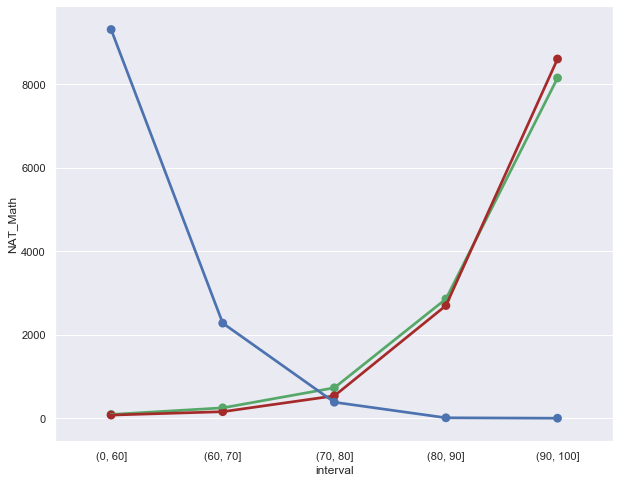

interval  NAT_Math  Achievement1_M  Achievement2_M
0    (0, 60]      9310              90              75
1   (60, 70]      2277             248             156
2   (70, 80]       383             728             535
3   (80, 90]        10            2856            2698
4  (90, 100]         0            8149            8604

In [185]:
bins = [0, 60, 70, 80, 90, 100]

d=df[df.SUBM=="Math"].groupby(
pd.cut( 
    df[df.SUBM=="Math"]["NAT_MARK"], bins
    )
).size()

d=pd.DataFrame({"interval":d.index, "NAT_Math":d.array, 
    "Achievement1_M":df[df.SUBM=="Math"].groupby(
        pd.cut(
             df[df.SUBM=="Math"].ACHIEVEMENTS1.apply( lambda x: 100*x/30), bins              )
).size().array,
             
             
             "Achievement2_M":df[df.SUBM=="Math"].groupby(pd.cut( 
    df[df.SUBM=="Math"].ACHIEVEMENTS2.apply( lambda x: 100*x/30), bins
    )
).size().array})
fig, ax=plt.subplots(figsize=(10,8))


sns.pointplot("interval", "Achievement1_M",     data=d ,color="g"  )
sns.pointplot("interval", "Achievement2_M",     data=d ,color="brown"  )
sns.pointplot("interval","NAT_Math" ,data=d  ,color="b" )
plt.show()
d.head()

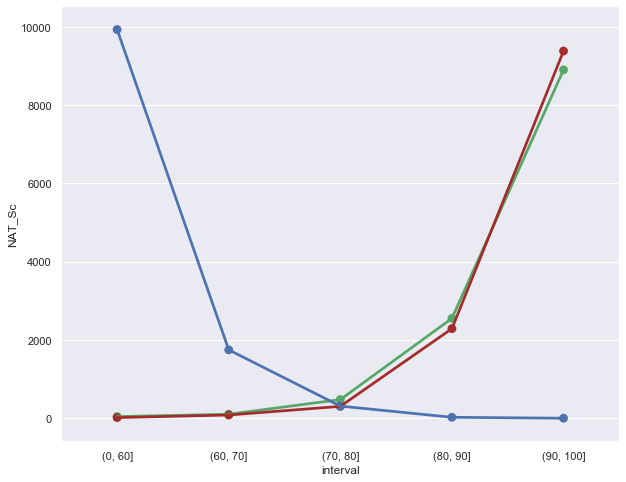

interval  NAT_Sc  Achievement1_Sc  Achievement2_Sc
0    (0, 60]    9932               42               15
1   (60, 70]    1746              101               81
2   (70, 80]     309              476              302
3   (80, 90]      23             2551             2288
4  (90, 100]       0             8901             9383

In [186]:
bins = [0, 60, 70, 80, 90, 100]

d=df[df.SUBM=="Science"].groupby(
pd.cut( 
    df[df.SUBM=="Science"]["NAT_MARK"], bins
    )
).size()

d=pd.DataFrame({"interval":d.index, "NAT_Sc":d.array, 
    "Achievement1_Sc":df[df.SUBM=="Science"].groupby(
        pd.cut(
             df[df.SUBM=="Science"].ACHIEVEMENTS1.apply( lambda x: 100*x/30), bins              )
).size().array,            
             "Achievement2_Sc":df[df.SUBM=="Science"].groupby(pd.cut( 
    df[df.SUBM=="Science"].ACHIEVEMENTS2.apply( lambda x: 100*x/30), bins
    )
).size().array               
               })
fig, ax=plt.subplots(figsize=(10,8))


sns.pointplot("interval", "Achievement1_Sc",     data=d ,color="g"  )
sns.pointplot("interval", "Achievement2_Sc",     data=d ,color="brown"  )
sns.pointplot("interval","NAT_Sc" ,data=d  ,color="b" )

plt.show()
d.head()

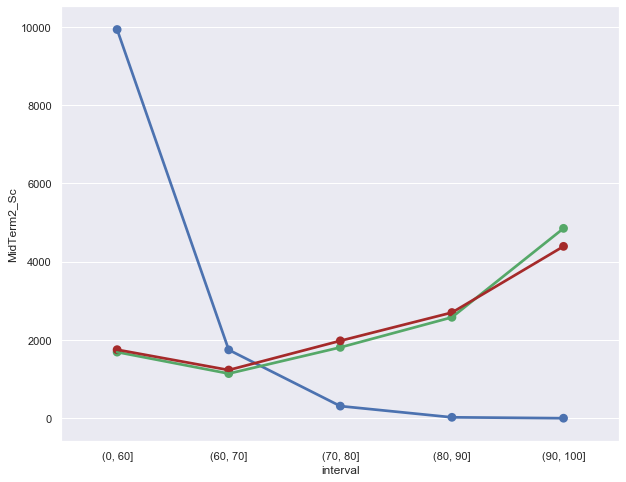

interval  NAT_Math  MidTerm1_Sc  MidTerm2_Sc
0    (0, 60]      9932         1689         1751
1   (60, 70]      1746         1140         1231
2   (70, 80]       309         1810         1978
3   (80, 90]        23         2578         2700
4  (90, 100]         0         4851         4391

In [187]:
bins = [0, 60, 70, 80, 90, 100]

d=df[df.SUBM=="Science"].groupby(
pd.cut( 
    df[df.SUBM=="Science"]["NAT_MARK"], bins
    )
).size()

d=pd.DataFrame({"interval":d.index, "NAT_Math":d.array, 
 "MidTerm1_Sc":df[df.SUBM=="Science"].groupby(
        pd.cut(
             df[df.SUBM=="Science"].MIDTERM1.apply( lambda x: 100*x/20), bins              )
).size().array,  
                
   "MidTerm2_Sc":df[df.SUBM=="Science"].groupby(
        pd.cut(
             df[df.SUBM=="Science"].MIDTERM2.apply( lambda x: 100*x/20), bins              )
).size().array, 
               
               })
fig, ax=plt.subplots(figsize=(10,8))


sns.pointplot("interval","NAT_Math" ,data=d  ,color="b" )
sns.pointplot("interval","MidTerm1_Sc" ,data=d  , color="g"  )
sns.pointplot("interval","MidTerm2_Sc" ,data=d  ,color="brown" )
plt.show()
d.head()

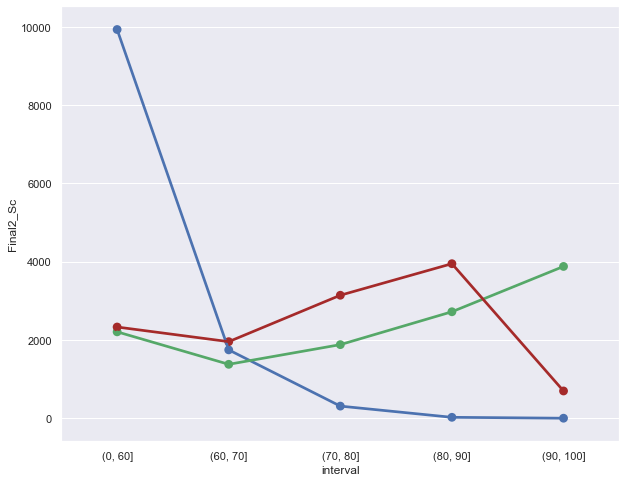

interval  NAT_Math  Final1_Sc  Final2_Sc
0    (0, 60]      9932       2207       2330
1   (60, 70]      1746       1377       1956
2   (70, 80]       309       1880       3142
3   (80, 90]        23       2720       3948
4  (90, 100]         0       3878        696

In [188]:
bins = [0, 60, 70, 80, 90, 100]

d=df[df.SUBM=="Science"].groupby(
pd.cut( 
    df[df.SUBM=="Science"]["NAT_MARK"], bins
    )
).size()

d=pd.DataFrame({"interval":d.index, "NAT_Math":d.array, 
 "Final1_Sc":df[df.SUBM=="Science"].groupby(
        pd.cut(
             df[df.SUBM=="Science"].FINAL1.apply( lambda x: 100*x/50), bins              )
).size().array,  
                
   "Final2_Sc":df[df.SUBM=="Science"].groupby(
        pd.cut(
             df[df.SUBM=="Science"].FINAL2.apply( lambda x: 100*x/50), bins              )
).size().array, 
               
               })
fig, ax=plt.subplots(figsize=(10,8))


sns.pointplot("interval","NAT_Math" ,data=d  ,color="b" )
sns.pointplot("interval","Final1_Sc" ,data=d  , color="g"  )
sns.pointplot("interval","Final2_Sc" ,data=d  ,color="brown" )
plt.show()
d.head()

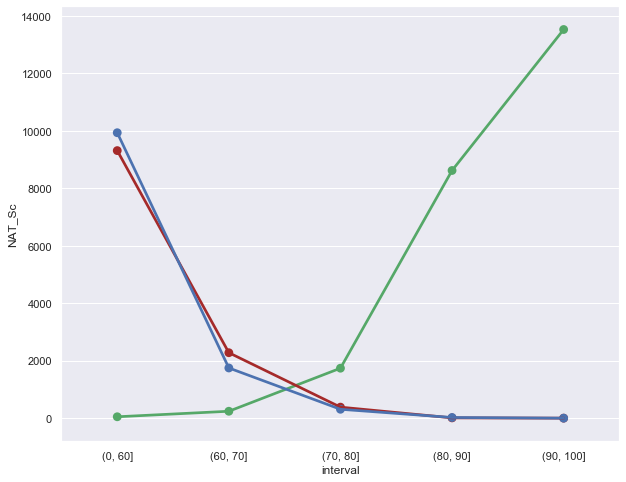

interval    GPA  NAT_Math  NAT_Sc
0    (0, 60]     48      9310    9932
1   (60, 70]    240      2277    1746
2   (70, 80]   1738       383     309
3   (80, 90]   8618        10      23
4  (90, 100]  13524         0       0

In [189]:
bins = [0, 60, 70, 80, 90, 100]

d=df.groupby(
pd.cut( 
    df["GPA"], bins
    )
).size()

d=pd.DataFrame({"interval":d.index, "GPA":d.array, 
    "NAT_Math":df[df.SUBM=="Math"].groupby(
        pd.cut(
             df[df.SUBM=="Math"].NAT_MARK, bins              )
).size().array,
             
             
             "NAT_Sc":df[df.SUBM=="Science"].groupby(pd.cut( 
    df[df.SUBM=="Science"].NAT_MARK, bins
    )
).size().array})
fig, ax=plt.subplots(figsize=(10,8))


sns.pointplot("interval", "GPA",     data=d ,color="g"  )
sns.pointplot("interval", "NAT_Math",     data=d ,color="brown"  )
sns.pointplot("interval","NAT_Sc" ,data=d  ,color="b" )
plt.show()
d.head()

In [190]:
# I have to  compare. grouped    marks for both Mathand Science, both   value should be converted to a %  100.


In [191]:
df.shape

(24172, 16)

In [192]:
bins = [0, 60, 70, 80, 90, np.inf]
names = ['<60', '60-70', '70-80', '80-90', '>90']
d = dict(enumerate(names, 1))
d

{1: '<60', 2: '60-70', 3: '70-80', 4: '80-90', 5: '>90'}

In [193]:
bins = [0, 60, 70, 80, 90, np.inf]
names = ['<60', '60-70', '70-80', '80-90', '>90']
d = dict(enumerate(names, 1))

df['GPA_class'] = np.vectorize(d.get)(np.digitize(df['GPA'], bins))
df['NAT_class'] = np.vectorize(d.get)(np.digitize(df['NAT_MARK'], bins))


# df['GPA_class'] = pd.cut(df['GPA'], bins, labels=names)
# df['NAT_class'] = pd.cut(df['NAT_MARK'], bins, labels=names)

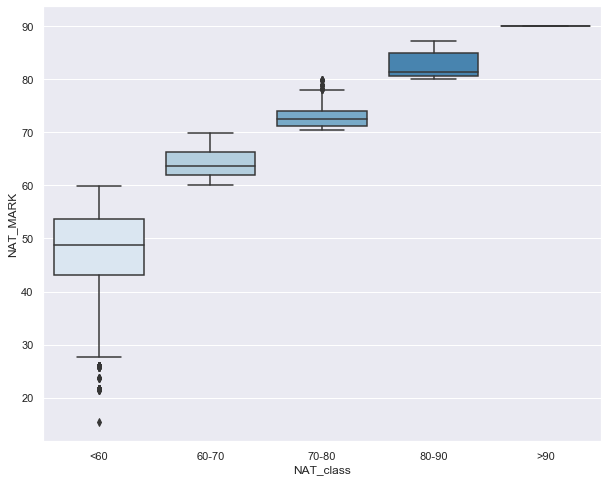

In [194]:
plt.figure(figsize=(10,8))
sns.boxplot(y=df[df.NAT_MARK>0]["NAT_MARK"], x=df[df.NAT_MARK>0].NAT_class, order=["<60", "60-70", "70-80", "80-90", ">90"], palette="Blues")
plt.show()

In [195]:
df[df.NAT_MARK==90]["NAT_MARK"].value_counts()

90.0    2
Name: NAT_MARK, dtype: int64

In [196]:
df[df.NAT_MARK>0].groupby(["PROV_NM"]).size()


PROV_NM
Cap        4934
Muharaq    4992
North      8188
South      5876
dtype: int64

In [197]:
df[df.NAT_MARK>80].groupby(["PROV_NM"]).agg({"PROV_NM":"size"})

PROV_NM
PROV_NM         
Cap            7
Muharaq       13
North         12
South          1

In [198]:
df[df.NAT_MARK>80].groupby(["PROV_NM"]).size()

PROV_NM
Cap         7
Muharaq    13
North      12
South       1
dtype: int64

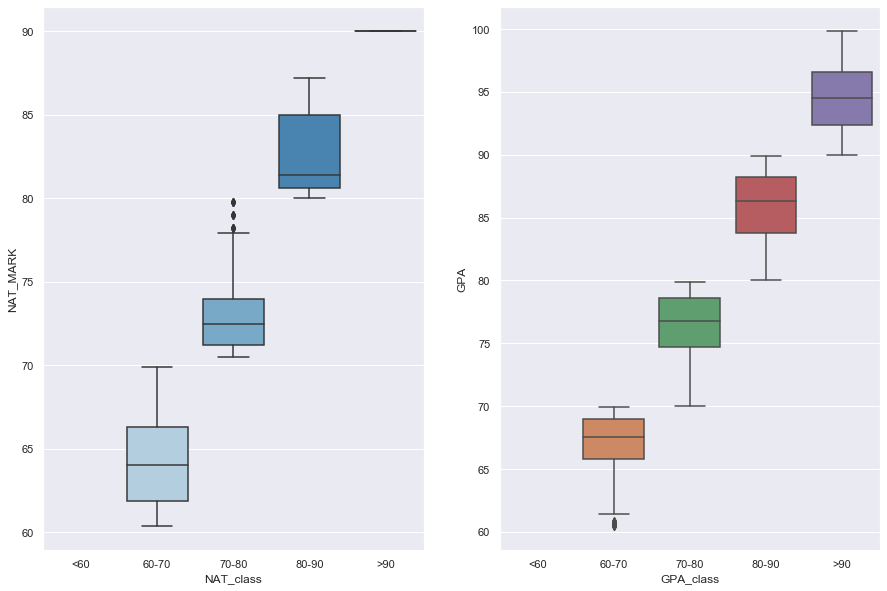

<Figure size 864x576 with 0 Axes>

In [199]:
fig, (ax1, ax2)=plt.subplots(1,2, figsize=(15,10))
plt.figure(figsize=(12,8))
sns.boxplot(y=df[df.NAT_MARK>60]["NAT_MARK"], x=df[df.NAT_MARK>60].NAT_class, order=["<60", "60-70", "70-80", "80-90", ">90"], palette="Blues", ax=ax1)
sns.boxplot(y=df[df.GPA>60]["GPA"], x=df[df.GPA>60].GPA_class, order=["<60", "60-70", "70-80", "80-90", ">90"], ax=ax2)
plt.show()

In [200]:
df[df.NAT_MARK>0].groupby("NAT_class").NAT_MARK.agg(["median" ])
#b= df[df.NAT_MARK>0].groupby("NAT_class").NAT_MARK.agg(["median"])

pd.concat( [ df[df.NAT_MARK>0].groupby("NAT_class").NAT_MARK.agg(["median", "count" ]), 
         df[df.NAT_MARK>0].groupby("GPA_class").GPA.agg(["median", "count"])], axis=1)

median  count  median  count
60-70    63.6   4148  67.600    209
70-80    72.5    682  76.818   1689
80-90    81.4     41  86.333   8454
<60      48.8  19117  57.600     14
>90      90.0      2  94.500  13624

In [211]:
df[(df.NAT_MARK>0) & (df.SUBM=="Math")].groupby(["NAT_class", "GPA_class"]).NAT_MARK.agg(["median", "count" ])

median  count
NAT_class GPA_class               
60-70     80-90        61.6     48
          >90          63.6   2354
70-80     >90          72.5    373
80-90     >90          80.0     18
<60       60-70        32.7    101
          70-80        37.9    838
          80-90        45.8   4173
          <60          30.9      7
          >90          53.9   4066
>90       >90          90.0      2

In [212]:
df[(df.NAT_MARK>0) & (df.SUBM=="Science")].groupby(["NAT_class", "GPA_class"]).NAT_MARK.agg(["median", "count" ])

median  count
NAT_class GPA_class               
60-70     70-80       64.45      2
          80-90       61.90     42
          >90         64.10   1702
70-80     70-80       71.40      1
          80-90       72.10      3
...                     ...    ...
<60       60-70       36.50    108
          70-80       39.45    848
          80-90       45.20   4188
          <60         35.20      7
          >90         52.10   4781

[12 rows x 2 columns]

In [213]:
#À vérifier   l'ordre des index
#sns.pointplot( df.NAT_class.unique(), df.groupby("NAT_class").size(), color="green")
#sns.pointplot( df.GPA_class.unique(), df.groupby("GPA_class").size(), color="blue")
plt.show()

In [214]:


pd.concat( [ df.groupby("NAT_class").size(), df.groupby("GPA_class").size()], axis=1)


0      1
60-70   4148    238
70-80    682   1712
80-90     41   8508
<60    19299     52
>90        2  13662

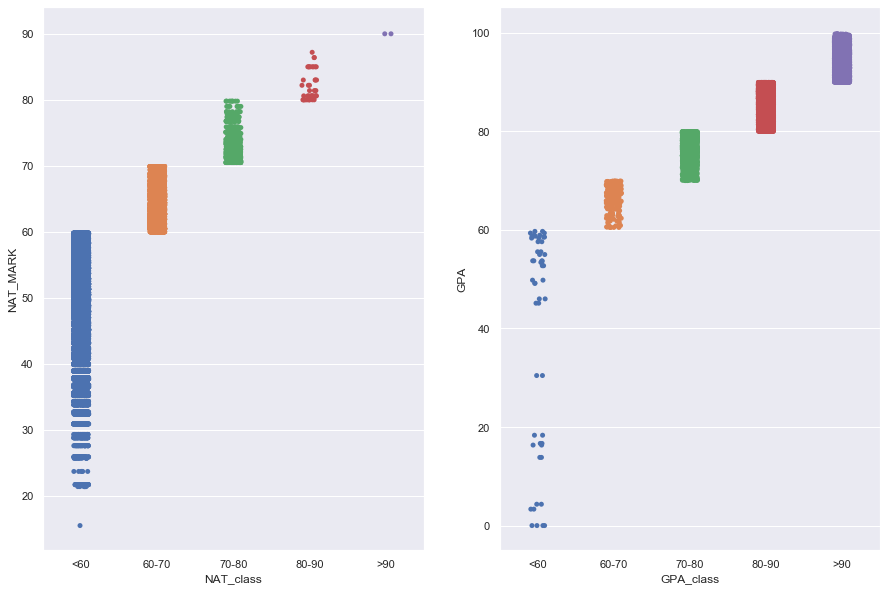

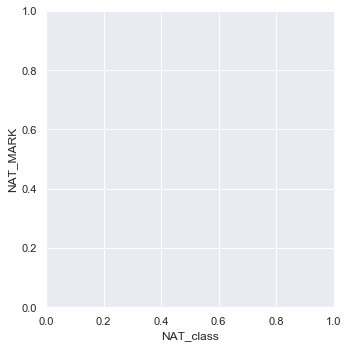

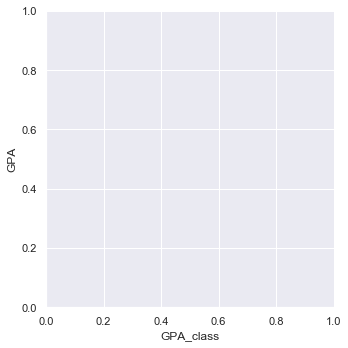

In [215]:
fig, (ax1, ax2)=plt.subplots(1,2, figsize=(15,10))
sns.catplot( x="NAT_class", y="NAT_MARK",data=df[df.NAT_MARK>0],order=["<60", "60-70", "70-80", "80-90", ">90"],  ax=ax1)
sns.catplot( x="GPA_class", y="GPA" ,data=df,order=["<60", "60-70", "70-80", "80-90", ">90"],  ax=ax2)
plt.show()

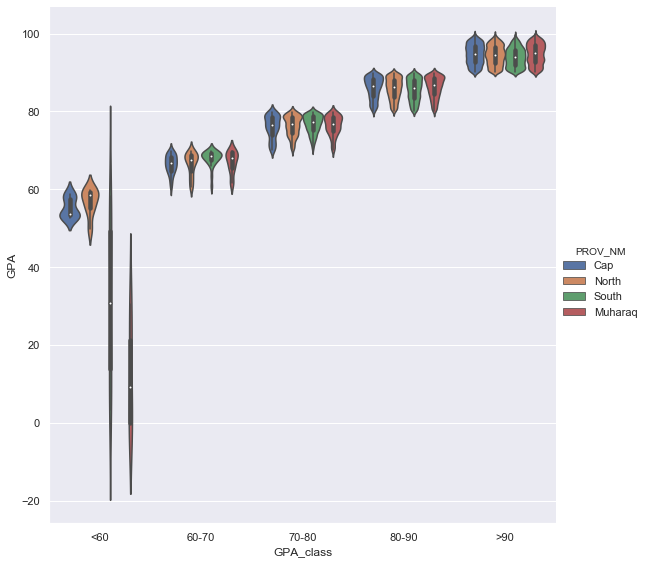

In [224]:
sns.catplot(x="GPA_class", y="GPA" ,data=df, hue="PROV_NM", kind="violin", height=8, aspcet=1, 
           order=["<60", "60-70", "70-80", "80-90", ">90"])
plt.show()

In [80]:
df[df.GPA<60].groupby("PROV_NM").GPA.agg(["mean","median"]).round(2)

mean  median
PROV_NM               
Cap      55.23   53.70
Muharaq  12.19    9.17
North    56.70   58.55
South    30.69   30.90

In [81]:
df[df.GPA<60].groupby("PROV_NM").NAT_MARK.agg(["mean","median"]).round(2)

mean  median
PROV_NM               
Cap      20.13    28.4
Muharaq   0.00     0.0
North    15.49     0.0
South     4.87     0.0

- Note the median positions among all violin polts above. ( median North  twice  Muharaq median)

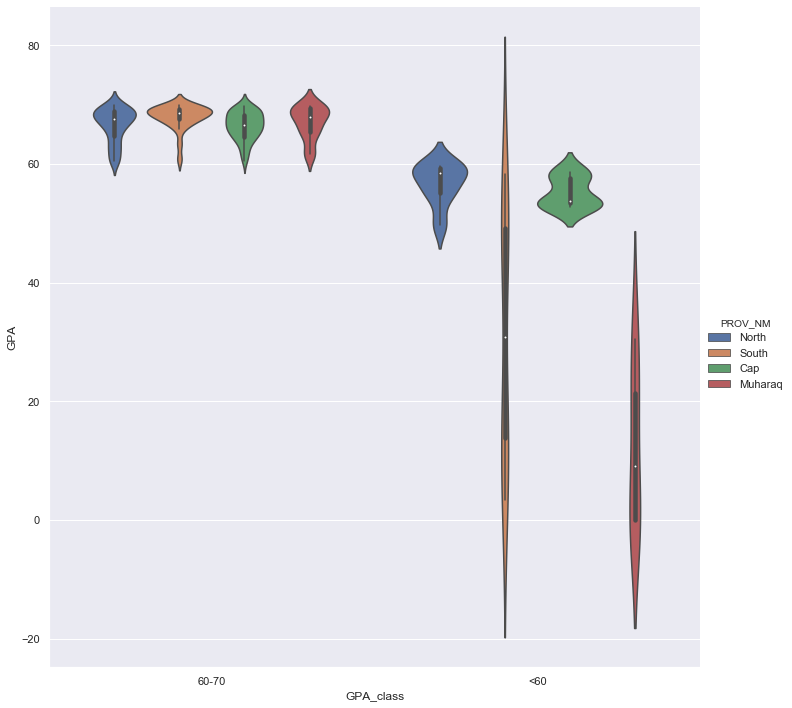

In [82]:
sns.catplot(x="GPA_class", y="GPA" ,data=df[df.GPA<70], hue="PROV_NM", kind="violin", height=10, aspcet=.9)
plt.show()

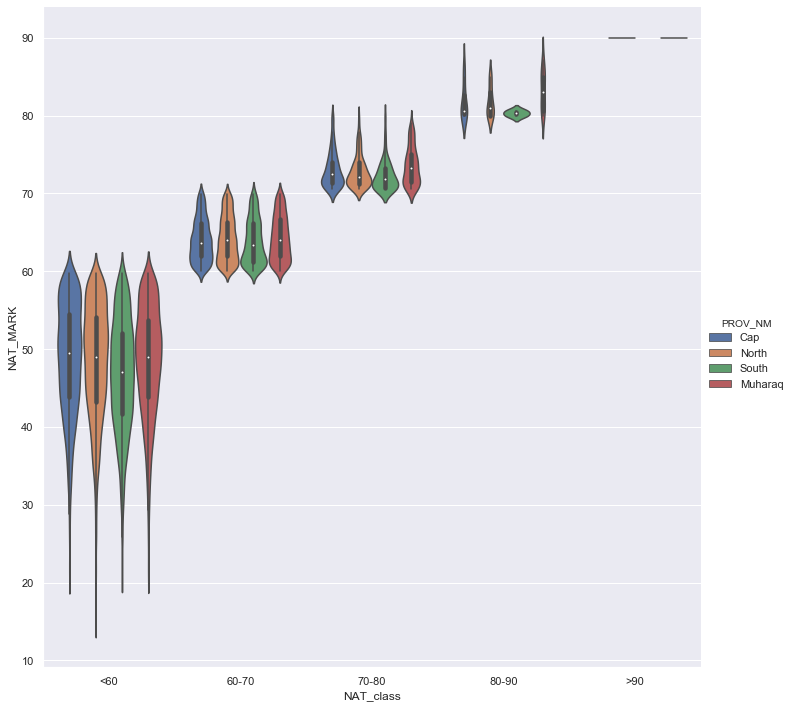

In [226]:
sns.catplot(x="NAT_class", y="NAT_MARK" ,data=df[df.NAT_MARK>0], hue="PROV_NM", kind="violin", height=10, aspcet=.7
           
          , order=["<60", "60-70", "70-80", "80-90", ">90"])
plt.show()

In [84]:
s = pd.Series([1,2,3, np.nan, 5])
s

0    1.0
1    2.0
2    3.0
3    NaN
4    5.0
dtype: float64

In [85]:

s.value_counts(), s.value_counts(dropna = False)

(5.0    1
 3.0    1
 2.0    1
 1.0    1
 dtype: int64, 5.0    1
 NaN    1
 3.0    1
 2.0    1
 1.0    1
 dtype: int64)

In [86]:
df['ACHIEVEMENTS1'].value_counts(dropna=False)

30.0    7491
29.0    3602
28.0    2910
27.0    2163
29.5    1542
        ... 
21.7       1
22.1       1
23.9       1
13.0       1
19.8       1
Name: ACHIEVEMENTS1, Length: 128, dtype: int64

In [227]:
df['ACHIEVEMENTS1'].value_counts(dropna=False, bins=5)

(24.0, 30.0]     22457
(18.0, 24.0]      1553
(12.0, 18.0]       117
(-0.031, 6.0]       32
(6.0, 12.0]         13
Name: ACHIEVEMENTS1, dtype: int64

In [88]:
df.FINAL1.value_counts(dropna=False).head()

50.0    1652
49.0    1077
48.0     934
40.0     885
47.0     863
Name: FINAL1, dtype: int64

In [228]:
df.isnull().sum()

CPR_NO            0
SCH_NM            0
PROV_NM           0
SUBM              0
Teacher_Gender    0
                 ..
D_MARK            0
NAT_MARK          0
GPA               0
GPA_class         0
NAT_class         0
Length: 18, dtype: int64

In [230]:
df.ACHIEVEMENTS1.value_counts(normalize=True)

30.0    3.099e-01
29.0    1.490e-01
28.0    1.204e-01
27.0    8.948e-02
29.5    6.379e-02
          ...    
21.7    4.137e-05
22.1    4.137e-05
23.9    4.137e-05
13.0    4.137e-05
19.8    4.137e-05
Name: ACHIEVEMENTS1, Length: 128, dtype: float64

In [231]:
# dataframe containing only the object columns.
obj_df = df.select_dtypes(include=['object'])  #.copy()
obj_df.head()

SCH_NM PROV_NM     SUBM Teacher_Gender GPA_class NAT_class
0  المعهد الديني الجعفري     Cap  Science              M       >90       <60
1  المعهد الديني الجعفري     Cap  Science              M     80-90       <60
2  المعهد الديني الجعفري     Cap  Science              M     80-90       <60
3  المعهد الديني الجعفري     Cap  Science              M     80-90       <60
4  المعهد الديني الجعفري     Cap  Science              M     80-90       <60

In [92]:
#clean up  NULL value
df[df.isnull().any(axis=1)]

Empty DataFrame
Columns: [CPR_NO, SCH_NM, PROV_NM, SUBM, Teacher_Gender, ACHIEVEMENTS1, ACHIEVEMENTS2, MIDTERM1, MIDTERM2, FINAL1, FINAL2, TOTAL1, TOTAL2, D_MARK, NAT_MARK, GPA, GPA_class, NAT_class]
Index: []

In [93]:
np.count_nonzero(obj_df.isnull())

0

In [64]:
obj_df.apply(lambda x: sum(x.isnull().values), axis = 1) # For rows

0        0
1        0
2        0
3        0
4        0
        ..
24185    0
24186    0
24187    0
24188    0
24189    0
Length: 24190, dtype: int64

In [416]:
#clean up  NULL value
obj_df[obj_df.isnull().any(axis=1)]

Empty DataFrame
Columns: [SCH_NM, PROV_NM, SUBM, Teacher_Gender, GPA_class, NAT_class]
Index: []

In [232]:
obj_df["SCH_NM"].value_counts()

مدرسة الامام الطبرى الابتدائية للبنين            864
مدرسة ابن سينا الابتدائية للبنين                 826
مدرسة مالك بن انس الابتدائية للبنين              804
مدرسة البسيتين الابتدائية للبنين                 626
مدرسة أحمد الفاتح الابتدائية الاعدادية للبنين    522
                                                ... 
مدرسة جو الابتدائية الاعدادية للبنات              66
مدرسة الجسرة الابتدائية للبنين                    66
مدرسة عين جالوت الابتدائية للبنات                 52
مدرسة سكينة بنت الحسين الابتدائية للبنات          36
مدرسة عائشة ام المؤمنين الاعدادية للبنات          34
Name: SCH_NM, Length: 99, dtype: int64

In [233]:
df.to_csv("data/GD_infer.csv")

In [94]:
# obj_df = obj_df.fillna({"num_doors": "four"})
# En cas où on veut replacer une valeur par une autre

[Model](#Build  Train   deploy )

#   Preprocessing 

In [304]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import make_column_transformer, ColumnTransformer, TransformedTargetRegressor,make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, StratifiedKFold, train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from xgboost import XGBClassifier

In [305]:
import pandas as pd
import numpy as np

df_infer=pd.read_csv("data/GD_infer.csv")

In [306]:
df_infer.sort_values("CPR_NO").head()

Unnamed: 0    CPR_NO                                  SCH_NM  PROV_NM  \
14944       14954  20516916        مدرسة البسيتين الابتدائية للبنين  Muharaq   
2858         2859  20516916        مدرسة البسيتين الابتدائية للبنين  Muharaq   
12670       12679  20709315  مدرسة ابو بكر الصديق الابتدائية للبنين      Cap   
584           584  20709315  مدرسة ابو بكر الصديق الابتدائية للبنين      Cap   
23918       23936  20819269  مدرسة مريم بنت عمران الابتدائية للبنات  Muharaq   

          SUBM Teacher_Gender  ACHIEVEMENTS1  ACHIEVEMENTS2  MIDTERM1  \
14944     Math              M           30.0           30.0      20.0   
2858   Science              M           30.0           30.0      20.0   
12670     Math              M           24.0           23.0      16.0   
584    Science              M           24.0           26.0      14.0   
23918     Math              F           30.0           30.0      20.0   

       MIDTERM2  FINAL1  FINAL2  TOTAL1  TOTAL2  D_MARK  NAT_MARK     GPA  \
14944      20.0    40.0    39.0    90.0      89      90      52.9  93.250   
2858       19.0    41.0    40.0    91.0      89      90      46.1  93.250   
12670      12.0    40.0    31.5    80.0      67      74      39.9  76.273   
584         9.0    23.5    12.5    62.0      48      55      44.2  76.273   
23918      19.5    41.5    41.5    92.0      91      92      58.9  95.417   

      GPA_class NAT_class  
14944       >90       <60  
2858        >90       <60  
12670     70-80       <60  
584       70-80       <60  
23918       >90       <60

In [307]:
# df_infer.nlargest(5, "GPA")

In [308]:
df_infer.set_index('CPR_NO', inplace=True)
# df_infer.index=df.CPR_NO
# df_infer=df_infer.drop(["Unnamed: 0" ], axis=1)

In [309]:
df_infer.SCH_NM.nunique()

99

In [310]:
df_infer.drop(['NAT_MARK','GPA','TOTAL1','ACHIEVEMENTS2','MIDTERM2', 'FINAL2', 'TOTAL2', 'D_MARK', 'Unnamed: 0'], axis=1, inplace=True)
# y=df_infer['NAT_class']

In [311]:
df_infer.head()

SCH_NM PROV_NM     SUBM Teacher_Gender  \
CPR_NO                                                            
70913390  المعهد الديني الجعفري     Cap  Science              M   
71105956  المعهد الديني الجعفري     Cap  Science              M   
70712190  المعهد الديني الجعفري     Cap  Science              M   
70207496  المعهد الديني الجعفري     Cap  Science              M   
70507953  المعهد الديني الجعفري     Cap  Science              M   

          ACHIEVEMENTS1  MIDTERM1  FINAL1 GPA_class NAT_class  
CPR_NO                                                         
70913390           28.0      17.0    45.0       >90       <60  
71105956           27.0      14.0    41.5     80-90       <60  
70712190           27.0      13.0    27.5     80-90       <60  
70207496           26.0      15.0    44.0     80-90       <60  
70507953           25.0      14.0    31.5     80-90       <60

In [312]:
df_infer.keys()

Index(['SCH_NM', 'PROV_NM', 'SUBM', 'Teacher_Gender', 'ACHIEVEMENTS1',
       'MIDTERM1', 'FINAL1', 'GPA_class', 'NAT_class'],
      dtype='object')

In [313]:
label_encoder = LabelEncoder()

for i in ['SCH_NM','SUBM','Teacher_Gender','GPA_class','NAT_class' ]:

    df_infer[i] = label_encoder.fit_transform(df_infer[i])

In [314]:
df_infer.head()

SCH_NM PROV_NM  SUBM  Teacher_Gender  ACHIEVEMENTS1  MIDTERM1  \
CPR_NO                                                                    
70913390       0     Cap     1               1           28.0      17.0   
71105956       0     Cap     1               1           27.0      14.0   
70712190       0     Cap     1               1           27.0      13.0   
70207496       0     Cap     1               1           26.0      15.0   
70507953       0     Cap     1               1           25.0      14.0   

          FINAL1  GPA_class  NAT_class  
CPR_NO                                  
70913390    45.0          4          3  
71105956    41.5          2          3  
70712190    27.5          2          3  
70207496    44.0          2          3  
70507953    31.5          2          3

In [315]:
y=df_infer["NAT_class"]
X= df_infer.drop(['GPA_class', 'NAT_class'], axis=1)

In [316]:
column_trans=make_column_transformer(
(OneHotEncoder(), ['PROV_NM', 'SCH_NM']),
(StandardScaler(), ['ACHIEVEMENTS1', 'MIDTERM1', 'FINAL1',]),
    remainder="passthrough"
    
)


In [317]:
pipe=make_pipeline( column_trans, 
                  
                  XGBClassifier( objective="multi:softmax", seed=42, silent=True, 
                               nthread=-1))


In [318]:
from scipy import stats as st

# A parameter grid for XGBoost


params_2 = {
    'xgbclassifier__n_estimators' :st.randint(100, 1000),
    'xgbclassifier__learning_rate' : st.uniform(0.01, 0.6), 
    'xgbclassifier__colsample_bytree': st.uniform(0.01, 0.9), 
    'xgbclassifier__max_depth': np.arange(3,8),
    'xgbclassifier__min_child_weight':[1,2,3,4],
    'xgbclassifier__max_depth':np.arange(3,8)
        }

In [ ]:
label_encoder.classes_
label_encoder.transform(["<60", ">90"])

In [319]:

X_train,X_test,y_train, y_test=train_test_split(X,y , test_size=0.3,random_state=42,stratify = y, shuffle=True)
X_valid,X_test,y_valid, y_test=train_test_split(X_test,y_test , test_size=0.5,random_state=123)

In [ ]:
skf = StratifiedKFold(n_splits=10 ,shuffle = True, random_state = 42)

random_search = RandomizedSearchCV(pipe, param_distributions=params_2, scoring='f1_macro', n_jobs=-1, 
                                   cv=skf.split(X_train,y_train), verbose=3, random_state=42 )

# Here we go
#start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train, y_train)
#timer(start_time) # timing ends here for "start_time" variable

In [98]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (3, 5))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results-01.csv', index=False)


 All results:
{'mean_fit_time': array([ 66.73517451,  19.16653743,  34.46210485,  45.7373157 ,
       117.26263185,  44.62044501,  90.86805902, 117.36102419,
        35.04316869,  81.41508989]), 'std_fit_time': array([ 0.68160668,  0.50288881,  0.28882326,  1.77212914,  1.33093872,
        0.37960308,  2.04159947,  0.73654338,  0.55964347, 14.29136464]), 'mean_score_time': array([2.75889874, 0.41133785, 0.9259675 , 0.78269458, 4.06156421,
       1.1010736 , 1.82006736, 3.13639383, 1.25738282, 1.99775386]), 'std_score_time': array([0.54717182, 0.01426166, 0.05540373, 0.19958503, 0.14758022,
       0.03995984, 0.25634825, 0.50262032, 0.12566468, 0.59235118]), 'param_xgbclassifier__colsample_bytree': masked_array(data=[0.34708610696262626, 0.5471651421518383,
                   0.31033775002511965, 0.8829188669457949,
                   0.5657333586649449, 0.27210622617823776,
                   0.8863799669573132, 0.8949077972261094,
                   0.1634717113185624, 0.516959396060

In [104]:
random_search.best_params_

{'xgbclassifier__colsample_bytree': 0.31033775002511965,
 'xgbclassifier__learning_rate': 0.09572009075316446,
 'xgbclassifier__max_depth': 5,
 'xgbclassifier__min_child_weight': 2,
 'xgbclassifier__n_estimators': 408}

In [115]:
pipe=make_pipeline( column_trans, 
XGBClassifier(colsample_bytree=0.31033775002511965,
 learning_rate= 0.09572009075316446,
 max_depth= 5,
 min_child_weight= 2,
 n_estimators= 408))

In [130]:
pipe.fit(X_train,y_train)  

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=True),
                                                  ['PROV_NM', 'SCH_NM']),
                                                 ('standardscaler',
                                                  StandardScaler(copy=Tru...
                               colsample_byl

In [129]:
pipe.score(X_test, y_test)

0.8389409817981247

In [120]:
pd.crosstab(y_test, pipe.predict(X_test))

col_0       0    1     2  3     4
GPA_class                        
0          14   22     1  2     0
1           2  131   124  0     0
2           2   27  1011  0   200
3           3    1     0  7     0
4           0    0   200  0  1879

In [263]:
cross_val_score( pipe, X, y,cv=5,  scoring="recall_macro").mean()

0.6074045179516704

In [262]:
X_new=X.sample(5, random_state=42)
pipe.fit(X, y )

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=True),
                                                  ['PROV_NM', 'SCH_NM']),
                                                 ('standardscaler',
                                                  StandardScaler(copy=Tru...
                 XGBClassifier(base_score=0.

In [242]:
pipe.predict(X_new)

array([4, 2, 4, 2, 2])

In [209]:
X.SCH_NM.unique()

array([ 0,  3,  4,  5,  1,  6,  2,  8,  9,  7, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98])

In [181]:
X.head()

SCH_NM PROV_NM  SUBM  Teacher_Gender  ACHIEVEMENTS1  ACHIEVEMENTS2  \
CPR_NO                                                                         
70913390       0     Cap     1               1           28.0           30.0   
71105956       0     Cap     1               1           27.0           29.0   
70712190       0     Cap     1               1           27.0           27.0   
70207496       0     Cap     1               1           26.0           24.5   
70507953       0     Cap     1               1           25.0           28.0   

          MIDTERM1  MIDTERM2  FINAL1  TOTAL1  GPA_class  NAT_class  
CPR_NO                                                              
70913390      17.0      17.0    45.0    90.0          4          3  
71105956      14.0      16.0    41.5    83.0          2          3  
70712190      13.0      15.0    27.5    68.0          2          3  
70207496      15.0      12.0    44.0    85.0          2          3  
70507953      14.0      15.0    31.5    71.0          2          3

In [130]:
X.head()

SCH_NM PROV_NM     SUBM Teacher_Gender  \
CPR_NO                                                            
70913390  المعهد الديني الجعفري     Cap  Science              M   
71105956  المعهد الديني الجعفري     Cap  Science              M   
70712190  المعهد الديني الجعفري     Cap  Science              M   
70207496  المعهد الديني الجعفري     Cap  Science              M   
70507953  المعهد الديني الجعفري     Cap  Science              M   

          ACHIEVEMENTS1  ACHIEVEMENTS2  MIDTERM1  MIDTERM2  FINAL1  TOTAL1  \
CPR_NO                                                                       
70913390           28.0           30.0      17.0      17.0    45.0    90.0   
71105956           27.0           29.0      14.0      16.0    41.5    83.0   
70712190           27.0           27.0      13.0      15.0    27.5    68.0   
70207496           26.0           24.5      15.0      12.0    44.0    85.0   
70507953           25.0           28.0      14.0      15.0    31.5    71.0   

         GPA_class NAT_class  
CPR_NO                        
70913390       >90       <60  
71105956     80-90       <60  
70712190     80-90       <60  
70207496     80-90       <60  
70507953     80-90       <60

In [131]:
LabelEncoder().fit(X.NAT_class).classes_

array(['60-70', '70-80', '80-90', '<60', '>90'], dtype=object)

In [199]:
prepross=make_column_transformer(  
     (StandardScaler(), ['ACHIEVEMENTS1','ACHIEVEMENTS2', 'MIDTERM1', 'MIDTERM2', 'FINAL1', 'TOTAL1']),
     (OneHotEncoder(),  ['SCH_NM', 'PROV_NM', 'SUBM']), remainder="passthrough"
)

In [472]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test=train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [474]:
categorical_feature_columns=X.select_dtypes(exclude=[np.number]).columns
numerical_features_columns=df_infer.select_dtypes(include=[np.number]).columns

In [475]:
categorical_feature_columns

Index(['SCH_NM', 'PROV_NM', 'SUBM', 'Teacher_Gender', 'GPA_class',
       'NAT_class'],
      dtype='object')

In [476]:
numerical_features_columns

Index(['ACHIEVEMENTS1', 'ACHIEVEMENTS2', 'MIDTERM1', 'MIDTERM2', 'FINAL1',
       'FINAL2', 'TOTAL1', 'TOTAL2', 'D_MARK', 'NAT_MARK', 'GPA'],
      dtype='object')

In [477]:
numerical_features_columns=['ACHIEVEMENTS1', 'ACHIEVEMENTS2', 'MIDTERM1', 'MIDTERM2', 'FINAL1',
       'FINAL2', 'TOTAL1', 'TOTAL2', 'D_MARK']

In [122]:

data_column_category=df.select_dtypes(exclude=[np.number]).columns

label_encoder = LabelEncoder()

for i in data_column_category:
    df_copy[i] = label_encoder.fit_transform(df_copy[i])

print("Label Encoded Data: ")

print(data_column_category)

Label Encoded Data: 
Index([], dtype='object')


In [123]:
df_copy.head()

CPR_NO  SCH_NM  PROV_NM  SUBM  Teacher_Gender  ACHIEVEMENTS1  \
0  70913390       0        0     1               1           28.0   
1  71105956       0        0     1               1           27.0   
2  70712190       0        0     1               1           27.0   
3  70207496       0        0     1               1           26.0   
4  70507953       0        0     1               1           25.0   

   ACHIEVEMENTS2  MIDTERM1  MIDTERM2  FINAL1  FINAL2  TOTAL1  TOTAL2  D_MARK  \
0           30.0      17.0      17.0    45.0    33.0    90.0      80      85   
1           29.0      14.0      16.0    41.5    37.0    83.0      82      83   
2           27.0      13.0      15.0    27.5    37.0    68.0      79      74   
3           24.5      15.0      12.0    44.0    32.5    85.0      69      77   
4           28.0      14.0      15.0    31.5    37.0    71.0      80      76   

   NAT_MARK   GPA  GPA_class  NAT_class  
0      53.7  92.9          4          3  
1      49.7  89.5          2          3  
2      52.1  86.2          2          3  
3      52.9  89.9          2          3  
4      52.1  86.2          2          3

In [124]:
# from collections import defaultdict
# d = defaultdict(preprocessing.LabelEncoder)

In [125]:
#df_Encoded = df[df.columns.difference(['B', 'D'])]

In [126]:

# # Encoding the variable
# obj_df =obj_df.apply(lambda x: d[x.name].fit_transform(x))

In [128]:
# df=df.drop(['SCH_NM','PROV_NM','SUBM', 'Teacher_Gender'], axis=1)

In [129]:
# df=pd.concat([df, obj_df], axis=1)

In [130]:
df_copy.index=df.CPR_NO

In [131]:
df_copy=df_copy.drop("CPR_NO", axis=1)

- eta: It is also known as the learning rate or the shrinkage factor. It actually shrinks the feature weights to make the boosting process more conservative. The range is 0 to 1. Low eta value means the model is more robust to overfitting.

- gamma: The range is 0 to ∞. Larger the gamma more conservative the algorithm is.
- max_depth: We can specify maximum depth of a tree using this parameter.
- subsample: It is the proportion of rows that the model will randomly select to grow trees.
- colsample_bytree: It is the ratio of variables randomly chosen to build each tree in the model.

# Skewness

*skewness = 0 : normally distributed.

*skewness > 0 : more weight in the left tail of the distribution.

*skewness < 0 : more weight in the right tail of the distribution

In [107]:
df_copy.iloc[6:16].skew()

SCH_NM            0.000000
PROV_NM           0.000000
SUBM              0.000000
Teacher_Gender    0.000000
ACHIEVEMENTS1     0.218046
                    ...   
D_MARK           -0.558691
NAT_MARK         -0.171779
GPA              -1.128624
GPA_class        -1.778781
NAT_class        -1.183152
Length: 17, dtype: float64

Let us take a very common example of house prices. Suppose we have house values ranging from $100k to $1,000,000 with the average being $\$500,000$ .
If the peak of the distribution was left of the average value, portraying a positive skewness in the distribution. It would mean that many houses were being sold for less than the average value, i.e. $500k. This could be for many reasons, but we are not going to interpret those reasons here.
If the peak of the distributed data was right of the average value, that would mean a negative skew. This would mean that the houses were being sold for more than the average value.



# XGBoost  4. GPA

In [356]:
df.columns

Index(['CPR_NO', 'SCH_NM', 'PROV_NM', 'SUBM', 'Teacher_Gender',
       'ACHIEVEMENTS1', 'ACHIEVEMENTS2', 'MIDTERM1', 'MIDTERM2', 'FINAL1',
       'FINAL2', 'TOTAL1', 'TOTAL2', 'D_MARK', 'NAT_MARK', 'GPA'],
      dtype='object')

In [109]:
df.iloc[0:2, 1:3]

SCH_NM  PROV_NM
CPR_NO                   
70913390       0        0
71105956       0        0

In [164]:
df_copy.shape

(24172, 17)

In [168]:
# split data into X and y
X = df_copy.drop(["GPA_class" , "NAT_class"], axis=1)
y = df_copy["NAT_class"]

In [169]:
# Split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3)

In [170]:
def run_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy: ', accuracy_score(y_test, y_pred))

In [155]:
df_copy=df_copy.dropna(axis=0)

In [171]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingClassifier
sel = RFE(GradientBoostingClassifier(n_estimators=100, random_state=0), n_features_to_select = 6)
sel.fit(X_train, y_train)
X_train_rfe = sel.transform(X_train)
X_test_rfe = sel.transform(X_test)
print('Selected Feature: ', 6)
run_randomForest(X_train_rfe, X_test_rfe, y_train, y_test)
print()

Selected Feature:  6
Accuracy:  0.9997242140099283



In [179]:
X_train.columns[sel.get_support()]

Index(['FINAL2', 'TOTAL1', 'TOTAL2', 'D_MARK', 'NAT_MARK', 'GPA'], dtype='object')

# XGBoost's hyperparameters

In [423]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [424]:
xg_reg.fit(Xtrain,ytrain)


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.3, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=10,
       n_jobs=1, nthread=None, objective='reg:squarederror',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1)

In [425]:
preds = xg_reg.predict(Xtest)

In [426]:
rmse = np.sqrt(mean_squared_error(ytest, preds))
print("RMSE: %f" % (rmse))

RMSE: 31.376791


# k-fold Cross Validation using XGBoost

In [427]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

/Users/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [428]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [429]:
cv_results.head()

train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0        80.617879        0.044406       80.617750       0.096869
1        72.576235        0.040283       72.577843       0.095339
2        65.339900        0.035925       65.341209       0.093741
3        58.826838        0.032364       58.828260       0.092489
4        52.965514        0.028457       52.967107       0.090566

In [430]:
print((cv_results["test-rmse-mean"]).tail(1))

49    2.907892
Name: test-rmse-mean, dtype: float64


In [431]:
preds = xg_reg.predict(Xtest)

In [432]:
print(preds)

[57.6176   61.697945 59.34715  ... 54.685207 63.027077 61.364117]


In [433]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

In [434]:
#!pip install graphviz


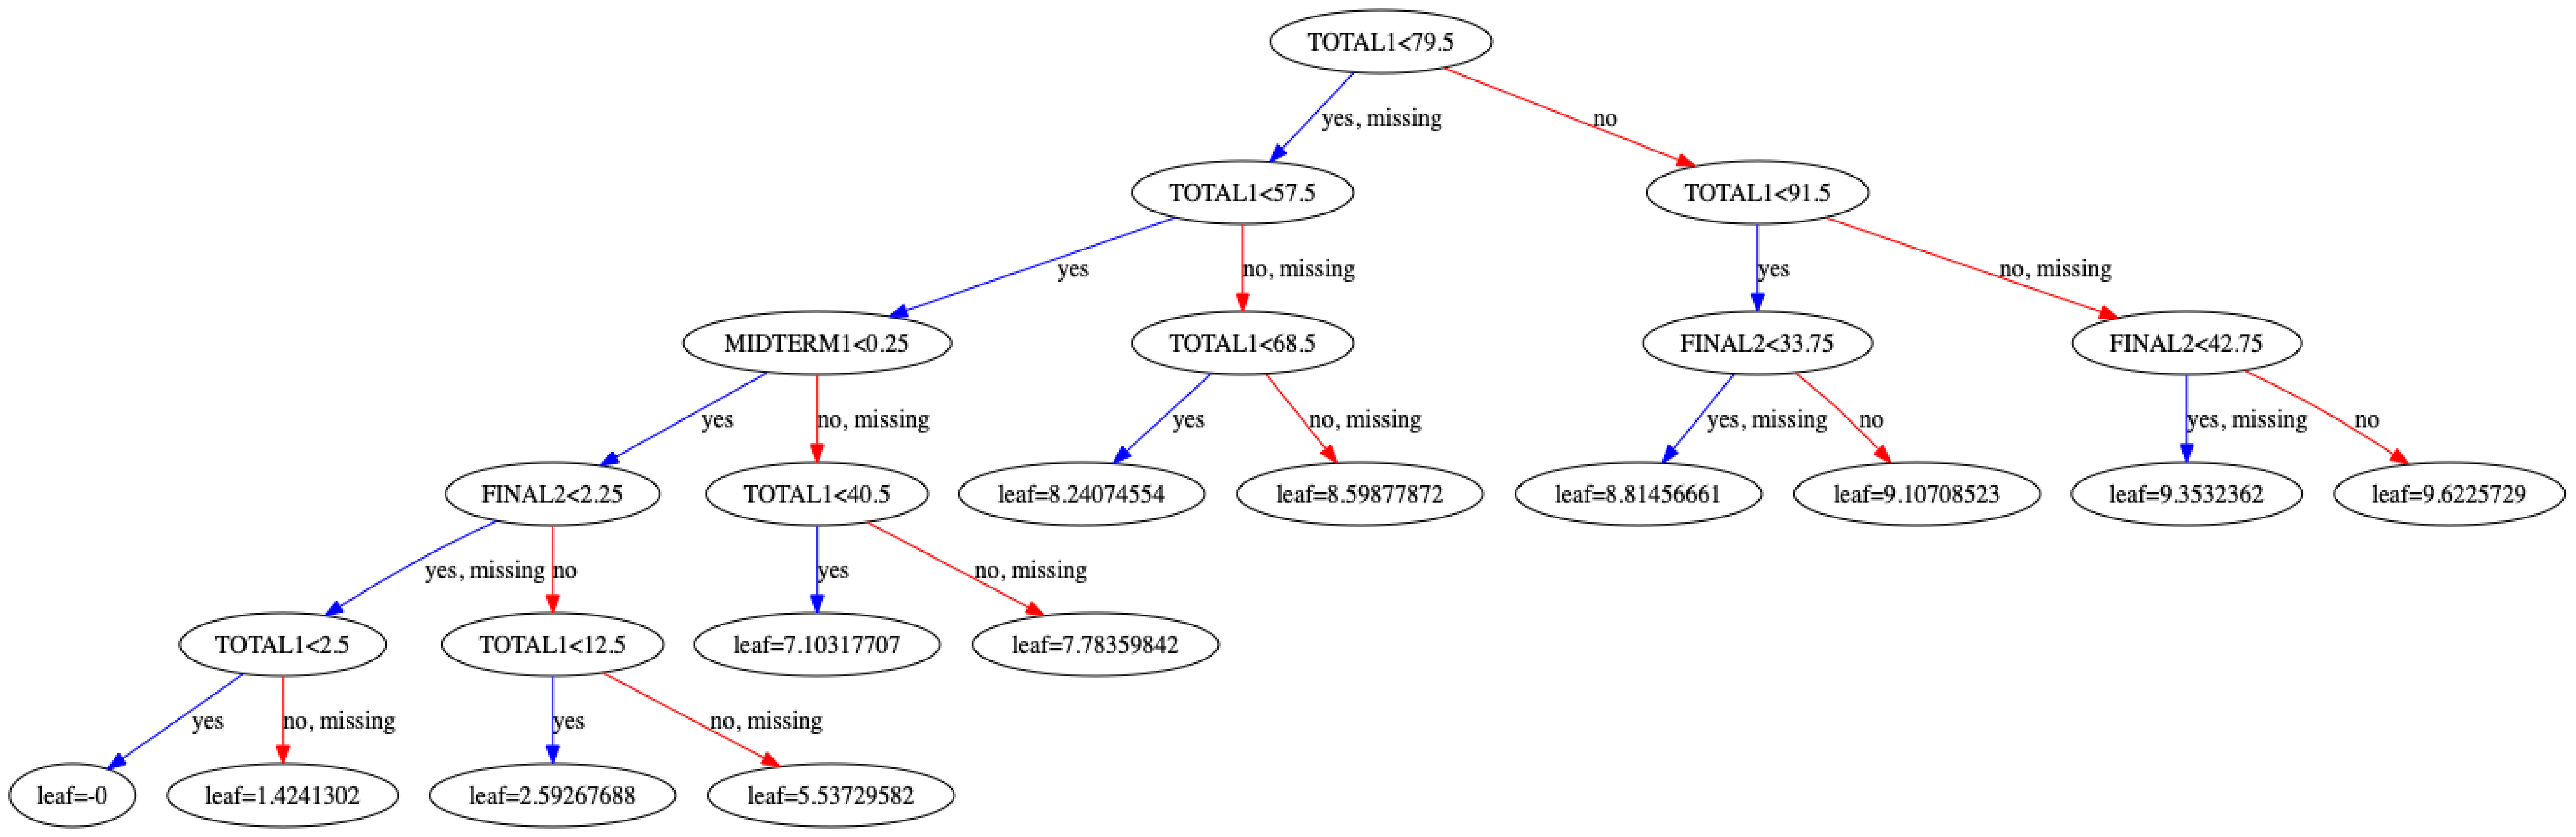

In [435]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [100, 60]


xgb.plot_tree(xg_reg,num_trees=0)
plt.show()

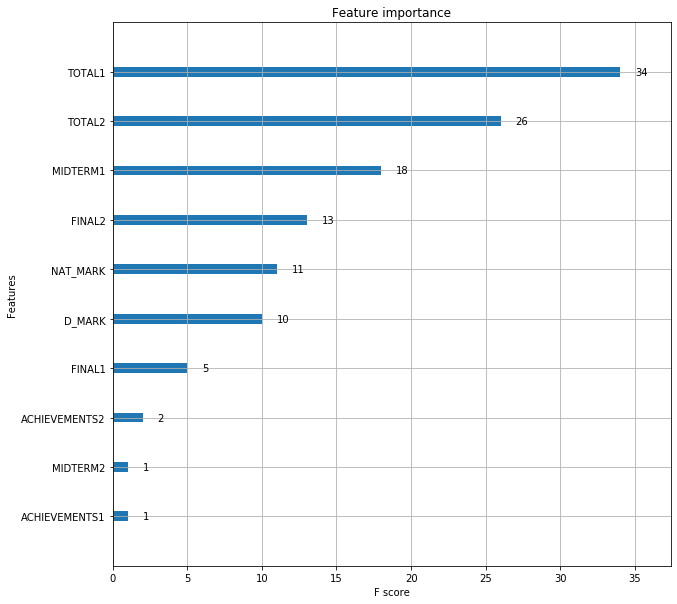

In [436]:
plt.rcParams['figure.figsize'] = [10, 10]
xgb.plot_importance(xg_reg)
plt.show()

In [54]:
62/68

0.9117647058823529

# XGBoost 4 NAT_MARK

In [377]:
df.keys()

Index(['CPR_NO', 'SCH_NM', 'PROV_NM', 'SUBM', 'Teacher_Gender',
       'ACHIEVEMENTS1', 'ACHIEVEMENTS2', 'MIDTERM1', 'MIDTERM2', 'FINAL1',
       'FINAL2', 'TOTAL1', 'TOTAL2', 'D_MARK', 'NAT_MARK', 'GPA'],
      dtype='object')

In [2]:
# split data into X and y
X_N = df.loc[:,['ACHIEVEMENTS1', 'ACHIEVEMENTS2', 'MIDTERM1', 'MIDTERM2', 'FINAL1',
       'FINAL2', 'TOTAL1', 'TOTAL2', 'D_MARK', 'GPA']]
y_N = df.loc[:,"NAT_MARK"]

NameError: name 'df' is not defined

In [3]:
X_N.head()

NameError: name 'X_N' is not defined

In [388]:
# Split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_N, y_N, test_size=0.3)

In [450]:
xreg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [451]:
xreg.fit(X_train,y_train)

/Users/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.3, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=10,
       n_jobs=1, nthread=None, objective='reg:squarederror',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1)

In [453]:
preds_N = xreg.predict(X_test)

In [454]:
rmse = np.sqrt(mean_squared_error(y_test, preds_N))
print("RMSE: %f" % (rmse))

RMSE: 19.150134


In [455]:
d_Mtrix = xgb.DMatrix(data=X_N,label=y_N)

/Users/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [456]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

c_res = xgb.cv(dtrain=d_Mtrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [457]:
c_res.head()

train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0        46.708833        0.050753       46.711166       0.112778
1        42.138597        0.040585       42.143132       0.112620
2        38.033896        0.038084       38.043083       0.106739
3        34.350276        0.035029       34.358001       0.100433
4        31.043496        0.030213       31.055493       0.098627

In [458]:
print((c_res["test-rmse-mean"]).tail(1))

49    6.232798
Name: test-rmse-mean, dtype: float64


In [459]:
preds_N = xreg.predict(X_test)

In [460]:
print(preds_N)

[31.230648 33.11779  33.11779  ... 32.00939  26.212772 31.432396]


In [461]:
xreg = xgb.train(params=params, dtrain=d_Mtrix, num_boost_round=10)

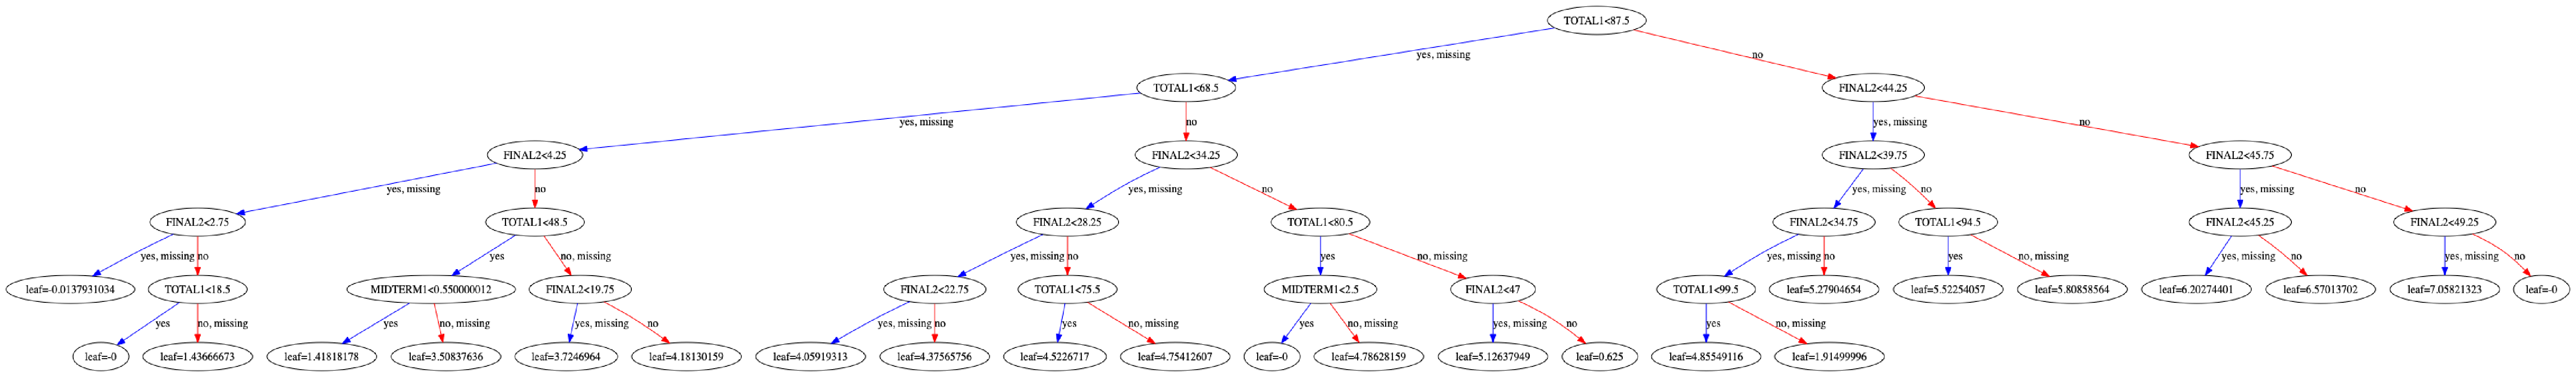

In [463]:
plt.rcParams['figure.figsize'] = [100, 100]


xgb.plot_tree(xreg,num_trees=0)
plt.show()

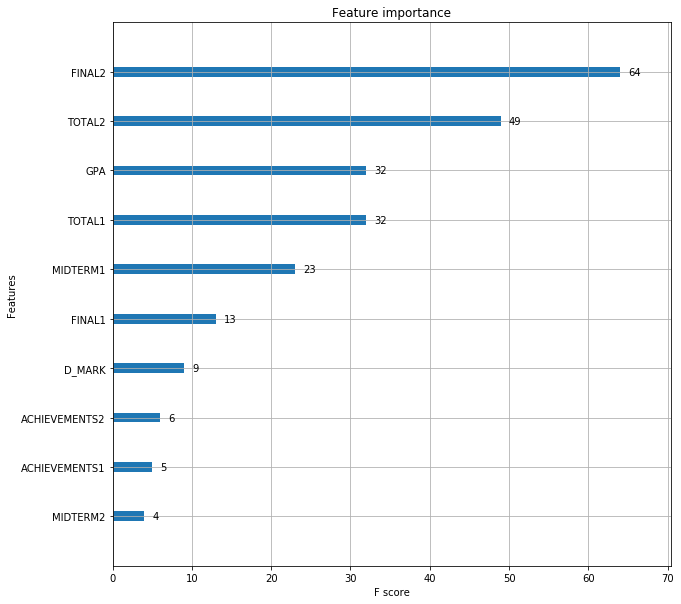

In [464]:
plt.rcParams['figure.figsize'] = [10, 10]
xgb.plot_importance(xreg)
plt.show()

#    SandBox

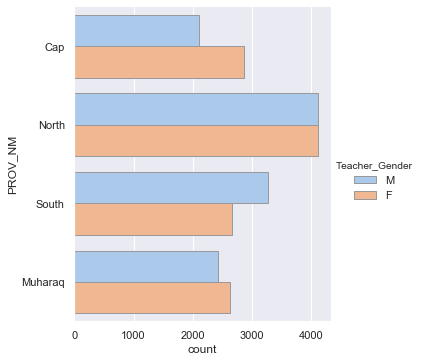

In [320]:
sns.catplot(y="PROV_NM", hue="Teacher_Gender" , kind="count",
            palette="pastel", edgecolor=".6",
            data=df);

# Kurtosis
The exact interpretation of the measure of Kurtosis used to be disputed, but is now settled. Its about existence of outliers. Kurtosis is a measure of whether the data are heavy-tailed (profusion of outliers) or light-tailed (lack of outliers) relative to a normal distribution.

**The main difference between skewness and kurtosis is that the skewness refers to the degree of symmetry, whereas the kurtosis refers to the degree of presence of outliers in the distribution.**

- Mesokurtic
- Leptokurtic
- Platykurtic


In [482]:
arrays = [np.random.randn(3, 4) for _ in range(10)]
np.stack(arrays, axis=0).shape

(10, 3, 4)

In [ ]:
Anova Test(F-Test)
One Way F-test(Anova)


In [12]:
df.head()

CPR_NO                                    NAME  \
CPR_NO                                                       
70913390  70913390            ابراهيم خليل ابراهيم العرادي   
71105956  71105956                  احمد محمد احمد عبدالله   
70712190  70712190   احمد محمد حسن عبدالمهدي الشيخ عبدالله   
70207496  70207496               السيد حسن علي ابراهيم شبر   
70507953  70507953              السيدحسن علي عباس عبدالنبي   

                                            ENAME                 SCH_NM  \
CPR_NO                                                                     
70913390           EBRAHIM KHALIL EBRAHIM ALARADI  المعهد الديني الجعفري   
71105956              AHMED MOHAMED AHMED ABDULLA  المعهد الديني الجعفري   
70712190   AHMED MOHAMED HASAN A.MAHDI SH.ABDULLA  المعهد الديني الجعفري   
70207496          SAYED HASAN ALI EBRAHIM SHUBBAR  المعهد الديني الجعفري   
70507953          SAYED HASAN ALI ABBAS ABDULNABI  المعهد الديني الجعفري   

                 PROV_NM    SUBM Teacher_Gender  ACHIEVEMENTS1  ACHIEVEMENTS2  \
CPR_NO                                                                          
70913390  محافظة العاصمة  العلوم         مدرسين           28.0           30.0   
71105956  محافظة العاصمة  العلوم         مدرسين           27.0           29.0   
70712190  محافظة العاصمة  العلوم         مدرسين           27.0           27.0   
70207496  محافظة العاصمة  العلوم         مدرسين           26.0           24.5   
70507953  محافظة العاصمة  العلوم         مدرسين           25.0           28.0   

          MIDTERM1  MIDTERM2  FINAL1  FINAL2  TOTAL1  TOTAL2  D_MARK  \
CPR_NO                                                                 
70913390      17.0      17.0    45.0    33.0    90.0      80      85   
71105956      14.0      16.0    41.5    37.0    83.0      82      83   
70712190      13.0      15.0    27.5    37.0    68.0      79      74   
70207496      15.0      12.0    44.0    32.5    85.0      69      77   
70507953      14.0      15.0    31.5    37.0    71.0      80      76   

          NAT_MARK   GPA  
CPR_NO                    
70913390      53.7  92.9  
71105956      49.7  89.5  
70712190      52.1  86.2  
70207496      52.9  89.9  
70507953      52.1  86.2

In [416]:
from sklearn.compose import make_column_selector
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import SGDClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import seaborn as sns

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
df.index=df.CPR_NO
df=df.drop("CPR_NO", axis=1)

In [436]:
df1=df.copy()

In [437]:
encoder=OrdinalEncoder()

df1[["SCH_NM","PROV_NM","SUBM","Teacher_Gender"]]=encoder.fit_transform(df1[["SCH_NM","PROV_NM","SUBM","Teacher_Gender"]])

In [438]:
df1.head()

SCH_NM  PROV_NM  SUBM  Teacher_Gender  ACHIEVEMENTS1  ACHIEVEMENTS2  \
CPR_NO                                                                          
70913390     0.0      0.0   1.0             1.0           28.0           30.0   
71105956     0.0      0.0   1.0             1.0           27.0           29.0   
70712190     0.0      0.0   1.0             1.0           27.0           27.0   
70207496     0.0      0.0   1.0             1.0           26.0           24.5   
70507953     0.0      0.0   1.0             1.0           25.0           28.0   

          MIDTERM1  MIDTERM2  FINAL1  FINAL2  TOTAL1  TOTAL2  D_MARK  \
CPR_NO                                                                 
70913390      17.0      17.0    45.0    33.0    90.0      80      85   
71105956      14.0      16.0    41.5    37.0    83.0      82      83   
70712190      13.0      15.0    27.5    37.0    68.0      79      74   
70207496      15.0      12.0    44.0    32.5    85.0      69      77   
70507953      14.0      15.0    31.5    37.0    71.0      80      76   

          NAT_MARK   GPA GPA_class NAT_class  
CPR_NO                                        
70913390      53.7  92.9       >90       <60  
71105956      49.7  89.5     80-90       <60  
70712190      52.1  86.2     80-90       <60  
70207496      52.9  89.9     80-90       <60  
70507953      52.1  86.2     80-90       <60

In [439]:
columns=['SCH_NM', 'PROV_NM', 'SUBM', 'Teacher_Gender', 'ACHIEVEMENTS1','MIDTERM1','TOTAL1', 'FINAL1'  ]

In [440]:
X=df1[columns]
X.head()

SCH_NM  PROV_NM  SUBM  Teacher_Gender  ACHIEVEMENTS1  MIDTERM1  \
CPR_NO                                                                     
70913390     0.0      0.0   1.0             1.0           28.0      17.0   
71105956     0.0      0.0   1.0             1.0           27.0      14.0   
70712190     0.0      0.0   1.0             1.0           27.0      13.0   
70207496     0.0      0.0   1.0             1.0           26.0      15.0   
70507953     0.0      0.0   1.0             1.0           25.0      14.0   

          TOTAL1  FINAL1  
CPR_NO                    
70913390    90.0    45.0  
71105956    83.0    41.5  
70712190    68.0    27.5  
70207496    85.0    44.0  
70507953    71.0    31.5

In [441]:
y=df1["NAT_class"]

In [442]:
X_train, X_test, y_train ,y_test=train_test_split(X, y , test_size=0.7, random_state=42, stratify=y)

In [443]:
X_train.head()

SCH_NM  PROV_NM  SUBM  Teacher_Gender  ACHIEVEMENTS1  MIDTERM1  \
CPR_NO                                                                     
80103928    76.0      0.0   0.0             0.0           29.0      18.0   
80105297    41.0      3.0   0.0             0.0           27.0      14.0   
70902020    63.0      1.0   1.0             0.0           28.5      17.0   
70208840     0.0      0.0   1.0             1.0           26.0      15.0   
70911649    52.0      1.0   1.0             0.0           25.5      18.0   

          TOTAL1  FINAL1  
CPR_NO                    
80103928    96.0    49.0  
80105297    66.0    24.5  
70902020    89.0    43.0  
70208840    74.0    33.0  
70911649    89.0    45.0

In [444]:
X_train.to_csv('train.csv', index=False, header=False, columns=columns)

In [445]:
X_test.to_csv('validation.csv', index=False, header=False, columns=columns)

In [354]:
numerical_features=make_column_selector(dtype_include=np.number)
categorical_features=make_column_selector(dtype_exclude=np.number)

In [355]:
numerical_pipeline=make_pipeline( SimpleImputer(), StandardScaler())
categorical_pipeline=make_pipeline(SimpleImputer(strategy="most_frequent"), 
                                  OneHotEncoder())

In [356]:
preprocessor= make_column_transformer( (numerical_pipeline , numerical_features),
                       (categorical_pipeline,   categorical_features))

In [357]:
model=make_pipeline(preprocessor, SVC(random_state=1) )

In [362]:
# pipe_svc = make_pipeline(StandardScaler(),
#                          SVC(random_state=1))
param_range = [0.0001, 0.001, 0.01, 0.1,
               1.0, 10.0, 100.0, 1000.0]
param_grid = [{'svc__C': param_range,
               'svc__kernel': ['linear']},
              {'svc__C': param_range,
               'svc__gamma': param_range,
               'svc__kernel': ['rbf']}]


In [ ]:
gs = GridSearchCV(estimator=model,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=5,
                  refit=True,
                  n_jobs=-1)


In [ ]:
gs = gs.fit(X_train, y_train)

In [359]:


print(gs.best_score_)
#0.9846153846153847
print(gs.best_params_)
#{'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}

0.8448482140735283
{'svc__C': 1.0, 'svc__gamma': 1.0, 'svc__kernel': 'rbf'}


In [425]:
from sklearn.model_selection import cross_val_score
gs = GridSearchCV(estimator=model,
                   param_grid=param_grid,
                   scoring='accuracy',
                   cv=2)
scores = cross_val_score(gs, X_train, y_train,
                          scoring='accuracy', cv=5)

/Users/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
/Users/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
/Users/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)


In [365]:

print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),
                                       np.std(scores)))

CV accuracy: 0.842 +/- 0.006


In [412]:
y=df.iloc[:,-1]

In [413]:
X=df.iloc[:,:-2]

In [414]:
X_train, X_test, y_train ,y_test=train_test_split(X, y , test_size=0.7, random_state=42, stratify=y)

In [426]:
from sklearn.tree import DecisionTreeClassifier
gs = GridSearchCV(estimator=DecisionTreeClassifier(
                      random_state=0),
                  param_grid=[{'max_depth': [1, 2, 3,
                                             4, 5, 6,
                                             7, None]}],
                  scoring='accuracy',
                  cv=2)
scores = cross_val_score(gs, X_train, y_train,
                         scoring='accuracy', cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),
                                      np.std(scores)))

/Users/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/Users/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
/Users/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
/Users/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
/Users/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning:

CV accuracy: 0.836 +/- 0.009


In [526]:
df_copy.head()

CPR_NO                 SCH_NM PROV_NM     SUBM Teacher_Gender  \
0  70913390  المعهد الديني الجعفري     Cap  Science              M   
1  71105956  المعهد الديني الجعفري     Cap  Science              M   
2  70712190  المعهد الديني الجعفري     Cap  Science              M   
3  70207496  المعهد الديني الجعفري     Cap  Science              M   
4  70507953  المعهد الديني الجعفري     Cap  Science              M   

   ACHIEVEMENTS1  ACHIEVEMENTS2  MIDTERM1  MIDTERM2  FINAL1  FINAL2  TOTAL1  \
0           28.0           30.0      17.0      17.0    45.0    33.0    90.0   
1           27.0           29.0      14.0      16.0    41.5    37.0    83.0   
2           27.0           27.0      13.0      15.0    27.5    37.0    68.0   
3           26.0           24.5      15.0      12.0    44.0    32.5    85.0   
4           25.0           28.0      14.0      15.0    31.5    37.0    71.0   

   TOTAL2  D_MARK  NAT_MARK   GPA GPA_class NAT_class  
0      80      85      53.7  92.9       >90       <60  
1      82      83      49.7  89.5     80-90       <60  
2      79      74      52.1  86.2     80-90       <60  
3      69      77      52.9  89.9     80-90       <60  
4      80      76      52.1  86.2     80-90       <60

In [ ]:
from sklearn.compose import ColumnTransformer

le=ColumnTransformer([('encoder', LabelEncoder(), [0]), remainder='passthrough'])

d_copy=le.fit_transform(df), dtype=nd.str)

In [400]:
import xgboost
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

In [401]:
params = {
        'xgbclassifier__gamma': [0.5, 1],
        'xgbclassifier__max_depth': [3, 4]
        }

In [402]:
numerical_features=make_column_selector(dtype_include=np.number)
categorical_features=make_column_selector(dtype_exclude=np.number)

In [403]:
preprocess = make_column_transformer(
    (numerical_features, StandardScaler()),
    ### Need to be numeric not string to specify columns name 
    (categorical_features, OneHotEncoder(sparse=False))
)

In [404]:
model_xgb = make_pipeline(
    preprocess,
    xgboost.XGBClassifier(
                          n_estimators=600,
                          objective='binary:logistic',
                          silent=True,
                          nthread=1)
)

In [405]:
skf = StratifiedKFold(n_splits=3,
                      shuffle = True,
                      random_state = 1001)

random_search = RandomizedSearchCV(model_xgb,
                                   param_distributions=params,
                                   n_iter=4,
                                   scoring='accuracy',
                                   n_jobs=4,
                                   cv=skf.split(X_train, y_train),
                                   verbose=3,
                                   random_state=1001)

In [ ]:
#grid_xgb = GridSearchCV(model_xgb, params, cv=10, iid=False)
random_search.fit(X_train, y_train)

In [ ]:
params={
    "polynomialfeatures__degree":[2,3,4],
    "sgdclassifier__penalty": ['l1', 'l2']
}


In [ ]:
grid=GridSearchCV(model, param_grid=params,cv=4 )



In [ ]:
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    'naive_bayes_multinomial': {
        'model': MultinomialNB(),
        'params': {}
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            
        }
    }     
}

In [ ]:
model=make_pipeline(preprocessor, SGDClassifier())


In [ ]:
model.fit(X, y )

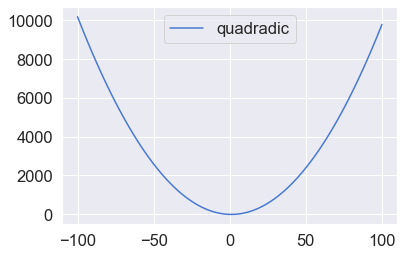

In [66]:
x= np.linspace(-100, 100, 100)
# y1=x**3
# y2=x**5
y3=(x-4)*(x+2)
# plt.plot(x, y1 , label="Cubic")
# plt.plot(x, y2 , label="5th power")
plt.plot(x, y3 , label="quadradic")
plt.legend()

In [59]:
x

array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
        -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
        -8.38383838,  -8.18181818,  -7.97979798,  -7.77777778,
        -7.57575758,  -7.37373737,  -7.17171717,  -6.96969697,
        -6.76767677,  -6.56565657,  -6.36363636,  -6.16161616,
        -5.95959596,  -5.75757576,  -5.55555556,  -5.35353535,
        -5.15151515,  -4.94949495,  -4.74747475,  -4.54545455,
        -4.34343434,  -4.14141414,  -3.93939394,  -3.73737374,
        -3.53535354,  -3.33333333,  -3.13131313,  -2.92929293,
        -2.72727273,  -2.52525253,  -2.32323232,  -2.12121212,
        -1.91919192,  -1.71717172,  -1.51515152,  -1.31313131,
        -1.11111111,  -0.90909091,  -0.70707071,  -0.50505051,
        -0.3030303 ,  -0.1010101 ,   0.1010101 ,   0.3030303 ,
         0.50505051,   0.70707071,   0.90909091,   1.11111111,
         1.31313131,   1.51515152,   1.71717172,   1.91919192,
         2.12121212,   2.32323232,   2.52525253,   2.72